<a href="https://colab.research.google.com/github/yuqqyy/WalkGCN/blob/main/notebooks/WS07_GNNsForProteins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='#569098' size=20>Graph Neural Network (GNN) Basics for Proteins</font>**

##[Return to HomePage](https://github.com/Graylab/DL4Proteins-notebooks)

**OBJECTIVES: By the end of this workshop you should be able to:**

* <font color='#e59454'>Identify the types of data that are ideal for GNNs and why protein structures are suitable for this type of nn.</font>
* <font color='#e59454'>Define nodes and edges in the context of graph data. How can proteins be represented as graphs?</font>
* <font color='#e59454'>Give examples of node-level, edge-level, and graph-level tasks for protein prediction.</font>
* <font color='#e59454'>Explain the difference between directed and undirected edges.</font>
* <font color='#e59454'>Classify which operations in the GNN require invariance or equivariance and explain why.</font>
* <font color='#e59454'>Name and explain the steps in message passing.</font>
* <font color='#e59454'>Explain the different layers within a GNN and how it differs from other models.</font>
* <font color='#e59454'>Apply a GNN to answer a node-level, edge-level, or graph-level question about proteins.</font>

**_To save your work, please save a copy of this notebook into your personal google drive._**

**<font color='#569098' size = 5 >Table of Contents:**


#### **[Section 1: Graph theory](https://colab.research.google.com/drive/1VdnneRmaBTCfvZgnqZrfVR38xGKYTK2O#scrollTo=2P7qNT_Onfcu)**
* [Graph Theory: How is a graph defined?](https://colab.research.google.com/drive/1VdnneRmaBTCfvZgnqZrfVR38xGKYTK2O#scrollTo=JHQQO5ETsBLa)
* [Graph Theory: Graph Prediction Tasks](https://colab.research.google.com/drive/1VdnneRmaBTCfvZgnqZrfVR38xGKYTK2O#scrollTo=gabWg_OFICy9)
* [Graph Theory: Representation as an Adjacency Matrix](https://colab.research.google.com/drive/1VdnneRmaBTCfvZgnqZrfVR38xGKYTK2O#scrollTo=hUwUvdnMSHKs&line=1&uniqifier=1)
* [Graph Theory: Directed and Undirected Graphs](https://colab.research.google.com/drive/1VdnneRmaBTCfvZgnqZrfVR38xGKYTK2O#scrollTo=oMwGOPfEFJ9u)
* [Graph Theory: Further define nodes and edges with feature embeddings](https://colab.research.google.com/drive/1VdnneRmaBTCfvZgnqZrfVR38xGKYTK2O#scrollTo=rp5_QbFHJksB)

#### **[Section 2: GNN theory](https://colab.research.google.com/drive/1VdnneRmaBTCfvZgnqZrfVR38xGKYTK2O#scrollTo=uJIY8IuDnnim)**
* [GNN Theory: Message Passing](https://colab.research.google.com/drive/1VdnneRmaBTCfvZgnqZrfVR38xGKYTK2O#scrollTo=6JoRUHFSNrax)
* [GNN Theory: Permutation Invariance vs. Permutation Equivariance](https://colab.research.google.com/drive/1VdnneRmaBTCfvZgnqZrfVR38xGKYTK2O#scrollTo=GfWjJdfl_OGj)

#### **[Section 3: Implement a GCN](https://colab.research.google.com/drive/1VdnneRmaBTCfvZgnqZrfVR38xGKYTK2O#scrollTo=DmBrwgtVnnuT)**
* [Implement a GCN: Load and Prep the Input Data](https://https://colab.research.google.com/drive/1VdnneRmaBTCfvZgnqZrfVR38xGKYTK2O#scrollTo=Mg5kfaZ0SyBX)
* [Implement a GCN: Define message passing function](https://colab.research.google.com/drive/1VdnneRmaBTCfvZgnqZrfVR38xGKYTK2O#scrollTo=Te_1xM_BMiIy)
* [Implement a GCN: Define a GraphConv layer](https://colab.research.google.com/drive/1VdnneRmaBTCfvZgnqZrfVR38xGKYTK2O#scrollTo=ozAm0PD2QKhT)
* [Implement a GCN: Define our model](https://colab.research.google.com/drive/1VdnneRmaBTCfvZgnqZrfVR38xGKYTK2O#scrollTo=1E441Ia5QpT8)
* [Implement a GCN: Train and eval](https://colab.research.google.com/drive/1VdnneRmaBTCfvZgnqZrfVR38xGKYTK2O#scrollTo=YSCcSfneQrvJ)

#### **[Section 4: Objectives Check-In](https://colab.research.google.com/drive/1VdnneRmaBTCfvZgnqZrfVR38xGKYTK2O#scrollTo=8jkPuq-JC3A4&line=1&uniqifier=1)**

### <b> <font color='#569098'> Import Libraries

In [2]:
# Install modules
!pip install graphein
!pip install pytorch3d
!pip install torch-geometric
!pip install torch
!pip install biovec
!pip install biographs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.9/191.9 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.0/316.0 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.3 MB/s eta 0

In [3]:
# Get libraries
import os
import re
import graphein
import graphein.protein as gp
from graphein.protein.config import ProteinGraphConfig
from graphein.protein.graphs import construct_graph
from graphein.protein.visualisation import plotly_protein_structure_graph

import pandas as pd
# from Bio import PDB
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import networkx as nx
from networkx import to_networkx_graph
import torch
import torch.nn as nn
from torch_geometric.utils import from_networkx
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool, global_max_pool
import biographs as bg
import Bio.PDB
from biopandas.pdb import PandasPdb
# from plotly.subplots import make_subplots

In [4]:
# Clone the repository with sparse checkout and depth limit
!git clone -n --depth=1 --filter=tree:0 \
  https://github.com/courtel/GNN_dl_workshop.git repo_partial

# 进入克隆的仓库目录（run的时候需要删除行后的注释，否则会报错）
%cd repo_partial
!git sparse-checkout set --no-cone images # Sparse checkout to fetch only specified folder 执行稀疏检出，只拉取images文件夹
!git checkout # 提交并拉取文件夹内容

%cd ..  # 返回上级目录
!mv repo_partial/images ./images  # 移动 images 文件夹到当前目录
!rm -rf repo_partial  # 删除临时仓库副本


Cloning into 'repo_partial'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 1 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (1/1), done.
/content/repo_partial
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 15.81 KiB | 522.00 KiB/s, done.
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 3), reused 1 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 727.40 KiB | 2.22 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Your branch is up to date with 'origin/main'.
[Errno 2] No such file or directory: '.. # 返回上级目录'
/content/repo_partial
mv: cannot stat 'repo_partial/images': No such file or directory


# **<font color='#569098'>Section 1: Graph Theory**

Graphs are very prevalent in the world around us. They are a powerful way to represent data because they’re able to capture complex relationships between objects. Some examples of this are social networks, transportation networks,  telecommunications networks, knowledge graphs (like search engines), even words in sentences can be represented by graphs. Graphs allow for the representation of both local (node-level) and global (graph-level) information, capturing the full complexity of what is being modeled.

Most neural networks work on Euclidean data. For example, images are linear graphs that are ideally handled by a CNN whose functions depend on the grid-like, ordered structure of the nodes and edges. GNNs can be used for nonlinear data that is more complex and less predictable, like a social network.

In [ ]:
# @title Hover over the nodes, edges, and graph border to see embeddings for each.


from IPython.display import HTML, display

# Load D3.js
display(HTML("""
<script src="https://d3js.org/d3.v6.min.js"></script>
"""))

html_code = """
<div id="container">
  <div>
    </div>
    <div style="display: flex; align-items: flex-start;">
      <div>
        <h2>Grid-like Image Graph</h2>
        <div id="grid-image"></div>
      </div>
      <div style="margin-left: 20px;">
        <h2>Social Network Graph</h2>
        <div id="social-network-graph"></div>
      </div>
    </div>
  </div>
</div>

<style>
  h2 {
    text-align: center;
  }

  .node {
    stroke: #bbb;
    stroke-width: 1px;
  }

  .node.hovered {
    stroke-width: 3px;
    stroke: #1f77b4;
  }

  .edge {
    stroke: #bbb;
    stroke-width: 1px;
  }

  .edge.hovered {
    stroke-width: 3px;
    stroke: #ff7f0e;
  }

  .overlay {
    fill: rgba(0, 0, 0, 0);
    cursor: pointer;
  }

  .graph {
    stroke: #bbb;
    stroke-width: 4px;
    fill: none;
  }

  .graph.hovered {
    stroke: #2ca02c;
    stroke-width: 10px;
  }

  .tooltip {
    position: absolute;
    background-color: #fff;
    border: 1px solid #bbb;
    padding: 5px;
    border-radius: 3px;
    pointer-events: none;
    font-size: 12px;
  }
</style>

<div class="tooltip" id="tooltip" style="display: none;"></div>

<script>
  function makeGridImage() {
    const gridSize = 5;  // Change this to adjust the grid size (e.g., 5x5 grid)
    const nodes = [];
    const links = [];

    for (let i = 0; i < gridSize; i++) {
      for (let j = 0; j < gridSize; j++) {
        const id = i * gridSize + j;
        nodes.push({
          id: id,
          x: j / (gridSize - 1),
          y: i / (gridSize - 1),
          element: `P(${i},${j})`,
          features: `Pixel (${i},${j})`
        });

        // Connect the node to its right neighbor
        if (j < gridSize - 1) {
          links.push({ source: id, target: id + 1 });
        }

        // Connect the node to its bottom neighbor
        if (i < gridSize - 1) {
          links.push({ source: id, target: id + gridSize });
        }
      }
    }

    const graph = { features: 'Grid Image Representation: ...' };

    return [nodes, links, graph];
  }

  function makeSocialNetworkGraph() {
    const numNodes = 50;
    const nodes = Array.from({ length: numNodes }, (v, i) => ({
      id: i,
      x: Math.random(),
      y: Math.random(),
      name: `User ${i}`,
      features: `Embeddings: ${Math.random().toFixed(4)}, ${Math.random().toFixed(4)}`
    }));

    const links = [];
    for (let i = 0; i < numNodes; i++) {
      for (let j = i + 1; j < numNodes; j++) {
        if (Math.random() < 0.1) {
          links.push({
            source: i,
            target: j,
            connection: 'friend',
            features: `Connection strength: ${Math.random().toFixed(4)}`
          });
        }
      }
    }

    const graph = { features: 'Social Network Graph Embeddings: ...' };

    return [nodes, links, graph];
  }

  class GraphDescription {
    constructor(elementId, makeGraphFunction) {
      this.parent = d3.select(`#${elementId}`);
      this.svg = this.parent.append('svg')
                            .attr('width', 400)
                            .attr('height', 400);
      const [nodes, links, graph] = makeGraphFunction();
      this.showGraph(nodes, links, graph);
    }

    showGraph(nodes, links, graph) {
      const pos = (x) => x * 350 + 25;
      const tooltip = d3.select('#tooltip');
      const self = this;
      const graphHolder = this.svg.append('g')
                                  .attr('transform', 'translate(10, 10)');

      const graphBorder = graphHolder.append('rect')
        .attr('width', 350)
        .attr('height', 350)
        .attr('x', 0)
        .attr('y', 0)
        .attr('rx', 20)
        .attr('class', 'graph')
        .on('mouseover', function(event) { self.showGraphTooltip(event, graph, tooltip); })
        .on('mouseout', function() { self.hideTooltip(tooltip); });

      const edgeElements = graphHolder.selectAll('line.edge')
        .data(links)
        .enter()
        .append('line')
        .classed('edge', true)
        .attr("x1", (d) => pos(nodes[d.source].x))
        .attr("x2", (d) => pos(nodes[d.target].x))
        .attr("y1", (d) => pos(nodes[d.source].y))
        .attr("y2", (d) => pos(nodes[d.target].y))
        .on('mouseover', function(event, d) { self.showEdgeTooltip(event, d, nodes, tooltip); })
        .on('mouseout', function() { self.hideTooltip(tooltip); });

      graphHolder.selectAll('line.overlay')
        .data(links)
        .enter()
        .append('line')
        .classed('overlay', true)
        .attr("x1", (d) => pos(nodes[d.source].x))
        .attr("x2", (d) => pos(nodes[d.target].x))
        .attr("y1", (d) => pos(nodes[d.source].y))
        .attr("y2", (d) => pos(nodes[d.target].y))
        .on('mouseover', function(event, d) { self.showEdgeTooltip(event, d, nodes, tooltip); })
        .on('mouseout', function() { self.hideTooltip(tooltip); });

      const nodeElements = graphHolder.selectAll('circle.node')
        .data(nodes)
        .enter()
        .append('circle')
        .classed('node', true)
        .attr('r', 7)
        .attr('cx', (d) => pos(d.x))
        .attr('cy', (d) => pos(d.y))
        .on('mouseover', function(event, d) { self.showNodeTooltip(event, d, tooltip); })
        .on('mouseout', function() { self.hideTooltip(tooltip); });

      graphHolder.selectAll('circle.overlay')
        .data(nodes)
        .enter()
        .append('circle')
        .classed('overlay', true)
        .attr('r', 12)
        .attr('cx', (d) => pos(d.x))
        .attr('cy', (d) => pos(d.y))
        .on('mouseover', function(event, d) {
          d3.select(nodeElements.nodes()[d.id]).classed('hovered', true);
          d3.select(this).classed('hovered', true);
          self.showNodeTooltip(event, d, tooltip);
        })
        .on('mouseout', function(event, d) {
          d3.select(nodeElements.nodes()[d.id]).classed('hovered', false);
          d3.select(this).classed('hovered', false);
          self.hideTooltip(tooltip);
        });

      graphBorder.on('mouseover', function(event) {
        d3.select(this).classed('hovered', true);
        edgeElements.classed('hovered', true);
        nodeElements.classed('hovered', true);
        self.showGraphTooltip(event, graph, tooltip);
      })
      .on('mouseout', function() {
        d3.select(this).classed('hovered', false);
        edgeElements.classed('hovered', false);
        nodeElements.classed('hovered', false);
        self.hideTooltip(tooltip);
      });
    }

    showNodeTooltip(event, d, tooltip) {
      tooltip.style('display', 'block')
             .style('left', (event.pageX + 5) + 'px')
             .style('top', (event.pageY + 5) + 'px')
             .html(`<strong>ID:</strong> ${d.id}<br><strong>Features:</strong> ${d.features}`);
      d3.select(event.target).classed('hovered', true);
    }

    showEdgeTooltip(event, d, nodes, tooltip) {
      const sourceNode = nodes[d.source];
      const targetNode = nodes[d.target];
      tooltip.style('display', 'block')
            .style('left', (event.pageX + 5) + 'px')
            .style('top', (event.pageY + 5) + 'px')
            .html(`<strong>Source:</strong> ${sourceNode.id} (${sourceNode.features})<br><strong>Target:</strong> ${targetNode.id} (${targetNode.features})`);
      d3.select(event.target).classed('hovered', true);
    }

    showGraphTooltip(event, graph, tooltip) {
      tooltip.style('display', 'block')
            .style('left', (event.pageX + 5) + 'px')
            .style('top', (event.pageY + 5) + 'px')
            .html(`<strong>Graph:</strong> ${graph.features}`);
      d3.select(event.target).classed('hovered', true);
    }

    hideTooltip(tooltip) {
      tooltip.style('display', 'none');
      d3.selectAll('.hovered').classed('hovered', false);
    }
  }

  const gridImageGraph = new GraphDescription('grid-image', makeGridImage);
  const socialNetworkGraph = new GraphDescription('social-network-graph', makeSocialNetworkGraph);
</script>
"""

display(HTML(html_code))


Molecules can easily be represented by graphs, with atoms as nodes, and bonds as edges. Below is an example of the citronellal molecule, which is used to give citronella oil its distinctive lemon scent.

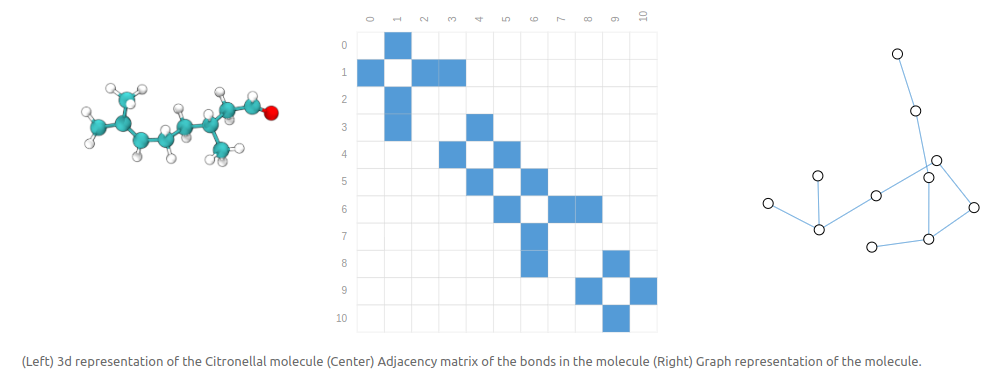


*Image source: [A Gentle Introduction to Graph Neural Networks](https://distill.pub/2021/gnn-intro/)*

## **<font color='#569098'>Graph Theory: How is a graph defined?**

In [ ]:
# @title A graph **G** is a data structure that can be defined as **G = (V, E)**, where **V** represents the vertices (or nodes) and **E** represents the edges. Edges in a graph can be directed or undirected based on whether directional dependencies exist between nodes.
from IPython.display import HTML, display

# Load D3.js
display(HTML("""
<script src="https://d3js.org/d3.v6.min.js"></script>
"""))

html_code = """
<div id="container" style="display: flex; align-items: flex-start;">
  <div id="graph-description"></div>
  <div id="text-description"></div>
</div>

<style>
  .line-holder {
    display: flex;
    flex-direction: column;
    margin: 10px 0;
    width: 100%;
  }
  .line-holder div {
    margin: 5px 0;
  }
  .letter {
    font-weight: bold;
    margin-right: 10px;
    font-size: 2em;
  }
  .desc {
    font-size: 2em;
    margin-right: 10px;
    margin-left: 5px;
    white-space: pre-wrap;
  }
  .line-holder .top-line {
    display: flex;
    align-items: center;
  }
  .eg {
    font-size: 1.5em;
    margin-left: 20px;
  }
  .selected {
    background-color: #ddd;
  }
  svg {
    margin: 20px;
    border: 1px solid black;
  }
</style>

<script>
function makeGraph() {
  const nodes = [
    { id: 0, x: 0.8, y: 0.5 },
    { id: 1, x: 0.6, y: 0.9 },
    { id: 2, x: 0.2, y: 0.8 },
    { id: 3, x: 0.2, y: 0.4 },
    { id: 4, x: 0.6, y: 0.1 }
  ];
  const links = [
    { a: nodes[0], b: nodes[0] },
    { a: nodes[0], b: nodes[4] },
    { a: nodes[4], b: nodes[0] },
    { a: nodes[4], b: nodes[1] },
    { a: nodes[1], b: nodes[2] },
    { a: nodes[2], b: nodes[1] },
    { a: nodes[2], b: nodes[2] },
    { a: nodes[2], b: nodes[4] },
    { a: nodes[4], b: nodes[2] },
    { a: nodes[3], b: nodes[3] },
    { a: nodes[3], b: nodes[0] },
    { a: nodes[0], b: nodes[3] },
    { a: nodes[4], b: nodes[4] },
    { a: nodes[4], b: nodes[1] },
    { a: nodes[1], b: nodes[4] },
    { a: nodes[4], b: nodes[3] },
    { a: nodes[3], b: nodes[4] }
  ];
  return [nodes, links];
}

class GraphDescription {
  constructor() {
    this.parent = d3.select('#graph-description');
    this.svg = this.parent.append('svg')
                          .attr('width', 400)
                          .attr('height', 400);
    const [nodes, links] = makeGraph();
    this.showGraph(nodes, links);
    this.showText();
  }

  showGraph(nodes, links) {
    const pos = (x) => x * 300 + 50;

    const graphHolder = this.svg.append('g')
                                .attr('transform', 'translate(25, 25)');

    // Make global box
    graphHolder.append('rect')
      .attr('width', 350)
      .attr('height', 350)
      .attr('x', 0)
      .attr('y', 0)
      .attr('rx', 20)
      .attr('fill', '#fff')
      .attr('stroke', '#ddd')
      .style("stroke-width", 2)
      .attr('stroke-dasharray', "4, 4")
      .on('mouseover', () => this.highlightGlobal())
      .on('mouseout', () => this.unhighlightAll());

    // Make edges
    graphHolder.selectAll('line.vis')
      .data(links)
      .enter()
      .append('line')
      .classed('vis', true)
      .style("stroke", "#bbb")
      .style("stroke-width", 1)
      .attr("x1", (d) => pos(d.a.x))
      .attr("x2", (d) => pos(d.b.x))
      .attr("y1", (d) => pos(d.a.y))
      .attr("y2", (d) => pos(d.b.y));

    graphHolder.selectAll('line.target')
      .data(links)
      .enter()
      .append('line')
      .classed('target', true)
      .style("stroke", "rgba(0, 0, 0, 0)")
      .style("stroke-width", 40)
      .attr("x1", (d) => pos(d.a.x))
      .attr("x2", (d) => pos(d.b.x))
      .attr("y1", (d) => pos(d.a.y))
      .attr("y2", (d) => pos(d.b.y))
      .on('mouseover', () => this.highlightEdges())
      .on('mouseout', () => this.unhighlightAll());

    // Make nodes
    graphHolder.selectAll('circle')
      .data(nodes)
      .enter()
      .append('circle')
      .attr('r', 10)
      .attr('cx', (d) => pos(d.x))
      .attr('cy', (d) => pos(d.y))
      .style('fill', '#fff')
      .style("stroke-width", '1px')
      .style("stroke", '#bbb')
      .on('mouseover', () => this.highlightNodes())
      .on('mouseout', () => this.unhighlightAll());
  }

  showText() {
    const textHolder = d3.select('#text-description');

    const makeLine = (letter, desc, eg, mouseover) => {
      const div = textHolder.append('div')
        .classed('line-holder', true)
        .attr('id', letter);
      const topLine = div.append('div').classed('top-line', true);
      topLine.append('div').text(letter).classed('letter', true);
      topLine.append('div').text(desc).classed('desc', true);
      div.append('div').text(eg).classed('eg', true);

      div.on('mouseover', mouseover);
      div.on('mouseout', () => this.unhighlightAll());
    }

    makeLine('V', ' Vertex (or node) attributes', 'e.g., node identity, number of neighbors', () => this.highlightNodes());
    makeLine('E', ' Edge attributes and directions', 'e.g., edge identity, edge weight', () => this.highlightEdges());
    makeLine('G', ' Graph attributes', 'e.g., number of nodes, longest path', () => this.highlightGlobal());
  }

  highlightEdges() {
    d3.select('#E').classed('selected', true);
    this.parent.selectAll('line.vis')
      .style("stroke", "#000")
      .style("stroke-width", 10);
  }

  highlightNodes() {
    d3.select('#V').classed('selected', true);
    this.parent.selectAll('circle')
      .style("stroke-width", 6)
      .style("stroke", '#000')
      .attr("r", 11);
  }

  highlightGlobal() {
    d3.select('#G').classed('selected', true);
    this.parent.selectAll('rect')
      .style("stroke", '#000')
      .style("stroke-width", 40);
  }

  unhighlightAll() {
    d3.selectAll('.line-holder').classed('selected', false);
    this.parent.selectAll('line.vis')
      .style("stroke", "#bbb")
      .style("stroke-width", '1px');

    this.parent.selectAll('circle')
      .style("stroke-width", '1px')
      .style("stroke", '#aaa')
      .attr("r", 10);

    this.parent.selectAll('rect')
      .style("stroke-width", 2)
      .style("stroke", '#ddd');
  }
}

const graph = new GraphDescription();
</script>
"""

display(HTML(html_code))

# adapted from https://distill.pub/2021/gnn-intro/


*Adapted from: [A Gentle Introduction to Graph Neural Networks](https://distill.pub/2021/gnn-intro/)*

## **<font color='#569098'>Graph Theory: Graph Prediction Tasks**


What kinds of problems can we solve on graphs?

1. <font color='#e59454'><u>**Node‑level tasks**</u></font> involve classifying the nodes in a graph.

2. <font color='#e59454'><u>**Edge-level tasks**</u></font> (or link prediction) involve the relationships between pairs of nodes in a graph.

3. <font color='#e59454'><u>**Graph‑level tasks**</u></font> involve properties that encompass the entire graph.

In [ ]:
# @markdown **<font color='#e59454'>Question Time! Run to Show Question**

from IPython.display import display, HTML
import json  # Required for converting Python dictionaries to JSON strings

# Words and definitions to match
words = ["Node-level task", "Edge-level task", "Graph-level task"]
definitions = [
    "Predict different types of residue interactions (e.g., hydrogen bond, ionic bond, hydrophobic interaction).",
    "Predict the overall stability of the protein.",
    "Predict the B-factor for each residue.",
]

correct_definitions = {
    "Node-level task": "Predict the B-factor for each residue.",
    "Edge-level task": "Predict different types of residue interactions (e.g., hydrogen bond, ionic bond, hydrophobic interaction).",
    "Graph-level task": "Predict the overall stability of the protein.",
}

explanation = """
<p></p>
<ol>
    <li><strong>Node-level task:</strong> Predict the B-factor for each residue.</li>
    <li><strong>Edge-level task:</strong> Predict different types of residue interactions (e.g., hydrogen bond, ionic bond, hydrophobic interaction).</li>
    <li><strong>Graph-level task:</strong> Predict the overall stability of the protein.</li>
</ol>
"""

# Create the matching quiz with dropdowns
def create_matching_quiz(words, definitions, explanation):
    html_code = "<h3>Match the problem to solve with the correct task level:</h3>"

    for i, word in enumerate(words):
        html_code += f"<p><strong>{word}:</strong> " \
                     f"<select id='dropdown_{i}'>" \
                     f"<option value='' disabled selected>Select task</option>"
        for definition in definitions:
            html_code += f"<option value='{definition}'>{definition}</option>"
        html_code += "</select></p>"

    # Add submit button, feedback, and explanation
    html_code += f"""
      <button onclick="checkAnswers()">Submit</button>
      <button onclick="showExplanation()">Show Explanation</button>
      <p id="feedback" style="font-weight: bold;"></p>
      <div id="explanation" style="display:none; margin-top: 20px; padding: 10px; border: 1px solid #ccc; background-color: #f9f9f9;">
        <h4>Explanation:</h4>
        {explanation}
      </div>
    <script>
    // JavaScript function to check answers
    function checkAnswers() {{
        // Pass the Python data into JavaScript variables
        var correct_answers = {json.dumps(correct_definitions)};
        var feedback = document.getElementById('feedback');
        var correct = true;

        // Loop through each dropdown and check if the selected answer is correct
        Object.keys(correct_answers).forEach(function(word, index) {{
            var dropdown = document.getElementById('dropdown_' + index);
            var selected_answer = dropdown.value;

            if (selected_answer === correct_answers[word]) {{
                dropdown.style.color = "green";
            }} else {{
                dropdown.style.color = "red";
                correct = false;
            }}
        }});

        // Update feedback based on correctness
        if (correct) {{
            feedback.textContent = "Correct!";
            feedback.style.color = "green";
        }} else {{
            feedback.textContent = "Incorrect. Try again.";
            feedback.style.color = "red";
        }}
    }}

    // JavaScript function to show explanation
    function showExplanation() {{
        var explanationDiv = document.getElementById('explanation');
        explanationDiv.style.display = "block";
    }}
    </script>
    """

    display(HTML(html_code))

# Call the function to create the matching quiz
create_matching_quiz(words, definitions, explanation)


B factor（也称为温度因子或Debye-Waller 因子）是用于描述原子在蛋白质或其他分子晶体结构中热运动或位置不确定性的度量

## **<font color='#569098'>Graph Theory: Representation as an Adjacency Matrix**

One of the most common ways to computationally represent a graph for nn is by using an **adjacency matrix**. This is a binary matrix $(A)$ of size n x n where each element A[i][j] is 1 if there is an edge between nodes i and j, and 0 otherwise. In this tutorial, we will be using adjacency matrices.

<table>
<tr>
<td><img src="https://storage.googleapis.com/dm-educational/assets/graph-nets/toy_graph.png" width="400px"></td>
<td>

$$\begin{array}{l|llll}
    & n_0 & n_1 & n_2 & n_3 \\ \hline
n_0 & 0    & 1    & 0    & 1    \\
n_1 & 0    & 0    & 1    & 0    \\
n_2 & 1    & 0    & 0    & 0    \\
n_3 & 1    & 0    & 0    & 0
\end{array}$$

</td>
</tr>
</table>


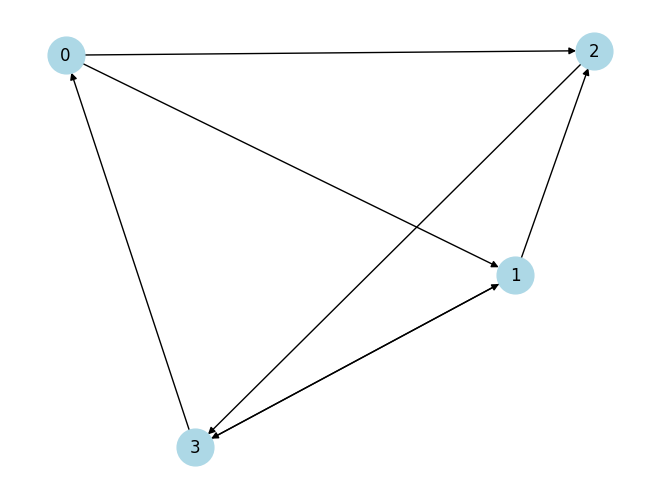

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from([
    (0, 1),
    (0, 2),
    (1, 2),
    (1, 3),
    (2, 3),
    (3, 0),
    (3, 1)
])

# Draw the graph
pos = nx.spring_layout(G) # 计算节点的位置，使用力导向布局算法（Spring Layout），该算法会尽量减少边的交叉
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, arrows=True)
plt.show()



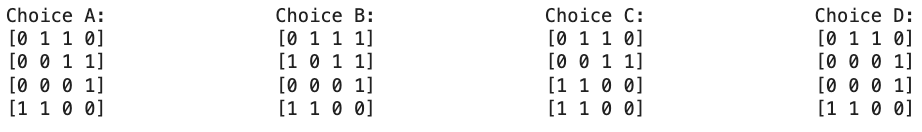

In [6]:
#@markdown **<font color='#e59454'>Question Time! Run to Show Question**

import random
from IPython.display import display, HTML

def create_quiz(question, correct_answer, decoy_answers, explanation):
    # Combine the correct answer with the decoy answers
    answers = [correct_answer] + decoy_answers

    # Shuffle the answers
    # random.shuffle(answers)

    # Generate the HTML code
    html_code = f"""
    <div style="font-family: Arial, sans-serif; margin: 30px; max-width: 1000px;">
      <h3 style="word-wrap: break-word;">{question}</h3>
    """

    # Add each answer as a radio button
    for i, answer in enumerate(answers):
        html_code += f"""
        <div style="word-wrap: break-word; margin-bottom: 10px;">
          <input type="radio" id="option{i}" name="quiz" value="{answer}">
          <label for="option{i}" id="label{i}">{answer}</label>
        </div>
        """

    # Add the submit button, explanation button, feedback section, and explanation section
    html_code += f"""
      <button onclick="checkAnswer()">Submit</button>
      <button onclick="showExplanation()">Show Explanation</button>
      <p id="feedback" style="font-weight: bold;"></p>
      <div id="explanation" style="display:none; margin-top: 20px; padding: 10px; border: 1px solid #ccc; background-color: #f9f9f9;">
        <h4>Explanation:</h4>
        <p>{explanation}</p>
      </div>
    </div>
    <script>
    function checkAnswer() {{
        var radios = document.getElementsByName('quiz');
        var correctAnswer = "{correct_answer}";
        var feedback = document.getElementById('feedback');
        var selectedOption = null;
        var selectedLabel = null;

        // Get the selected option
        for (var i = 0, length = radios.length; i < length; i++) {{
            if (radios[i].checked) {{
                selectedOption = radios[i].value;
                selectedLabel = document.getElementById('label' + i);
                break;
            }}
        }}

        // Provide feedback
        if (selectedOption) {{
            if (selectedOption === correctAnswer) {{
                feedback.textContent = "Correct!";
                feedback.style.color = "green";
                selectedLabel.style.color = "green";
            }} else {{
                feedback.textContent = "Incorrect.";
                feedback.style.color = "red";
                selectedLabel.style.color = "red";
            }}
        }} else {{
            feedback.textContent = "Please select an answer.";
            feedback.style.color = "orange";
        }}
    }}

    function showExplanation() {{
        var explanationDiv = document.getElementById('explanation');
        explanationDiv.style.display = "block";
    }}
    </script>
    """

    display(HTML(html_code))

# Import necessary libraries
from IPython.display import display, HTML

# Base64 encoded image string (your full string goes here)
image_base64 = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA5oAAACECAYAAADxwVT9AAAMP2lDQ1BJQ0MgUHJvZmlsZQAASImVVwdYU8kWnluSkJDQQpcSehNEpASQEkILIL0INkISIJQYA0HFji4quHYRARu6KqLYAbEjioVFsffFgoKyLhbsypsU0HVf+d75vrn3v/+c+c+Zc+eWAUD9JFcszkE1AMgV5UtiQwIYY5NTGKRuQAAGAAFUYM3l5YlZ0dERANrg+e/27gb0hHbVUab1z/7/app8QR4PACQa4jR+Hi8X4oMA4FU8sSQfAKKMt5iaL5Zh2IC2BCYI8SIZzlDgKhlOU+C9cp/4WDbELQCoULlcSQYAapchzyjgZUANtT6InUV8oQgAdQbEvrm5k/kQp0JsC33EEMv0mWk/6GT8TTNtSJPLzRjCirnITSVQmCfO4U7/P8vxvy03RzoYwxo2aqYkNFY2Z1i3W9mTw2WYCnGvKC0yCmItiD8I+XJ/iFFKpjQ0QeGPGvHy2LBmQBdiZz43MBxiI4iDRTmREUo+LV0YzIEYrhB0mjCfEw+xPsSLBHlBcUqfTZLJscpYaH26hM1S8ue4EnlcWawH0uwEllL/daaAo9TH1Aoz45MgpkBsWSBMjIRYDWKnvOy4cKXP6MJMduSgj0QaK8vfEuJYgSgkQKGPFaRLgmOV/iW5eYPzxTZlCjmRSrw/PzM+VFEfrIXHlecP54JdFohYCYM6gryxEYNz4QsCgxRzx7oFooQ4pc4HcX5ArGIsThHnRCv9cXNBToiMN4fYNa8gTjkWT8yHC1Khj6eL86PjFXnihVncsGhFPvhyEAHYIBAwgBS2NDAZZAFhe29DL7xS9AQDLpCADCAAjkpmcESSvEcEj3GgEPwJkQDkDY0LkPcKQAHkvw6xiqMjSJf3FshHZIOnEOeCcJADr6XyUaKhaIngCWSE/4jOhY0H882BTdb/7/lB9jvDgkyEkpEORmSoD3oSg4iBxFBiMNEON8R9cW88Ah79YXPBmbjn4Dy++xOeEjoIjwjXCZ2E25OERZKfshwDOqF+sLIWaT/WAreGmm54AO4D1aEyrosbAkfcFcZh4X4wshtk2cq8ZVVh/KT9txn8cDeUfmRnMkrWI/uTbX8eqWav5jakIqv1j/VR5Jo2VG/2UM/P8dk/VJ8Pz+E/e2KLsANYK3YKO48dxRoAAzuBNWJt2DEZHlpdT+SrazBarDyfbKgj/Ee8wTsrq2Sec61zj/MXRV++YJrsHQ3Yk8XTJcKMzHwGC34RBAyOiOc0nOHi7OIKgOz7onh9vYmRfzcQ3bbv3Pw/APA5MTAwcOQ7F3YCgH0e8PE//J2zZcJPhyoA5w7zpJICBYfLDgT4llCHT5oBMAEWwBbOxwW4A2/gD4JAGIgC8SAZTITZZ8J1LgFTwUwwDxSDUrAcrAEVYCPYAnaA3WA/aABHwSlwFlwEl8F1cBeuni7wAvSBd+AzgiAkhIbQEQPEFLFCHBAXhIn4IkFIBBKLJCOpSAYiQqTITGQ+UoqsRCqQzUgNsg85jJxCziMdyG3kIdKDvEY+oRhKRbVRY9QaHYEyURYajsajE9AMdApaiC5Al6LlaDW6C61HT6EX0etoJ/oC7ccAporpYmaYI8bE2FgUloKlYxJsNlaClWHVWB3WBO/zVawT68U+4kScjjNwR7iCQ/EEnIdPwWfjS/AKfAdej7fgV/GHeB/+jUAjGBEcCF4EDmEsIYMwlVBMKCNsIxwinIHPUhfhHZFI1CXaED3gs5hMzCLOIC4hrifuIZ4kdhAfE/tJJJIByYHkQ4oicUn5pGLSOtIu0gnSFVIX6YOKqoqpiotKsEqKikilSKVMZafKcZUrKs9UPpM1yFZkL3IUmU+eTl5G3kpuIl8id5E/UzQpNhQfSjwlizKPUk6po5yh3KO8UVVVNVf1VI1RFarOVS1X3at6TvWh6keqFtWeyqaOp0qpS6nbqSept6lvaDSaNc2flkLLpy2l1dBO0x7QPqjR1ZzUOGp8tTlqlWr1alfUXqqT1a3UWeoT1QvVy9QPqF9S79Uga1hrsDW4GrM1KjUOa9zU6Neka47UjNLM1VyiuVPzvGa3FknLWitIi6+1QGuL1mmtx3SMbkFn03n0+fSt9DP0Lm2ito02RztLu1R7t3a7dp+Olo6rTqLONJ1KnWM6nbqYrrUuRzdHd5nuft0bup/0jPVYegK9xXp1elf03usP0/fXF+iX6O/Rv67/yYBhEGSQbbDCoMHgviFuaG8YYzjVcIPhGcPeYdrDvIfxhpUM2z/sjhFqZG8UazTDaItRm1G/sYlxiLHYeJ3xaeNeE10Tf5Msk9Umx016TOmmvqZC09WmJ0yfM3QYLEYOo5zRwugzMzILNZOabTZrN/tsbmOeYF5kvsf8vgXFgmmRbrHaotmiz9LUcozlTMtayztWZCumVabVWqtWq/fWNtZJ1gutG6y7bfRtODaFNrU292xptn62U2yrba/ZEe2Ydtl26+0u26P2bvaZ9pX2lxxQB3cHocN6h47hhOGew0XDq4ffdKQ6shwLHGsdHzrpOkU4FTk1OL0cYTkiZcSKEa0jvjm7Oec4b3W+O1JrZNjIopFNI1+72LvwXCpdro2ijQoeNWdU46hXrg6uAtcNrrfc6G5j3Ba6Nbt9dfdwl7jXufd4WHqkelR53GRqM6OZS5jnPAmeAZ5zPI96fvRy98r32u/1l7ejd7b3Tu/u0TajBaO3jn7sY+7D9dns0+nL8E313eTb6Wfmx/Wr9nvkb+HP99/m/4xlx8pi7WK9DHAOkAQcCnjP9mLPYp8MxAJDAksC24O0ghKCKoIeBJsHZwTXBveFuIXMCDkZSggND10RepNjzOFxajh9YR5hs8JawqnhceEV4Y8i7CMkEU1j0DFhY1aNuRdpFSmKbIgCUZyoVVH3o22ip0QfiSHGRMdUxjyNHRk7M7Y1jh43KW5n3Lv4gPhl8XcTbBOkCc2J6onjE2sS3ycFJq1M6hw7YuyssReTDZOFyY0ppJTElG0p/eOCxq0Z1zXebXzx+BsTbCZMm3B+ouHEnInHJqlP4k46kEpITUrdmfqFG8Wt5vancdKq0vp4bN5a3gu+P381v0fgI1gpeJbuk74yvTvDJ2NVRk+mX2ZZZq+QLawQvsoKzdqY9T47Knt79kBOUs6eXJXc1NzDIi1RtqhlssnkaZM7xA7iYnHnFK8pa6b0ScIl2/KQvAl5jfna8Ee+TWor/UX6sMC3oLLgw9TEqQemaU4TTWubbj998fRnhcGFv83AZ/BmNM80mzlv5sNZrFmbZyOz02Y3z7GYs2BO19yQuTvmUeZlz/u9yLloZdHb+UnzmxYYL5i74PEvIb/UFqsVS4pvLvReuHERvki4qH3xqMXrFn8r4ZdcKHUuLSv9soS35MKvI38t/3VgafrS9mXuyzYsJy4XLb+xwm/FjpWaKwtXPl41ZlX9asbqktVv10xac77MtWzjWspa6drO8ojyxnWW65av+1KRWXG9MqByT5VR1eKq9+v5669s8N9Qt9F4Y+nGT5uEm25tDtlcX21dXbaFuKVgy9OtiVtbf2P+VrPNcFvptq/bRds7d8TuaKnxqKnZabRzWS1aK63t2TV+1+Xdgbsb6xzrNu/R3VO6F+yV7n2+L3Xfjf3h+5sPMA/UHbQ6WHWIfqikHqmfXt/XkNnQ2Zjc2HE47HBzk3fToSNOR7YfNTtaeUzn2LLjlOMLjg+cKDzRf1J8svdUxqnHzZOa754ee/paS0xL+5nwM+fOBp893cpqPXHO59zR817nD19gXmi46H6xvs2t7dDvbr8fandvr7/kcanxsuflpo7RHcev+F05dTXw6tlrnGsXr0de77iRcOPWzfE3O2/xb3Xfzrn96k7Bnc93594j3Cu5r3G/7IHRg+o/7P7Y0+neeexh4MO2R3GP7j7mPX7xJO/Jl64FT2lPy56ZPqvpduk+2hPcc/n5uOddL8QvPvcW/6n5Z9VL25cH//L/q61vbF/XK8mrgddL3hi82f7W9W1zf3T/g3e57z6/L/lg8GHHR+bH1k9Jn559nvqF9KX8q93Xpm/h3+4N5A4MiLkSrvxXAIMNTU8H4PV2AGjJANDh/owyTrH/kxui2LPKEfhPWLFHlJs7AHXw/z2mF/7d3ARg71a4/YL66uMBiKYBEO8J0FGjhtrgXk2+r5QZEe4DNkV9TctNA//GFHvOH/L++Qxkqq7g5/O/AH4lfFxdgsSLAAAAimVYSWZNTQAqAAAACAAEARoABQAAAAEAAAA+ARsABQAAAAEAAABGASgAAwAAAAEAAgAAh2kABAAAAAEAAABOAAAAAAAAAJAAAAABAAAAkAAAAAEAA5KGAAcAAAASAAAAeKACAAQAAAABAAADmqADAAQAAAABAAAAhAAAAABBU0NJSQAAAFNjcmVlbnNob3Rh9dS7AAAACXBIWXMAABYlAAAWJQFJUiTwAAAB1mlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNi4wLjAiPgogICA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPgogICAgICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgICAgICAgICB4bWxuczpleGlmPSJodHRwOi8vbnMuYWRvYmUuY29tL2V4aWYvMS4wLyI+CiAgICAgICAgIDxleGlmOlBpeGVsWURpbWVuc2lvbj4xMzI8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8ZXhpZjpQaXhlbFhEaW1lbnNpb24+OTIyPC9leGlmOlBpeGVsWERpbWVuc2lvbj4KICAgICAgICAgPGV4aWY6VXNlckNvbW1lbnQ+U2NyZWVuc2hvdDwvZXhpZjpVc2VyQ29tbWVudD4KICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1ldGE+CsvkLMoAAAAcaURPVAAAAAIAAAAAAAAAQgAAACgAAABCAAAAQgAALZ3OtNeYAAAtaUlEQVR4AexdCdAVxdW9KO4SF+JGjEYQCxOTKtdgNMEFJRgRpZSKWywNKiYSwBINFmpUDEaKRQhuuCBxxY1oJBCjBjdwBZfEjYgLStwhagJu89/T9d/+5s2beW9m3jy+N+Hcqu97Mz09vZyZvnNP9+3uDoGKUIgAESACRIAIEAEiQASIABEgAkSACBSEQAcSzYKQZDJEgAgQASJABIgAESACRIAIEAEi4BAg0eSLQASIABEgAkSACBABIkAEiAARIAKFIkCiWSicTIwIEAEiQASIABEgAkSACBABIkAESDT5DhABIkAEiAARIAJEgAgQASJABIhAoQiQaBYKJxMjAkSACBABIkAEiAARIAJEgAgQARJNvgNEgAgQASJABIgAESACRIAIEAEiUCgCmYnmihUrZN11160qxHPPPSf//Oc/pWfPnrLllltWXS8q4F//+pc888wz0rVrV+nevXtRyTIdIkAEmoTAl19+KdhFqWPHjlU5PPDAA7J8+XI5+OCDY69X3ZAz4O9//7ssWbJEdt99d9l0001zpsLbiAARWFUIJNka7733njzyyCOy/fbby0477dS04iD/uXPnyiabbCJ77LFH0/JpRsJJ2DUjL6ZJBFoJgaR3nxyl/Z5SKqL52muvycSJE2XhwoXyxhtvuNLuvffe8otf/MIRSwRcdNFFcuWVV8q1114rvXr1alqNZs2aJaeeeqoMGzZMfvWrXzUtn6ISnjlzplxzzTUuuQkTJki3bt2KSprpEIGWReCrr76S6667TmbPni1PPPGEKyc6oA499FAZMmSIrLfeei7soIMOkhdffFHwEdhggw2aVp/f/OY3Mn36dLnxxhu9zmpaZjkThp6AvgjLFltsId/+9rflyCOPbGoHXjhPHhOB9kIgja1x//33y6BBg+SUU06RESNGNK2o77zzjuy5556uc+qWW25pWj5FJfy3v/1N/vCHP8jjjz8un376qdOnP/7xj52+3WabbYrKhukQgZZDIM27T47S9timTp0qd999twtYZ511HC/B4B30RVN0BfbRrCUPPvhgoL2GwXbbbReo0g1OOumk4MADD3TnZ511lr91zJgxLkwfuA9rxsGcOXNcPpMnT25G8oWnedRRR7nyAr/LL7+88PSZIBFoNQT+85//BGoE+vd+4MCBwbHHHuv1yFtvveWL3LdvXxfvk08+8WHNOLjgggtcPvPnz29G8oWkaWWErthtt908XjjH3/PPP19IPkyECLQiAmltjfvuu8+1h4svvrip1dCRU5cPvuGtLpdddpkrK/QEdKoScadDcH7XXXe1evFZPiKQG4G07z45ShvE5557rtMXxu3MxsCvDhC0RSzoCC5tiaK9Yt7YufTSSyviPf3008H111/vw1bVQ/QZluBg2bJlFQ9zwIABJSg1i0gEGkPgqquucu+9ejYE6q7qE4M+Uc+I4N133/Vhq4po+gxb+MCIpo5sulLqqHCg0xGCX/7ylw7PMhi8LQwvi9bCCGSxNVYV0WxhuCqKplOJnH6Akfjwww/7azplIbjzzjsrwvxFHhCB/wEEsrz75ChtD9yIpnp5BbAz1HsjuPrqq70eQadfkVLTdRZusGr8CNxk4XZWS8LD0pjToApPli5dKt/73vdECZasueaaVbfDZQ5zLeAus/nmm8suu+wie+21V1U8BNgwr13E/MwePXrYadXvf//7X/nrX/8qixYtErjAbL311rL//vvLjjvuWBX3pZdeEh3pcHE322wz5yoDl5lG5U9/+pNz74WLMdx9UF/kg7rGyWOPPSZvvvmmu4Q5IU0Zwo7LmGFEoCAE0O7w7sJ169Zbb5Vdd921ZsrmOgu3/Keeesq52X7++edO5yS54D/00EOyYMECwVwtNa5c3B122KEqn48++sjpofAFzCFHG08SzAFXJSsvv/yyrFy50s0FRxnhwhoV6C7MF8fcT7id7LPPPm7eWDRe2vPRo0c7N/uzzz5bjj/+eH+bdurJ4Ycf7lzh4GIcln//+9/yl7/8xQV16tRJ+vTpE77MYyJQCgSy2Bph11m4lMNt7oUXXpBtt91W1HtCNt5446o6Q1fAHnjllVfcGhOwA+AmttZaa1XFxTca8U0wpzvJLkEcNcicnsE8cNgyX//6150NAbspavdoJ5srL2yBtddeW77zne8I9Es0nuWd5vfkk0+We++917kRw504jbz66qsCvQKB7oLtRSECZUMgy7tPjtL2dG0q0XnnnSfqbeYv3HDDDQL7A3Pf//jHP0qHDh38NRyAh8EugvzkJz/xU6BcQK1/tVirGjeO4aZxvbDegtNOO82zYhuOHTp0aFU2GA216+HfM888M/jiiy+q4ofj4PiSSy6pimMBaowF++23X2z6Tz75pEVzvxipjaaNc30QjulXRM54gnojrXnz5gXjxo1zx2p8J6ZiIxe4R+eiJsbjBSLQqgg8+uij7j3HaCZ6yuqJjWjqXKuqdnjzzTdX3A69EBcP7UXnUFXExcmzzz5blSbaYpLo/EjvwYE0w39hnQQ3X50nXnHd4iKNvBId0bR0rrjiCpfXcccdZ0H+Vw1sXw7oPAoRKCMCWWwNG9GEe2jU9Qt6B677YdEOrKp4aK/wMIJ7bFSQrrVn/ML1P0nef//9QDuFKuLbvVEvMF34LLYcSB/eT3lEO/Z83m+//XbqJHQup78PoxsUIlA2BLK+++QobU84PKLZFhoEH3/8sdcLcfokrG8xCppWarrOYp4QlCaMmXpiDxHxQaZQiBkzZvhCa0+fT0IXFPLh99xzTwC3GR3RcHNAcT/CoqIjDQHmdpmCTCKa+MhgLinSUWbuXPfwQmJ+0wknnBCE52hpD6eLh/gwkAEySLXNQY0rR7RcSefK+n0dcYx8USbMcU0SEs0kZBheFgTQ9vGeY45mGjGiCV2DNqIj+sHvfvc7lwbCwmQVbRNpo72CREJvWBjCw3M/kTfIIcLwZx1gSURTRxhc2kgHnWAffPBBoKOFAVxIQOB0lNVX58ILL3RxdTQlUI+JAMYm3E5MCaMOecSIJtIFBtBf1mGGtNXjoSpZEs0qSBhQQgSy2BpGNNFW0SEM20BHNX1buf322z0C0AHWhsaPH+8IHdz50WmD++NI1ocffuh0hrnl1SKa1uGEOP/4xz8CXfEyeP311137/f3vf+/Lod5dXr/ALoKtAX0HmySpHP7mGgewq3A//rKI2VGN5J0lP8YlAkUjkPXdJ0dpewJJRBMx0FkHvYAOuqiYjYPrhRDNMFFKk6A9RBhJYTGFDlJnYoakDmVbkPtVFzBXwVpzGUH+UMkkoomJrLiOXsY4CRuM9gGKjtjCGEUatcoRl3Y4TN3qXBpGLMN4wkCOExLNOFQYViYE0C7RduIMuLh6GNEML+712WefuTSQjrq/+tv69+/vwtV1zofhwAgaDMkkMcWaRDQHDx7s0taVs6uSCOuMsMEYnn+Km6zutcpRlXgowOqBekf/pk2bFmDOVVRINKOI8LxsCIS/jWlsjTDRDI9eYrE9tBt0BJlgFBFh/fr1syD3i3ni1sZA+uIEBBZxkogmOq9xHcZX3GJmYb0BQoy4o0aNqsgKnVlWjiS7oOKGyIl5kMCWySIkmlnQYtxWRCDru0+O0vYUzR7CHM2o1PIuKZxoQumZAkTvfj2xh4gVoMICAxLphF3bQL4QFh5dxD02FI7KJEk9ommudSCttQQfBqvf6aefHsBl1/4sDVwPu8zVSi96zYzG8IJJVm98KOMEHzz0puIPH18KESgbAuYijvc/jRjRjPaeocMK7Q+L4ZhYewURDYt16qCjJklMsSYRTRtRQdurJRg5sXKYvrBfc6HDKEUeMZ0BDEFi0WMLHWkr+GLl3qhAP5nOyOt+F02T50RgVSKQ1dYwohltDxjxR9scPny4Lz46aBA2adIkH2YHZlDBmyFO6hFNjJwi7TS6zjrJQFpNX9iv6R6MoGYVeFygDPDCyiKwtUxv5CG4WfJiXCLQDASyvvvkKG1PweyhOKJpthcWEouK6Qz8xnV8R+PbeU3XWWOvujCGxU/8tYeIHsSwmKLX/et8sBmXcDuLiuWZ1MtYj2jax6PeVgDhkQAMFSf95VHCcPcz99077rjDuQXDNVgn3rqPwsiRI6PV5jkR+J9AAO0cho/ucZuqPqYL0LMfFuuUMd0TXsE5HA/HupiXyxPGXJKYYo0jmhgVQZnxV0/CIwFJOgOjo3nEiKatOmtpYGQEeaF8WO2bQgT+1xCw776191r1M6IJz6iw2AhjWPeYXRKd7437zO01arNYmvWIpu6L7dpkmu0ArH4glUl6I9rxbuWo9Qu8oBeQPoUIrE4IZH33TRdE2/vqyFHMHoojmubpGWcr5X2/ahJN64WLuqrFZWYPET3+YYl7iLXIoBl80VELS7Me0bRRhegIid1vv5hHgbyg9IsWzNWwesT94qOQd6S06LIyPSJQJAJJrmpJeRjRjLqeRYmmeTugPUXFFv2Juu2H45lijVOeaIvWTuu1S3QcIW7UBS6cV97jJKKJ9DBKg3zD88/y5sP7iECrIZDF1jCiGd1HM45oYjsltJs4MmiL/sTNfQY+9YimLdIV9eKKw9ZGLeF6X6SgQ950Fz0aikSWabU6AlnffXKUtidq9lCUaIanLYXX1Wm7M99RTaJpcynjVo2NZpflIdrCHNGVVbHKEZQmlHKS1COaZqzFfVjCaYaNy/A8j3CcvMdTpkxx9YALHR5k+M9GOuNGJoAH5nnhD6M0FCJQNgSwMI4ZPrqVQN3ipyWaSMiMteg8LlsQ6IwzzkjMzxRrHNHETbYAWD1PCLRb1K8Ze1qa7oqOaKJ8hlPYFR/hmNZgOiP60cB1ChEoAwJZbI0sRNMWJ0P7Dwu8jtDJjLaMTuc4qUc058yZ4+5P48Fga1U8/vjjcVk1FIb5p6jHTTfdlDoddM6Z3kgzkJA6YUYkAqsQgSzvPjlK24MxeyhqM+j2JU6XgKeE55jbnehcM70RHRywOHG/NYmmKVoosagygoEDH2mTLA8RbixmrIVHEGx+F+ZMJkk9omkThGGUhjeGR3pY7RZ1MoGLDcoRN39j+fLlQRo3Hksr/Gsvf3jzZLtuH9SxY8dakP/lYkAeCh6UGAEjTJhDFXU9x6JgYTdZI1BRpRUd0QQctl0QRilMoD8w7wntuNbWQaZYk4imjXygcyjqTQHvCJuPEF7VOs7VLapjrJxpfg23KNFEmVE//EV7GcNTALIuCJKmTIxDBFYFAllsjSxEE51daDfwIsK8IhOb3wWDKmyD2HX8WpmSFgNCeuYSGx0VhT6DZ5OJTSkA4YwacDjH1Jq8Yosooi5x+gE6IirhKQBREh6Ny3Mi0KoIZHn3yVHanqLZQ2GiCb5inflJnlOm76BTox3+balXH3VAUK19NtXoEWwkDsHGwj169BBdvl909E0OOeQQ0RXe3LXwZqjaU+jC8E9HFgWbgiKeura5cDXk3ObmqsjdZusHHHCAYLNjXfbbXcfmw926dXPH+Dd79mzRRUHcufbEuc2JsfG6baKMDZqPPvpoH3/IkCGihFQ6d+7swrFBu84HdWXRXj/5/ve/7+KqG4tPY//993dlUYNSsJnybbfdJmp0irrI+XTTHITTRJ3WW2+9ituUCMsxxxzjNprXD2bFNZ0z4nBFoI6KihrhFdd5QgTKgAA2JUdbX7x4sXvPlQDJOuusI2qMiZI2t7l5ly5dXFWgU9DedO9b2WCDDXz1bCNmHTWQ7t27u3Bstt6nTx93jPa+ww47ON2gREy23HJLmTt3bsUG7FdddZXfXBj6APmo277b2B2JYLP0ffbZx6WnBFJ69+4t0EmqTN1mxNhQHZua417tdJKOHTu6uNBPKB8E5cDm7+q25uqmrsOirnS+nC5Syn/Qs9C3qsTdJurQRbo1i9tkHkkgT11ApCI11AkYQnBfVKdUROYJEWhhBNLaGtrpLer2KrpIlujCfb5G+N5qJ6/70153Hz5s2DBRrwfXPqCXlASKdi676+p+63SCRYYeUhLqTnXFa9ceoVvC9oVOz5H111/fxVEC6W2En/3sZ04nQYfAfkBesEUgaMuHHXaYqMeEs6FgO3Xq1MnpSGyMvummmwp0XR7R0VmHBfQSdCg2Uod+VYLp0gQWwCUs6hkh55xzjgtCuXVV3PBlHhOBUiCQ5d0nR2l7pGjvSjKdToTugR2hgwIugnasOb625pprtt3w/0ff/e53fTztaJfNN9+8Kk5sQDX3rA7BKIS5mYDJ4g/MNjyCYCN10TmaYMyIH151FjlgbzsbibA00SP35JNPVhXARjIsXvQ3uuIaeiixWXI0HuaBRN1ksOedubWE42OkBa4xWcVcdZK2VwnPNYuWxRYnQDmibsVZy8H4RKA9EcCoZVy7hcspvAVMbPQ/OvJpK62GV53FPXA9g54It1U16IK4uU/h3rdwfDvGCGJYMEJhbv0WB78oS3TUA6OZNmk+HBe6JK8nhI1ohtNDDyP0JPRKdKQVZbeFkHAPRzTDT5PHZUQgja1hI5rRbYRsjmZ41VlgAC8EzKkOtyschxcoNKzM2yoaN3weHhnFfRhVsZEAiwcdFbWFoOPUwKsqB+4Nb+9kZcnyC48LpBHVedAJcJONClzwrawc0Yyiw/MyIZD23SdHaXuqNqJpOgB2GPRm2Eu1LXbbUVi/FDqiGWan6LVX1wzZZJNN5Bvf+Ibv4Q/HyXqsRqco4XLMGD2HRQp6OzAioB8GN+KxxRZbJCavBNDVDfegNxB1pBABItAYAujJx8imbmTudEZR7QqjBhg53XbbbWWjjTZqrJCRu+FxAZ2E36233rpm+tCJ6i7rRjigN2ykI5IkT4kAEciAQDNsDXzjX331VTfq981vflPieuwzFLEqqs5PF92WyI1Owj5KSh86EfpFFzMR2CQYFVhjjTWq0ssbAK8qNQJd2rCpOnTokDcp3kcESoVAM959cpTGX4G6rrONZ8EUiAARIAJEgAgQASJABIgAESACRGB1QoBEc3V62qwrESACRIAIEAEiQASIABEgAkRgFSBAorkKQGYWRIAIEAEiQASIABEgAkSACBCB1QkBEs3V6WmzrkSACBABIkAEiAARIAJEgAgQgVWAAInmKgCZWRABIkAEiAARIAJEgAgQASJABFYnBEg0V6enzboSASJABIgAESACRIAIEAEiQARWAQKpiSY2NMdm6yZYxn/XXXe1U/42iMATTzzhtoCwZIAtt0owNPhbVgSwaTiW/Tfp0aOHbLbZZnbK3wYQwBYGumenTwG4Al8KESgzArQ1mvv0XnnlFcH2UCbdu3d327/ZOX+JQBkRePvtt0X33fZF32qrrWT77bf35zzIj8DKlStF9zD3Cay11lrSs2dPf17vIDXRfO6556R///4+PSinOXPm+HMeNIbA7rvvLh988IFPRDeulq5du/pzHhCBMiJw4oknim6w7ot+2WWXSZ8+ffw5D/IjcNttt8kZZ5zhEzjssMNk3Lhx/pwHRKCMCNDWaO5TGzFihNx+++0+E93IXo444gh/zgMiUEYErrnmGhk9erQv+gknnCCjRo3y5zzIjwD2/d133319Ap07dxYMjqWVzEQTmZ122mmy4YYbus3Swxl9/vnnMmHCBGdYotcM5AkK7PDDDw9Hy3X81Vdfydy5c+XGG2+UTz/9VI455hg56KCDcqUVvQkbv1933XWyYMECWXvttWXatGnRKLnOn3zySbniiitk/vz50qlTJ9lrr70ESh4bNEflpZdeki+++ELOP/989wBJNKMI8byMCBjRRDvo0qWLbLfddlUj9ehdHzt2rDz44INuVB89ZaeccorssssuDVcZm7TfcccdMmvWLAmCwH2IiurAwWjttdde6zZp33nnnV3bbrjAmkDaMn/00UeCXlzoWuhkEs0i0Gca7Y2AEc1atgbKOGPGDLn11ludpxVG8vfbbz8ZNmyYdOzYseEqtHfbzlqBLDp0yZIlgk3oZ86cKVdffbWQaGZFm/FbEQEjmkOHDpXevXs7OzvqPUWOUvnk0nKUzz77zNkZuLtfv36SlWjC+Eolzz77bKBGYqAGTWx8JUnBoEGDXJyddtopGDhwoDvGParMYu9JG3jPPfcEBx54oE8PaerISNrbE+MtXbo0OPfccyvSRdpFyLx583y6+mCCXr16uXP8qstbYhaGoboAJMbhBSJQFgTsfV68eHFskdVAqmgb6jXh2432mMXekyZQ3e+CK6+8MoAuQpu2P3X/T3N7zTjQhVYvS/e4446reU+ai3nLrIa5q1+Sbk6TN+MQgVZBoJ6tgXLi+29tD7aGtfPBgwcHsEXySqu17TT1yKtDYZcBQyXsabJhHCLQ0gjY+6ydT7HlJEephCUvR4HO2G233SoTq3NWGNF84IEHnNLac889g2XLlrlsn376af8x0B60OkVJvmwfFBhzOhzu0iyCaOoopksLH6mJEyf6siaXJP0VkEuUG3lA8JIff/zxLmz8+PGJCZkBS6KZCBEvlAgBe5+TiKb2prs2oSOYgXotuJqZETlgwIDcNX3++ed9e1b3GU9miyCaMGbRtnUEJUDaOC6CaOYtM4lm7teEN7YgAvWI5ocffujb9jPPPONqgDAYP2iLDz/8cO5atVrbTlORvDrUDHMSzTQoM06rI2DvcxLRJEepfIJ5OQp0bLsRzVNPPdUp+VtuucXXBg8chcLfzTff7MOzHqCn3j4oRgiLIJoYKdXh9kBdcYMVK1b4smYtXzS+usG6tPAwzHhWdzhv7CI8qdfVDHMSzSiqPC8jAvY+xxFNdWPxxmH4fT/99NN9W1y0aFGuauucguCCCy4I4LUAUfd9l2YRRPOSSy4JZs+e7drwo48+6tItgmjmLTOJZq5XhDe1KAL1iOb111/v2tzw4cN9DdR93OsMdZ3z4VkPWq1t1yt/IzrUDHMSzXoo83oZELD3OYlokqO0PcVGOEq7Ek3rTXzttddcbXSlSe/OgoLpohVttWzgqEiiGS5GkUQTiht11vmYPgsrN8LxB6MyTswwDxvecfEYRgTKgIC9z3FEE+842kK4d+yRRx7xBiOu6fzKQqpZJNEMF6hIohlOF8dpy0yiGUWO52VGoB7RRMczdIMZlF9++WXFVJ2wPmkEh1Zo2/XK34gONcOcRLMeyrxeBgTsfTa9EC0zOUobIo1wlKjN1pZq8lEhrrMYnUPm+NNJoy43+xighxDhcBstQoywFTGiGS5PkUTz0ksvdXVG3SG6BYE7P+mkkwK4AwIPuBXHiRnmJJpx6DCsbAjY+xxHNHUiumsLmGMFsVF/fBBs7rQuIlRIldOStqyZtYIxSqKZ9akxfisjUI9oHnvssU5vYI4RxDynJk+e7MLxfQX5bFRaoW3Xq0MjOtQMcxLNeijzehkQsPc5jmiSo1Q+wUY4CvRr1s68QogmRi+ROf4gmCOB4zFjxgQLFy50x3379q2sac6zMhBNuOyh/rp6rfvg2cJIcOOzOaa6qmwsAmaYk2jGwsPAkiFg73Mc0YT7KdoJOmAgumK1O9ftUIKpU6e64wsvvLCQGpNoFgIjEyECTUegHtG0hQExp/m9995znlNYRCxsTOqKzA2XswxEsxEdaoY5iWbDrwoTaAEE7H2OI5rkKJUPqBGOAputXYgmVj1D5vjDyom9dGVVLAqEuY/W246FM4qQMhDNs88+22Exffp0t6IbcMG8EgiMapzjAxEnZpiTaMahw7CyIWDvcxzRxBxptAUsBGSj/phHAcHcaVw777zzCqkyiWYhMDIRItB0BOoRTdgX0A26BYlbBd+OUTAc4w8EtFEpA9FsRIeaYU6i2eibwvtbAQF7n+OIJjlK5RNqhKNAv7YL0Vy5cqVX8LYCmu6J52pmS+geddRRlTXNeVYGomnuwliREivawsg1Vx4b3UzausEMcxLNnC8Ib2spBOx9jiOaphvQPvCHtqJ72rryWxuaMmVKIfUh0SwERiZCBJqOQD2iad/Qiy66yNkd48aNc2UK2yFJi+1lKXwZiGYjOtQMcxLNLG8F47YqAvY+xxHNsG4gRwkCs6/ycJR2I5p48WwfKxQCq0aa3H333e5jEF4hzq7l+S0D0bzhhhs88QYeWBHPxHpjk4ikGeZJ1y0d/hKBMiBg73Mc0bRRTLQR/IU/ELZtSHgV60bqS6LZCHq8lwisOgTqEU1bPRI6A99TzO2GYGoKwmCLFCFlIJqN6FAzzEk0i3hbmEZ7I2Dvc9iOCJeJHKUNjUY4CnRsu4xoovhHHnmkV/LY08rEDEZMPi1CykA058+f74nmpEmTfLXtQ4gHBRfjODHDnEQzDh2GlQ0Be5/jiCZc69EW8AePB9sKCHW0DhksdlGEkGgWgSLTIALNR6Ae0cQ31fQGvrUm1qmNxYKKkDIQzUZ0qBnmJJpFvC1Mo70RsPc5iWiSo7Q9oUY4CnRvuxFNPFwUAJuAmtsK/KKtF+HNN99sq2UDR2Ugmqg/5qgCj/BcTLj4IGzkyJGJCJhhTqKZCBEvlAgBe5/jiCaqgS2A0CYwOd0EbvcIA9k0l3O7lveXRDMvcryPCKxaBOoRTWyhBv2AP9snF99cc6mdOXNmIQUuA9FERfPqUDPMSTQLeV2YSDsjYO9zEtEkR2l7QI1wFOjdrESzA7KWFKKL+oiu7CaHHXaYKGGquuOTTz6Rgw8+WN544w3p2bOn7LHHHqI9jKIGphx66KEyfvz4qnvSBjz00EOiq1C66LqBuyiBlc6dO8uOO+7ownSPTlFCmza5injDhg0THYEVNWhF5zu4a3vvvbf73X777eWcc86piJ/2RIemRSfcygYbbCA//elP5eOPPxZV6O52ncDvyx5N78QTTxRddVN0VVrp2rVr9DLPiUCpELD3+f7775dvfetbVWXXlSPlkEMOceFKBmXTTTcVtB3tqRedgyVqPFbdkzYAOgO6A7JgwQKXZvfu3WWLLbaQNdZYQ3SLJFlvvfXSJufj6TxS0ekB7nzZsmWCOkBMb6A+qEseyVNmwzBJN+cpB+8hAu2FQD1bA+UaMmSI4Du6zTbbOPtCtwsTXe3enc+aNUvWX3/9XMVvtbadphLW/hE3iw7VBddk9OjRonPW5IgjjkiTFeMQgZZFwN7niy++OPb7S45S+ejychTwEvAvXWemMsEaZ4URTeQBAjh48GDRHkmfJRTfb3/7W+nYsaMPy3qgPZSi+3Im3qY9GbLvvvsmXq914Qc/+IErd1wckNe77ror7lKqMHvxLTIezuWXXy677rqrBVX9mmFOolkFDQNKiIC9z0lEE1V67LHHROddyQcffOBqiM4ZdB6pC1xDNf71r3/tO3fiEgL53GijjeIu1QxbsmSJ/OhHP0qMc/LJJ8uZZ56ZeL3WhTxlNkOTRLMWsrxWFgTSEE3dr1vUM0juvPNOX62dd97ZdR5tvvnmPizrQau17bTlz6NDzT4h0UyLMuO1MgL2PicRTZSdHKXyCRpmFpqGo6wSomkFqkXCdA8reeuttwQjguuuu67dslr+YqQUo7AwnrfeeutEDPbff383+msRSDQNCf6WGQEjmlaHK664Qg444AA7rfhV93rRhT2kW7dusuaaa1Zc40k1AvAYGTp0qL9Aoumh4EGJETCiaVWoZWtAX+g0E/dt3Xjjje2W1fY3jQ6Fl5Zut+YxItH0UPCgxAhESZNO25GzzjortkbkKG2wpOEob7/9tvfYwp1NG9FET8BNN93kS4dew6OPPtqf86AxBGCA6wJBPpGf//zn8rWvfc2f84AIlBEBjDjonCpfdLjf0yXcw9HQAUYy7733Xp8GDPIkEu8j8YAItDgCtDWa+4D+/Oc/y4svvugz6du3r/To0cOf84AIlBEBXTjQT5VB+XUeofzwhz8sY1Varswg5tOmTfPlAjcBR0krqV1n0ybIeESACBABIkAEiAARIAJEgAgQASKweiNAorl6P3/WnggQASJABIgAESACRIAIEAEiUDgCJJqFQ8oEiQARIAJEgAgQASJABIgAESACqzcCJJqr9/Nn7YkAESACRIAIEAEiQASIABEgAoUjQKJZOKRMkAgQASJABIgAESACRIAIEAEisHojkJpoYkXUp556yqOFDZFr7QfpI/IgFQLY/HTFihU+LrDNu+m0T4QHRKCdEXjhhRfk/fff96XA6oabbbaZP+dBfgTeeecdefnll30CwJWrR3o4eFBSBGhrNPfBvfLKKxV7h3fv3l223HLL5mbK1IlAkxHAFhzY6shkq622clss2jl/8yOwcuVKefzxx30Ca621lvTs2dOf1ztITTSje1tBOc2ZM6de+ryeEoHdd9/db1iPW7iPZkrgGK2lEYjuo3nZZZdJnz59WrrMZSncbbfdJmeccYYvLvfR9FDwoMQI0NZo7sMbMWKE3H777T4T7qPpoeBBiRGI7qN5wgknyKhRo0pco9Yp+uuvvy777ruvL1DT9tE05Y/MTjvtNNlwww1l22239Rnj4PPPP5cJEybIfffdJ+g1A3k64ogj5PDDD6+Il+cEe+Rgr8n58+dLp06dZK+99hIoTOzn2ai8++67ct1118mCBQtk7bXXrtgvppG0v/rqK5k7d67ceOON8umnn8oxxxwjBx10UGySL730knzxxRdy/vnnC0Y3STRjYWJgyRAwoom226VLF9luu+1iR+ox8nnttdfKkiVLZOedd3Ztu4iqzpgxQ2699VbnjYHRvv3220+GDRsmHTt2bDj5ZpUZm9DfcccdMmvWLAmCQEaPHh279yj2tkIvLnQtdDKJZsOPlAm0AAJpbA0Us1ltG/t4jh07Vh588EHnZYSe+1NOOUV22WWXhtFJ27bzZJRWH0HHLl++XGbOnClXX321kGjmQZv3tBoCRjSHDh0qvXv3dtwg6j1VRo7SzDKn5SifffaZszPwzPv16ydZiSYMmVTy7LPPBmokBmrQxMZXkhQMGjTIxdGNw4OBAwe6Y9yjyiz2nrSB8+bN82lpJYNevXq5c/yq+1jaZKriLV26NDj33HN92igr/oqQe+65JzjwwAMr0tbRnLpJG4bqAlA3LiMQgVZHwN7nxYsXxxYVesXiWPs77rjjYuNmDUR7szShj6CXcD548OAA+iqvNKvM6jIYXHnllb6cVnadslCzqGqYu3ol6eaaN/MiEWgxBOrZGihus9q2kswK+6J///5eh2gHcG6k8rbtNBnm1Uewy6BjlLCnyYZxiEBLI2Dvs3Ysx5azjBylmWXOy1GgM3bbbbdYjJMCCyOaDzzwgFNae+65Z7Bs2TKX39NPP+2VtPagJZWhbjjIJSqno44uLsA//vjjXdj48ePr3p8UAekhXRigEydO9GVNip8lHOniD0azDuG7YxLNLAgy7v8CAkYik4gmSB/aiY40Burm4ttMo3X/8MMPXVpI+5lnnnHJIQwKEmEPP/xw7iyaVebnn3/elxlYWIcaiWbuR8UbS4hAPaLZzLato3uuDeoIZqC9/Q49I7UDBgzIjWbetp0mw7z6yAxzEs00KDNOqyNg73MS0SwjR2lmmWEH4S8rR8E97UY0Tz31VFfoW265xb+PeOBWmZtvvtmHZzlQl1KXBipmil/dT7wRhvC8oxNg9DrcHqhba6AL8fiyZilfUlyMLpiBaySWRDMJLYb/ryJQj2hecsklwezZs10bfvTRR10bhOJrVK6//nqX1vDhw31S6mLq27i61/jwrAfNKrPOgwguuOCCAJ4WEJ1y4MpLopn1CTF+mRGoRzSb1bbVRc13RIU9ik4//XSvNxYtWpQL2rxtO01mefWRGeYkmmlQZpxWR8De5ySiWUaO0qwy41nm5SjtSjRtpOC1115z76OuNFnhAqaLVuR6T6EEUTGdj+nvN+JmJBZKvFEpmmiGy2PlJdEMo8Lj1QGBekQzjEGRRBNKFPrBPjpffvllhTt/1h65cDnDx0WWOZwujkk0o4jwfHVAoB7RbFbbBrmMGlGPPPKIJ5m4pnOnC3kEadt21syy6CMzzEk0s6LM+K2IgL3P9s2PlrGMHKVZZY5ik4WjRHVkNK2480JcZzGiiMzxp5NGXT72MUBvG8Lh6ppHLr30Unc/0oHocv7u/KSTTgrgyoK04aLbqJBoNoog7ycC1Qi0F9E89thjnW7A/G6IeVdMnjzZhUNvgHw2KlkMu6x5pTVGOUczK7KM38oI1COazWrbuuCg0w2Yzw0xzykYe7aWgy5qVgh0adt21syy6CMzzEk0s6LM+K2IgL3PcUSzjBylmWWOPr9SEE2MXsJwwx8E859wPGbMmGDhwoXuuG/fvtG6pTqHKxnSmjZtmjMMbZEhuJfZ3EddoTVVWrUikWjWQofXiEA+BNqLaNpCXJgb9d577znvCizsEVbeumprvkqF7spi2IVuS3WY1hgl0UwFJyOVBIF6RLNZbRsu/LA10IkN0RX03bmuoh9MnTrVHV944YWFoJi2bWfNLIs+MsOcRDMryozfigjY+xxHNMvIUZpZ5ujzKwXRxEptUND4w+pqWMQCiwJh7qMZQVjsI4+cffbZLt3p06e71dGQB+ZoQPBBwDk+EI0KiWajCPJ+IlCNQHsRTVtIR5f8d3MRoCdwDMEx/kBAG5Ushl3WvNIao6Zj4UVCIQJlR6Ae0WxW28aaDdALWAjIPKcwRwqCtRxw7bzzzisE3rRtO2tmWfSRGeYkmllRZvxWRMDe5ziiWUaO0swyR59fKYjmypUrvfFmq7bpHlSuLrY1yVFHHRWtW6pzc73FKoxYHRYK2lzebHSzkWXHrRAkmoYEf4lAcQi0F9E03XDRRRc53TRu3DhXqbCuwuhmo5LFsMuaV1pjlEQzK7KM38oI1COazWrbZqug3eEP9obuse2gMjtkypQphUCXtm1nzSyLPjLDnEQzK8qM34oI2PscRzTD3/2ycJRmljn6/EpBNFFo26MOvX5Ypc3k7rvvdoZeePVHu5bm94YbbvAkFmlj5UgT69kMrxBn17L+kmhmRYzxiUB9BNqLaNpqbdAZ0BOYbwWByz3CoK+KkCyGXdb80hqjJJpZkWX8VkagHtFsVtu2UUzoB/yFDVbbeim8qn4jGKZt21nzyKKPzDAn0cyKMuO3IgL2PofbbbicZeQozSpzGBccl4ZoHnnkkd6Awz5XJqagsahPHpk/f74nmpMmTfJJmMGIDwLcdRsVEs1GEeT9RKAagfYimtAVZjBCh5hYxxcWFClCshh2WfNLa4ySaGZFlvFbGYF6RLNZbRtTfUxnwAPLtlMDVtapjQWDipC0bTtrXln0kRnmJJpZUWb8VkTA3uckollGjtKsMkefX2mIJh4ulHS/fv38vpbwMTZG/uabb0brluoc7m2Y74m0w3Mx4QqHsJEjR6ZKp14kEs16CPE6EciOQHsRTWyzZEaj7UsJXWJudzNnzsxemZg7shh2MbfXDEprjJJo1oSRF0uGQD2i2cy2jW3UoDewCKEJpgEhDGTTpu3Ytby/adt21vSz6CMzzEk0s6LM+K2IgL3PSUSzjBylWWWOPr9mE83/AwAA///5rVoBAAAhSElEQVTtnXuMFEUex38CXnjcIYEIeiEcAptAcv9wKFk90CCHhgvyMCwBOWIUUEwgiwRBiGA8V0UM6yuKSNDVwKH4gEAAPQRzgoIvUM4cqFxQXioKrgFOBbGvvpX8ypmemZ2enml3evpbyaS7qrurqz5dVfP7dlVXneMZJwHcv//9bxkxYoSMGjVKFi1alHHFyZMnZdiwYXLgwAGprq6W/v37y7p162T//v0ycuRIqa+vz7gmaMCKFStk3rx50q5dOxk7dqycOHFCVq1aZS9fv3699OnTJ2hUGedNnz5djh8/LmfPnpXt27fb4wMGDLDbXr16yfz58zOuCRKwdetWWbp0qT1137598uWXX0qnTp1cWmfNmiV//OMfM6KaPHmybN68WV577TXp0aNHxnEGkECcCGh53rJli3Tv3j0j6UePHpWZM2fa8MbGRvnoo4/svtbB4cOHy+jRozOuCxIwbdo0QfvQrVs32wbt3LlTtm3bZv0bNmyQtm3bBokm45wo04w2A20H3K5du+TUqVNSVVUlXbp0kRYtWsjixYulTZs2aWkCM3DK1TannUwPCZQ5gXy2BpIfVd3WuoR7oN3p2LGjwP5APVywYIGMGTMGh0K5MHU7yI3CtkdPPfWU1NXVyf333y81NTVBbsVzSKBsCWh5XrhwYVabIY4aJco0h9Uo0CXQMu+++27gsnBOqYQm7ggxNWXKFNm9e7dLABrre++9V1q1auXCwuxoIdJrkdEnnnhC+vXrp0GhtpdddplNd7aLIQTXrl2b7VDesDVr1siMGTNynrds2TIZNGhQxnE1zCk0M9AwIIYEtDznEpqHDh2Syy+/PGfObr75Zpk9e3bO400dOH36tMyZM0dWr17tTuvbt68Va507d3Zhhe5Emebbb7/dvUTLli6Iz/POOy/tkBrHFJppWOiJKYEgQjOqug1kb7/9tkydOlWOHTtmCeIFN14MT5gwoSiiYep2kBuGbY/UpqLQDEKZ55Q7AS3PuYQm0h9HjRJVmsNqlF9FaGpha0qEffvtt3L48GFBj2Dr1q31kqK36HVE7yAa/q5duxYdXzlFMHjwYNv7q2mi0FQS3MaZgApNzcOSJUtkyJAh6v1Vtt9//73897//tW1Ghw4dfpV7/ho3wYiR2tpadysKTYeCOzEmoEJTs9CUrRFl3T548KAg/p49e0rLli01ObHfYpTW8uXLXT4oNB0K7sSYgApNzcKkSZNk7ty56k3bxlGjRJXmNDA5PEeOHBEdZYZTIuvRhKpeuXKlSwZ6BMaPH+/83CmOAAzw//3vfy6SiRMnSvv27Z2fOyQQRwLoTfzss89c0jH8nkPCHY6idtCTuWnTJhcHDPJfW8S7m3OHBEpEgLZGiUDmiGbjxo2yd+9ed3To0KHSu3dv5+cOCcSRwHvvvec+O0H6L774Yhk4cGAcs1J2aYbIbWhocOmCNoFGCeoCD50NGiHPIwESIAESIAESIAESIAESIAESSDYBCs1kP3/mngRIgARIgARIgARIgARIgARKToBCs+RIGSEJkAAJkAAJkAAJkAAJkAAJJJsAhWaynz9zTwIkQAIkQAIkQAIkQAIkQAIlJ0ChWXKkjJAESIAESIAESIAESIAESIAEkk2AQjPZz5+5JwESIAESIAESIAESIAESIIGSEwgsNLH0xvvvv+8S0LZtW+nXr5/zc6c4Au+++6788MMPLhKwBWM6EogzgT179sg333zjsoBp9M8//3zn5054Al999ZV88sknLgJw5TIFDgd3YkqAtka0D+7TTz+1C9frXaqqquSCCy5QL7ckEEsCWOsR62Wru/DCC6VXr17q5bYIAj/++KO88847LoZzzz1XqqurnT/fTmCh6V9EGY3Tq6++mi9+Hg9I4JJLLpFjx465s1977TWuN+hocCeuBCZPniybN292yV+8eLFcffXVzs+d8ARefPFFmTVrlotg1KhRsmjRIufnDgnEkQBtjWif2m233SYvvfSSu8n9998vNTU1zs8dEogjgaeeekrq6upc0m+88Ua54447nJ874Ql8/vnnMmjQIBdBp06dBJ1jgZ0X0O3evdu76KKLPPPwPLNQuGcWYc+48vTp055ptLyrrrrKnjtmzBjvhRdeyDgvTIDJlDdp0iTPLEruXXrppd7MmTM980Y/TFRp10SZ5rNnz3pbtmyx6R43bpy3fv36tHuneswCypYrmIGzeTOTepj7JBBLAqizKM///Oc/bfk+depURj6++OILb8aMGZ5ZYNnWb1xjRk9knBcm4Pnnn/dGjx5t02AWJvceeOAB78yZM2GiSrsmyjSbHh1v+fLl3nXXXeeh3cjVFhw/ftwyXb16tc0fGNKRQNwJBLE1kMeg9SQMj//85z+eEWS2/i1cuDBMFFmvKYf26ODBg7bdMEa5bTdWrVqVNa0MJIE4EVi2bJktzw899JAt30ePHs1IfpT2fiVrFNOjaZlC+8Geg61WiJOgJ2vjn8uY+emnn6ygQiIgBlUwwY8CUIzbvn27zRziuuaaa7wrrrjC+rEtRmxGmWaIShXcSDd+pjcnLwY1zHMZl3kj4AkkUEYEtDzv378/a6q+/PLLtPo8YsQIV9fRcBfjUN+07qE9QrsE/5QpUzzU/bAuqjTDcH7yySddOjXt+US36QGy+crVNofNJ68jgeYgkM/WCFtPguQF99Y2S+vf9ddfH+TSvOeUW3ukhjmFZt5HxxNiQEDLc67OrSjt/SRpFLSLzSY0X3/9dWvsoLexsbHRFsudO3c6Q++7774LXVQhLpG5Z555xsaBAnPDDTfYsPr6+tDxRpnm1D8p9ALDT6EZ+lHxwpgSUKMtl9DECAjUjVtuucX7+eefbS7VILv22mtD5xq9fVoHP/zwQxsPwtBAInzbtm2h444qzfq2EOkzQ36cAKfQDP2oeGEMCeQTmmHrSRAUeAmF+nfllVfaOoj9UgjNcmyP1DCn0AxSMnhOuRPQ8pxLaEZp7ydJo6BNbDahOXXqVNtAY2iIOjxwJAq/5557ToML2n788cf2emRMDdHvv//eGWEID9s7EVWakUH0LqiBi658MKDQLOjR8+QKINCU0MQQVhV+qT34GBav7ca+fftCUcDQU8Rx6623uuvNJBgu3traWhdeyE6UaTbfQXh33323h2G5cDrkl0KzkCfEc+NOIJ/QDFtPgnB5+OGHvVdeecXaFG+99ZZtL0ohNMuxPVLDnEIzSMngOeVOQMtzLqEZlb2fNI0Cu6rZhKYajPrtpplpMm0ImJm0IlQ5RSOIjOF7CXUq3NQYxR9PGBdVmv1p0fRSaPrJ0F/pBJoSmhCX/kbrzTffdGIQx15++eVQiPCiB9frnw6+l04dzl9oQ6mJiDLNeg/dUmgqCW6TRCCf0PSzCFpP/Nfl85dSaJZje6SGOYVmvpLA43EgoOVZ//P9aY7K3k+aRvHbbH7O2fwl+UYTPYq4OX742BZOG1a8IUQ4hrqGcY8//ri9HvHAmen8rf+mm27yMLQOcWOIbqEuyjT700Kh6SdCf1IINCU033vvPVt/IQDhdKQC/hDuvPNOe2zJkiWhUE2YMMFej28n4HR0xaOPPmrD0W5AfBbqokyzPy1BDWh+o+knR3+cCVSi0CzH9kgNcwrNONcWpl0JaHnOJjSjtPeTplFgOxX6or4kQhO9l7g5fnD4/gn79913n/fBBx/Yfcz4GMZhKBniamhosIah9kpgeJl++2iWAik46ijT7E8MhaafCP1JIdCU0MQQNdRtvDSCe/DBB63fLIfiLV261O7fc889oVDpRFz4nuvrr7+2oysw0VDqH863335bcNxRptmfGApNPxH6k0CgEoVmObZHaphTaCahVlV+HrU8ZxOaUdr7SdMosNmaRWhiFkbcHD/MCHeFmQ0WkwJhKQN9246P68O4efPm2XifffZZT7uo8b0DHAxU3BPGX6EuyjT700Kh6SdCf1IINCU0MTMz6i8mAtKRCviOAs6siWWP3XXXXaFQoQ1C3Hv27HGjK7APh3D8IEALdVGm2Z8WCk0/EfqTQKAShWY5tkdqmFNoJqFWVX4etTxnE5pR2vtJ0yiwnZpFaGKNFTXedEbGN954w5ZsnfYXa8KFcTr0FrMwYnkCGF865E17N8MsgxBlmv35pND0E6E/KQSaEpraNqBO44f6rWtfab1/7LHHQqHStmHBggW2bVq0aJGNJ7Xeo3ezUBdlmv1podD0E6E/CQQqUWiWY3ukhjmFZhJqVeXnUctzNqGZ+r9PjZJZFgrRKM0mNJFsXaMOicCskerWrVtnDb3U2R/1WJDtihUrnIhF3Jg5Up2+JUydsVKPBdlGlWb/vQt5iGqYh82T/970k0BzEtDynG15E+3F1JdUqX8QeLGE8NRZrAvJh84whzjQTuD7TzgMuUcY6n4YF2Wa/emh0PQToT8JBCpRaJZje6SGOYVmEmpV5edRy3OqHZGa66js/aRpFNhPzdKjiYc5btw4Z8BhzSh1ajDig9kwbseOHU5oPvLIIy4KNRiRaQzXDeOiSrM/LRSafiL0J4VAU0ITQ+tRf/HDiAddvghs9CUSJt8J49BWaNxoQ9Tpiy9MzhHGRZlmf3ooNP1E6E8CgUoUmuXYHqlhTqGZhFpV+XnU8pxLaEZl7ydNo8CuajahiYeLBGDhUh2ShnHR+hbh4MGDoUo64sL3nog79VtMDIVD2Jw5c0LFi4uiSrM/QRSafiL0J4VAU0ITDLBsEeoxPqhXh2H3CIPY1GHyeizoFsssIQ78dF1KtCU6hG3NmjVBo8o4L6o0+29EoeknQn8SCFSi0CzH9kgNcwrNJNSqys+jludcQjMqez9pGgU2VaFC8xwUPwngzKQ+YmZtlFGjRokReRlXnDx5UoYNGyYHDhyQ6upq6d+/v5jeAzFD5mTkyJFSX1+fcU3QANM1LeaDW2nXrp2MHTtWTpw4IaZxtJebyTmkT58+QaNKOy/KNG/dulXMzJn2fmbReTGiWzp16uTSatYVFSPC09IDz+TJk8XMuilmJl3p0aNHxnEGkECcCGh53rJli3Tv3j0j6WZWWBk+fLgNN8JKOnbsKKjvpudQzPeVYoRhxjVBA6ZNmyZoH7p162bbILMMkpgZsa1/w4YN0rZt26BRpZ0XZZrRZqDtgNu1a5flUFVVJV26dJEWLVqIWYtX2rRpkzU9udrmtJPpIYEyJ5DP1kDyw9STINk234iL+fTHntrY2Cio63ADBgywW7RVaKfCuHJrj8yEa1JXVyfmmzWpqakJkyVeQwJlQ0DL88KFC7PW0Sjt/SRpFOgSaBkzN07wZx/0PUeQt4zoOcASAtqTgC3e/p85cybobXKep28rNG4o6rDD6lJvElWaV69encZB061bY3inJsPtaw8Qv9F0SLgTYwJanrN9o6nZwtAT1GetGxgFgVmmi3WYAEDX89W4sfbuV199VWzUXlRpnj17tuOgaU7dGuM3I+06szfySkcCcScQxNYIU0+CcMHIq9T65t/H5GJhXbm1R2pTsUcz7BPldeVEQMtzrh5NpDUqex9x6/21zahUjYL8Rd6jqRIWvXFr165Vb9rWrE8nhw8fll69eknr1q3TjhXjMcPoBL2D6Nns2rVrMVFlXBtVmjNulCNg8ODBtvdXD7NHU0lwG2cC2qOpeViyZIkMGTJEvWlbY+SJmbRHevbsKS1btkw7VowHcZoXN7bN6NChQzFRZVwbVZozbpQlACNGamtr3RH2aDoU3IkxAe3R1Cw0ZWvoOXHaNnd7NH/+fDFLxDlk7NF0KLgTYwLao6lZMC+5Ze7cuepN20Zl71eqRjly5Igb1QGQhfZoBh46i6GfK1eudA+rc+fOMn78eOfnTnEEYICbSY1cJBMnTpT27ds7P3dIII4ETM++mO+TXNIx/J5Dwh2OonYwrG/Tpk0uDhjkuUS8O4k7JFDmBGhrRPuANm7cKHv37nU3GTp0qPTu3dv5uUMCcSRgRji6z06QftPrJgMHDoxjVsouzRDmDQ0NLl3QJtAoQV1goRk0Qp5HAiRAAiRAAiRAAiRAAiRAAiSQbAIUmsl+/sw9CZAACZAACZAACZAACZAACZScAIVmyZEyQhIgARIgARIgARIgARIgARJINgEKzWQ/f+aeBEiABEiABEiABEiABEiABEpOgEKz5EgZIQmQAAmQAAmQAAmQAAmQAAkkm0BgoYkZUd9//31HC4ud9+vXz/m5UxwBLH76ww8/uEjANuyC8i4S7pBAMxPYs2ePfPPNNy4VmN3w/PPPd37uhCdg1gOVTz75xEUArpw90uHgTkwJ0NaI9sF9+umngpl91VVVVckFF1ygXm5JIJYEsAQHljFTd+GFF9olFtXPbXgCZg1geeedd1wE5557rlRXVzt/vp3AQtO/thUap1dffTVf/DwekMAll1wix44dc2dzHU2HgjsxJuBfR3Px4sVy9dVXxzhH5ZP0F198UWbNmuUSxHU0HQruxJgAbY1oH95tt90mL730krsJ19F0KLgTYwL+dTRvvPFGueOOO2Kco/JJ+ueffy6DBg1yCYpsHU1t/HGzGTNmyG9/+1v5wx/+4G6sO0ePHpVnnnlGdu3aJb/5zW/S1l7Rc8Jsf/75Z/nXv/4l//jHP+TUqVPyt7/9Tf7617+GiSrtmjNnzsiDDz4omzdvFrzpg+CrqamR0aNHp50XxoN1fbA+5o4dO+R3v/ud/PnPfxY08liD1O8+/vhj+emnn+Tvf/+7oHeTQtNPiP44ElChiXrw+9//Xi666KKsPfXo+Xz66afl0KFD0rdvX1tPSpFfLI7+8ssvy4YNG8TzPKmrqyvJOp7oEXjggQfkjTfesCMR8HbvlltukT/96U9FJ3vVqlXywgsv2BEk6KG88sorZfr06dKqVau0uLG2Fd7iot1Cm0yhmYaHnpgSCGprRFW3gS2q9iho3S700RXSHqGN/e6772TNmjWybNkyodAslDbPL0cCKjRra2vlL3/5i7Wzs42eokb55ekF1SinT5+2dgauvOaaa6RQoQnjK5DbvXu3Z4xEzxg0Wc//4osvvDvvvNOeg/P0l/XkAgPXr1/vXXXVVS5OxG16RgqMJfN0I+y8SZMm2XjNYufemDFj3D1MA5x5QQEh27dvd3GZB+NdccUV1o+tGfKWMyZNjxkCkPMcHiCBuBDQ8rx///6sSUa7oudom3H99ddnPbeQQDP8znvyySc91GuNF1sz/L+QaLKea4y6tPo8YsQIdw/zkijrNUED0a5petEeafqnTJniob3K5oxhbq/J1TZnu4ZhJFCuBPLZGlHW7ajaI7AOU7eDPKOw7RFsHLQ1RvwGuQ3PIYGyJqDl2bykzZpOapR0LGE1CtqMiy++OD2yPL6SCU3Ti2kbLRhGDz30kDOW8tw/0GE1vGCAmu5wG3cphObrr79u47r00ku9xsZGm5adO3e6tJu3foHSl+0kiEukG1zgYCTecMMNNqy+vj7bJTZMjW4KzZyIeCBGBLQ85xKaEFCoJ6bXzjPDXOx+KYTmRx99ZONC3IhXX/SUQmiaHgAbt+nB9MxIC/s01Ii89tprQz+d48ePuzR/+OGHNh6EoVFHPrZt25Y1bgrNrFgYGFMC+YRmlHU7qvYobN0O8gjDtkdqmFNoBqHMc8qdgJbnXEKTGiX9CYbVKLBFmk1ootfRdF17ZlirZya1cQZTetbC+fCmXg0vFbGlEJpTp0616Xz++eddwlBIARK/5557zoUXsmOGwdrr8TDUEDXDfJyxi/BcvRNqmFNoFkKc55YrAS3PuYTmww8/7L3yyiu2Prz11lu23pRCaJpvCry7777bw1tMODMU3sZdrNA0Q+2d8EutozNnzrTxo93Yt29fqMexfPlyG8ett97qrjfDYl28ZkiQC0/dodBMpcH9uBPIJzSjqtvgFlV7FLZu53uWxbRHaphTaOajzONxIKDlOZfQpEb55SkWo1GaVWj+kgWv5EIzNe5SCk3tKfjss8/sLczsmG6oGmCaiTZSbx14Hw03rjffY7prNN0Ixw9/ltmcGuapRmy28xhGAnEgoOU5l9BMzUMphWZqvNgvldBEvUT9TX2j9+abbzoxiGPmm1D/7QP58UIN1+sf5dmzZ9OG86feMzVCCs1UGtyPO4F8QtOfv1LVbX+8pWyPwtZtf5r8/mLaIzXMKTT9VOmPIwEtz/r/2VQeSt0ZlnovtfVL0RlWjhrFb/+k5j3XfsmGzqbeIA4PET2KAIaf+dDVJl//DPBWE+EY6hrGPf744/Z6xANnliCw/ptuusnD0DrEjSG62Zwa5hSa2egwLG4EtDxXitA0H8/b+ovvJ+F0pAL+EPQbdTPxUajHNGHCBBs3vp2A09EVjz76qA1HuwHx6XcUmn4i9MeZQCUKzbB1O99zLKY9UsOcQjMfZR6PAwEtz5UiNMtVo8AOyfXSO1c5SazQRO8lgOEHh++fsH/fffd5H3zwgd0fOnRoLm5NhmPIHuJqaGiwhqFOMoRhfPqNqZlVNmscaphTaGbFw8CYEdDyXClCE8N8Ubfx0gjOzFht/WbWam/p0qV2/5577gn1lHTCM3yD9vXXX9vRFZhoKPUPx8w0mxE3hWYGEgbEmEAlCs2wdTvfYyymPVLDnEIzH2UejwMBLc+VIjTLVaPA/qHQDFgjMFMbgOGHWewwWQgmBcI3pmq4YYKSMG7evHk23meffdbO6IZ74BsNOBio8OMPIptTw5xCMxsdhsWNgJbnShGa+M4D9RcTAelIBXzrDYdv1HHsrrvuCvWYdMIis7SCnd0bcWEfDvv4QYD6nbZXGJFBRwJxJ1CJQjNs3c73LItpj9Qwp9DMR5nH40BAy3OlCM1y1SiwQyg0A9aIH3/80RlvOmubWRPPXq3T/l533XUBY0s/TYfeYrZLzMKLb0h0yJv2buZaBkENcwrNdKb0xZOAludKEZraNqBO44f6bdblsg9H6/1jjz0W6mFp27BgwQLbNi1atMjGk9pWZZtEjEIzFG5eVKYEKlFohq3b+R5RMe2RGuYUmvko83gcCGh5rhShmfq/X04ahUKzwNqga9QBHGaNVLdu3Tpr6KXO/qjHgmxXrFjhRCzixsyR6vTNZi4hqYZ5ruMaD7ckEAcCWp4rRWhqLybqNX6pf2q6PEvqLNaFPCOdBRvxop3A959wGHKPMLRX2RyFZjYqDIsrgUoUmmHrdr5nWEx7pIY5hWY+yjweBwJanlP/k3OlOw7zyCDt5ahRYIuwRzNXycoSPm7cOGfAYZ0rdWowYlKfMG7Hjh1OaD7yyCMuCjUY8aAwXDebU8OcQjMbHYbFjYCW50oRmhhaj/qLH0Y86PJFeC76EgkTdIRxaCs0brQh6vTFFyYUyeYoNLNRYVhcCVSi0Axbt/M9w2LaIzXMKTTzUebxOBDQ8lxJQrMcNQpsFArNAmoECiSgYeFSHZKGcdH6FuHgwYMFxPbLqYgL33si7tRvMTEUDmFz5sz55WTfnhrmFJo+MPTGkoCW50oRmngIWLYI9RiTfqnDsHuEQWzqMHk9FnSLZZYQB366/ifaEh12t2bNmqxRUWhmxcLAmBKoRKEZtm4HeYRh2yM1zCk0g1DmOeVOQMtzJQnNctQosE8KFZrnoPBIAGeMGTEzIMqoUaPECKasV0yfPl1Mz6AYQ0vMtwP2nAEDBthtr169ZP78+Vmvyxe4detWMTM62tPMYuhixKB06tRJ+vTpY8PMepdixGG+aDKOnzx5UoYNGyYHDhyQ6upq6d+/v5jeAzFGsYwcOVLq6+szrgkaYIbPipkUSNq1aydjx46VEydOiGnQ7eXmA36Xdn98kydPFjODpZhZaaVHjx7+w/STQKwIaHnesmWLdO/ePSPt5vtGMcPWbXhjY6OYGVftvrYbw4cPF/MtZMZ1QQLQZqDtgNu1a5eYt/9SVVUlXbp0kRYtWohZ50ratGkTJKq0c5BGpAsOaevYsaOgviN+832lGGGYdn4hnmnTpgnah27dutk2yCyDJGZGbOvfsGGDtG3bNiM6TU9TbXPGRQwggTIlEMTWiKpuR9kehanbQR6R1n+cW0h7ZCYvk7q6OjHff0lNTU2QW/EcEihbAlqeFy5cmNNmoEb55fGF1SjQJdBfZp6ZXyLLs1dSoXnZZZdZEZjtnhCCa9euzXYob5h5ky9mRsWc55k3GTJo0KCcx5s6ANE6ZcoUMW9R3WlorO+9915p1aqVCwuzowVfr8XDeeKJJ6Rfv34alLFVw5xCMwMNA2JIQMtzLqF56NAhufzyy3Pm7Oabb5bZs2fnPN7Ugdtvv9293Ml2HsTneeedl+1Q3rC3335bzHdXcuzYMXsuXijhhZcZ3pr32qZOMGv6ihnxIKtXr3an9e3b14rizp07u7DUHTU0KTRTqXA/rgSCCM2o6naU7VGYuh30GYZpj9Q+odAMSpnnlTMBLc9NCU1qlPQnqMw0NIhG+VWEpiaoGOGocZTT1qxPJ4cPHxb0vLZu3bpkSUPvLnphYYh27do1Z7yDBw+2Pal6AoWmkuA2zgRUaGoelixZIkOGDFFv7LdmeL2YSXukZ8+e0rJly5LlB3Ga4fO2zejQoUPWeDH6ora21h2j0HQouBNjAio0NQuVZmsEqdua90K3QdojjCwzy625qCk0HQruxJiAXzSZz3Zk7ty5Mc5RetKbU6McOXJEdJQZUhVZjyZ6/lauXOlyjrfr48ePd37uFEcABriZIMhFMnHiRGnfvr3zc4cE4kgAPXPm+ySXdAy/55Bwh6OoHfRkbtq0ycUBg7ySRLzLGHcSRYC2RrSPe+PGjbJ37153k6FDh0rv3r2dnzskEEcCZhI+96kM0m++I5SBAwfGMStll2aI3IaGBpcuaBNolKAu8NDZoBHyPBIgARIgARIgARIgARIgARIggWQToNBM9vNn7kmABEiABEiABEiABEiABEig5AQoNEuOlBGSAAmQAAmQAAmQAAmQAAmQQLIJUGgm+/kz9yRAAiRAAiRAAiRAAiRAAiRQcgIUmiVHyghJgARIgARIgARIgARIgARIINkEKDST/fyZexIgARIgARIgARIgARIgARIoOQEKzZIjZYQkQAIkQAIkQAIkQAIkQAIkkGwCFJrJfv7MPQmQAAmQAAmQAAmQAAmQAAmUnACFZsmRMkISIAESIAESIAESIAESIAESSDYBCs1kP3/mngRIgARIgARIgARIgARIgARKToBCs+RIGSEJkAAJkAAJkAAJkAAJkAAJJJsAhWaynz9zTwIkQAIkQAIkQAIkQAIkQAIlJ0ChWXKkjJAESIAESIAESIAESIAESIAEkk2AQjPZz5+5JwESIAESIAESIAESIAESIIGSE6DQLDlSRkgCJEACJEACJEACJEACJEACySbwfxnCsuqv9IH1AAAAAElFTkSuQmCC"

# HTML to embed the image
html_code = f'<img src="{image_base64}" style="width:800px; height:auto;"/>'

# Display the image
display(HTML(html_code))


# Example usage
question = "Which of the following is the correct adjacency matrix for the graph?"
correct_answer = "A"
decoy_answers = ["B", "C", "D"]

explanation = """
<p>The adjacency matrix <em>A</em> for a directed graph is defined such that <em>A<sub>ij</sub> = 1</em> if there is a directed edge from node <em>i</em> to node <em>j</em>, and <em>A<sub>ij</sub> = 0</em> otherwise.</p>

<ol>
    <li><strong>Node 0:</strong>
        <ul>
            <li>There are edges from node 0 to nodes 1 and 2, so <em>A<sub>01</sub> = 1</em> and <em>A<sub>02</sub> = 1</em>.</li>
            <li>There are no edges from node 0 to node 3, so <em>A<sub>03</sub> = 0</em>.</li>
        </ul>
    </li>
    <li><strong>Node 1:</strong>
        <ul>
            <li>There are edges from node 1 to nodes 2 and 3, so <em>A<sub>12</sub> = 1</em> and <em>A<sub>13</sub> = 1</em>.</li>
            <li>There are no edges from node 1 to node 0, so <em>A<sub>10</sub> = 0</em>.</li>
        </ul>
    </li>
    <li><strong>Node 2:</strong>
        <ul>
            <li>There is an edge from node 2 to node 3, so <em>A<sub>23</sub> = 1</em>.</li>
            <li>There are no edges from node 2 to nodes 0 and 1, so <em>A<sub>20</sub> = 0</em> and <em>A<sub>21</sub> = 0</em>.</li>
        </ul>
    </li>
    <li><strong>Node 3:</strong>
        <ul>
            <li>There are edges from node 3 to nodes 0 and 1, so <em>A<sub>30</sub> = 1</em> and <em>A<sub>31</sub> = 1</em>.</li>
            <li>There are no edges from node 3 to node 2, so <em>A<sub>32</sub> = 0</em>.</li>
        </ul>
    </li>
</ol>

<p>Thus, the correct adjacency matrix is choice A:</p>
"""

# Base64 encoded image string (replace this with your actual base64 string)
image_base64 = "<base64_string>"

# Call the function to create and display the quiz with the embedded image
create_quiz(question, correct_answer, decoy_answers, explanation)

## **<font color='#569098'>Graph Theory: Directed and Undirected Graphs**

Edges in a graph can be **directed** or **undirected** based on whether directional dependencies exist between nodes. In a directed graph, edges have a source node and a destination node. In an undirected graph, information flows in both directions which allows it to have symmetry. This means that in an undirected graph, A[i][j] = A[j][i], or in other words, having an undirected edge between n0 to n1 is the same as having two directed edges from n0 to n1 and n1 to n0.

Below is an example of each, with arrows indicating direction.

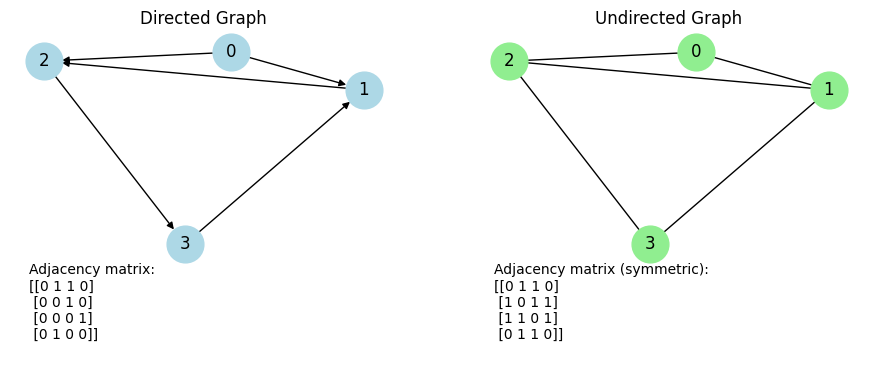

In [8]:
# @title The graph on the left is directed, with 4 nodes and 5 edges. Note that there is an edge from node 0 to 1, but not from node 1 to 0. The graph on the right is undirected.


# Create a directed graph (using DiGraph) with 4 nodes and 5 edges
G_directed = nx.DiGraph() # 创建一个有向图
G_directed.add_edges_from([(0, 1), (0, 2), (1, 2), (2, 3), (3, 1)])

# Create an undirected graph with the same 4 nodes but undirected edges
G_undirected = nx.Graph() # 创建一个无向图
G_undirected.add_edges_from([(0, 1), (0, 2), (1, 2), (2, 3), (3, 1)])

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

# Plot directed graph on the left
pos = nx.spring_layout(G_directed)
# arrows=True表示显示有向图的箭头。 arrows=False呈现的也是无向图的效果
nx.draw(G_directed, pos, ax=axes[0], with_labels=True, node_color='lightblue', node_size=700, arrows=True)
axes[0].set_title("Directed Graph")

# Print directed adjacency matrix
A_directed = nx.adjacency_matrix(G_directed).todense() # 通过nx.adjacency_matrix()获取其邻接矩阵,todense()使其变为n*n的矩阵
directed_matrix = (f'Adjacency matrix:\n{A_directed}\n')
# Adjust the ha parameter to 'left' for left alignment
axes[0].text(0.05, -0.2, directed_matrix, ha='left', va='center', transform=axes[0].transAxes, fontsize=10)

# Plot undirected graph on the right
nx.draw(G_undirected, pos, ax=axes[1], with_labels=True, node_color='lightgreen', node_size=700, arrows=True)
axes[1].set_title("Undirected Graph")

# Print undirected adjacency matrix
A_undirected = nx.adjacency_matrix(G_undirected).todense()
undirected_matrix = (f'Adjacency matrix (symmetric):\n{A_undirected}\n')
# Adjust the ha parameter to 'left' for left alignment
axes[1].text(0.05, -0.2, undirected_matrix, ha='left', va='center', transform=axes[1].transAxes, fontsize=10)

# Subplots so they plot side by side
plt.subplots_adjust(bottom=0.3) # 调整底部的空间，使文本不被遮挡

# Show the plots
plt.show()


### **<font color='#e59454'>Task: try changing an edge in the directed graph (named G_directed) from directed to undirected**

Hint: NetworkX has a built in function to add edges to a graph. Try using [add_edge](https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.add_edge.html).


<details>
  <summary>Click me to for more help</summary>

Make the edge from 0 -> 1 undirected by adding the reverse edge 1 -> 0

G_directed.add_edge(1, 0)

Original edges: [(0, 1), (0, 2), (1, 2), (2, 3), (3, 1)]
Updated edges: [(0, 1), (0, 2), (1, 2), (1, 0), (2, 3), (3, 1)]


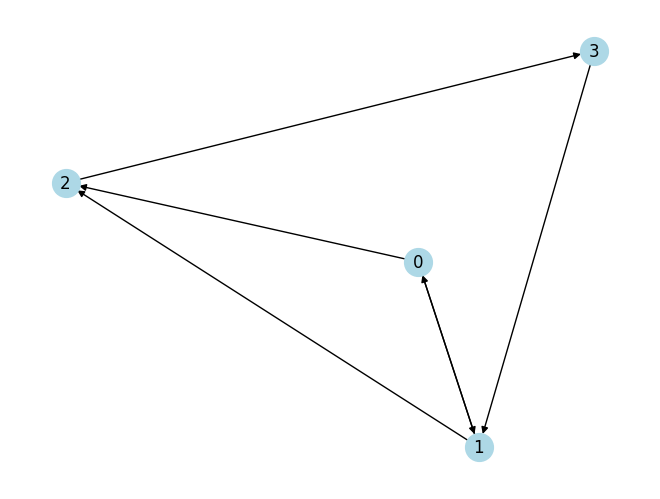

In [11]:
# Before updating edge
print("Original edges:", list(G_directed.edges))

# YOUR CODE HERE
G_directed.add_edge(1, 0)

# Check after updating edge
print("Updated edges:", list(G_directed.edges))
nx.draw(G_directed, with_labels=True, node_color='lightblue', node_size=400, arrows=True)

In [ ]:
#@markdown **<font color='#e59454'>Question Time! Run to Show Question**

question = "How many edges did the graph have before? How many are there now?"
correct_answer = "There were 5 edges before, and now there are 6."
decoy_answers = [
    "There were 5 edges before, and now there are 5.",
    "There were 5 edges before, and now there are 7.",
    "There were 5 edges before, and now there are 4."
]

explanation = "Having an undirected edge between n0 to n1 is the same as having two directed edges from n0 to n1 and n1 to n0. When the directed edge was replaced with an undirected edge, it added a reverse edge between the same two nodes."


# Create the quiz
create_quiz(question, correct_answer, decoy_answers, explanation)


## **<font color='#569098'>Graph Theory: Further define nodes and edges with feature embeddings**


Graphs can further be defined by adding node, feature, or graph embeddings.
We can use the graphein package to add protein edge and node features and visualize them with an interactive graph.

Below is a set of defined parameters. We can use these to build protein graphs and visualize the node and edge features that are being added.
可以通过添加节点、特征或图嵌入来进一步定义图。我们可以使用 graphein 包添加蛋白质边缘和节点特征，并通过交互式图表将它们可视化。
以下是一组定义的参数。我们可以使用它们来构建蛋白质图并可视化正在添加的节点和边缘特征。

Graphein's `ProteinGraphConfigs` takes in a dictionary of lists of construction functions to define how the node, edge, and overall graph should be constructed.

Graph and edge metadata functions take in a `nx.Graph` object and return the same nx.Graph object but with added node features. Node metadata functions take in a node, data tuple from `G.nodes(data=True)` and returns a `pd.Series`.

Graphein 的 ProteinGraphConfigs 接受构造函数列表的字典来定义如何构造节点、边和整体图。 图和边元数据函数接受 nx.Graph 对象并返回相同的 nx.Graph 对象，但添加了节点功能。节点元数据函数接收节点、来自 G.nodes(data=True) 的数据元组并返回 pd.Series。

In [15]:
# @title graphein graph

from IPython.display import display
from graphein.protein.graphs import construct_graph
from graphein.protein.visualisation import plotly_protein_structure_graph # 用于可视化蛋白质图，支持通过 Plotly 显示高质量的交互式图形。
from functools import partial

params_1 = {
    "granularity": "CA",  # alpha碳
    "edge_construction_functions": [
        gp.add_peptide_bonds, # 增加肽键
    ],
    "node_metadata_functions": [
        gp.amino_acid_one_hot,  # 添加氨基酸的独热编码
        gp.meiler_embedding,  # 添加 Meiler embedding 特征
        partial(gp.expasy_protein_scale, add_separate=True)
        # 添加Expasy蛋白质特征，EXPASY是一个在线工具，用于分析蛋白质的理化性质，包括等电点（PI）的计算。
        # partial生成一个新函数，该函数的行为与gp.expasy_protein_scale类似，但参数add_separate=True已经被固定。
        # add_separate：一个布尔值参数，用于指定特征是以单独的属性添加（True），还是以嵌套结构存储。
    ],
}
# 在调用函数时，*和**都是分配参数用的：*用于tuple，**用于字典
config_1 = gp.ProteinGraphConfig(**params_1)  # 将params_1的参数传递进去。
print(config_1)

# construct_graph:从 pdb_code 或 pdb_path 构建蛋白质结构图
protein_graph_1 = construct_graph(config=config_1, pdb_code='1L2Y')

plot_1 = plotly_protein_structure_graph(
    protein_graph_1,
    colour_edges_by="kind", # 边的颜色由种类决定
    colour_nodes_by="degree", # 节点的颜色由度数决定
    label_node_ids=False, # 不显示节点id标签
    plot_title="",  # 设置标题为空
    node_size_multiplier=1  # 设置节点大小倍数
    )

def convert_to_networkx_and_print_info(graph):
    # 将 Graphein 图转换为 NetworkX 图
    nx_graph = nx.Graph(graph)

    # Number of nodes and edges
    n_node = nx_graph.number_of_nodes()
    n_edge = nx_graph.number_of_edges()

    # Node and edge features (assuming attributes are stored as dicts)
    node_features = nx.get_node_attributes(nx_graph, "features")  # Replace "features" with the correct attribute if needed
    edge_features = nx.get_edge_attributes(nx_graph, "features")  # Replace "features" with the correct attribute if needed

    # Edges
    senders = list(nx_graph.edges())  # 边的发送方列表
    receivers = [(v, u) for u, v in senders]  # 边的接收方列表

    # Global features (if applicable)
    global_context = nx_graph.graph.get("globals", None)

    # Create the information string
    info = (
        f"Number of nodes: {n_node}\n"
        f"Number of edges: {n_edge}\n"
        f"Node features: {node_features}\n"
        f"Edge features: {edge_features}\n"
        f"Edges (senders): {senders}\n"
        f"Edges (receivers): {receivers}\n"
        f"Graph-level features (globals): {global_context}"
    )

    return info

  # Convert to NetworkX and gather info strings
info_1 = convert_to_networkx_and_print_info(protein_graph_1)

print("Graph 1 Information:")
print(info_1)

Output()

granularity='CA' keep_hets=[] insertions=True alt_locs='max_occupancy' pdb_dir=None verbose=False exclude_waters=True deprotonate=False protein_df_processing_functions=None edge_construction_functions=[<function add_peptide_bonds at 0x7b69da049e10>] node_metadata_functions=[<function amino_acid_one_hot at 0x7b69da054dc0>, <function meiler_embedding at 0x7b69da054d30>, functools.partial(<function expasy_protein_scale at 0x7b69da054ca0>, add_separate=True)] edge_metadata_functions=None graph_metadata_functions=None get_contacts_config=None dssp_config=None


Graph 1 Information:
Number of nodes: 20
Number of edges: 19
Node features: {}
Edge features: {}
Edges (senders): [('A:ASN:1', 'A:LEU:2'), ('A:LEU:2', 'A:TYR:3'), ('A:TYR:3', 'A:ILE:4'), ('A:ILE:4', 'A:GLN:5'), ('A:GLN:5', 'A:TRP:6'), ('A:TRP:6', 'A:LEU:7'), ('A:LEU:7', 'A:LYS:8'), ('A:LYS:8', 'A:ASP:9'), ('A:ASP:9', 'A:GLY:10'), ('A:GLY:10', 'A:GLY:11'), ('A:GLY:11', 'A:PRO:12'), ('A:PRO:12', 'A:SER:13'), ('A:SER:13', 'A:SER:14'), ('A:SER:14', 'A:GLY:15'), ('A:GLY:15', 'A:ARG:16'), ('A:ARG:16', 'A:PRO:17'), ('A:PRO:17', 'A:PRO:18'), ('A:PRO:18', 'A:PRO:19'), ('A:PRO:19', 'A:SER:20')]
Edges (receivers): [('A:LEU:2', 'A:ASN:1'), ('A:TYR:3', 'A:LEU:2'), ('A:ILE:4', 'A:TYR:3'), ('A:GLN:5', 'A:ILE:4'), ('A:TRP:6', 'A:GLN:5'), ('A:LEU:7', 'A:TRP:6'), ('A:LYS:8', 'A:LEU:7'), ('A:ASP:9', 'A:LYS:8'), ('A:GLY:10', 'A:ASP:9'), ('A:GLY:11', 'A:GLY:10'), ('A:PRO:12', 'A:GLY:11'), ('A:SER:13', 'A:PRO:12'), ('A:SER:14', 'A:SER:13'), ('A:GLY:15', 'A:SER:14'), ('A:ARG:16', 'A:GLY:15'), ('A:PRO:17', 'A

**Hover over the nodes and edges in the protein graph below to see the feature embeddings.**

In [16]:
display(plot_1) # 使用IPython的display函数显示图

It is common to **convert the embedded features of nodes and edges into feature matrices** for input into a GNN. The feature vector for each node or edge is a numerical representation of its characteristics. Although it’s a vector of numbers, these numbers encode meaningful information, such as properties of an atom, in a protein graph. The GNN will learn the features from these feature vectors.

通常将节点和边的嵌入特征转换为特征矩阵以输入到 GNN 中。每个节点或边的特征向量是其特征的数值表示。尽管它是数字向量，但这些数字在蛋白质图中编码了有意义的信息，例如原子的属性。 GNN 将从这些特征向量中学习特征。

# **<font color='#569098'>Section 2: GNN Theory**

GNN 是一种学习图中数据关系的神经网络。在下图中，问题由输入图表示。每个节点都有一个初始向量表示。节点通过不同的边类型连接。

A GNN is a neural network that learns relationships on data in a  graph. In the image below, the problem is represented by an input graph. Each node has an initial vector representation. Nodes are connected by different edge types.

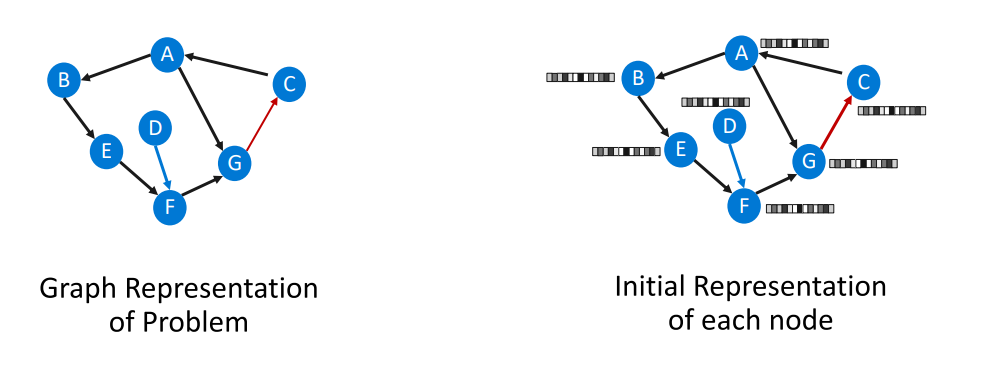


在训练期间，GNN 更新这些节点向量以反映特定于要解决的任务或问题的信息。它通过迭代消息传递来实现这一点。

During training, the GNN updates these node vectors to reflect information that is specific to the task or problem to be solved. It does this through iterative **message passing**.

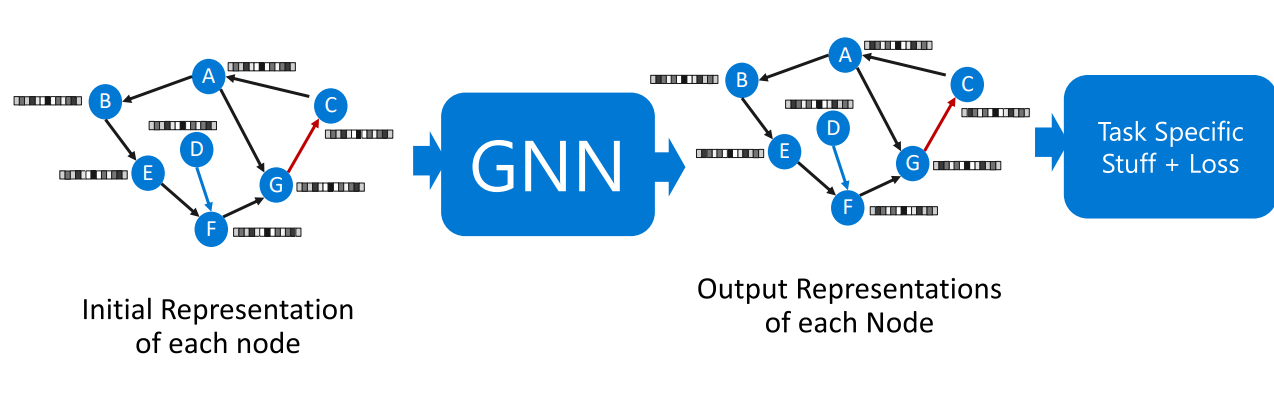


*Image Source: [An Introduction to Graph Neural Networks: Models and Application ](https://www.youtube.com/watch?v=zCEYiCxrL_0&t=824s)*

## **<font color='#569098'>GNN Theory: Message Passing**


### <font color='#569098'> **Message Passing**

A simple message-passing equation for a Graph Convolutional Network (GCN) can be represented as:

# $$ \mathbf{h}_i^{(k+1)} = \sigma \left( \sum_{j \in \mathcal{N}(i)} \frac{1}{\sqrt{d_i d_j}} \mathbf{W}^{(k)} \mathbf{h}_j^{(k)} \right) $$

Here's a breakdown of each component:

- $\mathbf{h}_i^{(k+1)}$: The updated node embedding for node $i$ at layer $k+1$.
- $\mathbf{h}_j^{(k)}$: The embedding of a neighboring node $j$ at the current layer $k$.
- $\mathcal{N}(i)$: The set of neighboring nodes of $i$.
- $d_i$ and $d_j$: The degrees of nodes $i$ and $j$, respectively. The term $\frac{1}{\sqrt{d_i d_j}}$ serves as a normalization factor.
- $\mathbf{W}^{(k)}$: The weight matrix for layer $k$, which is trainable.
- $\sigma$: An activation function, such as ReLU, to introduce non-linearity.

This equation represents the core operation of a GCN: for each node, the features from its neighbors are aggregated, normalized, transformed by $\mathbf{W}^{(k)}$, and passed through $\sigma$ to get updated node embeddings at the next layer.

该方程代表了 GCN 的核心操作：对于每个节点，来自其邻居的特征被聚合、归一化、通过 W(k) 变换，并通过 σ 以获得下一层的更新节点嵌入。

### <font color='#569098'> **Breaking Down the GCN Equation for Aggregation, Normalization, and Applying Weights**


# $$ h_A^{(1)} = \sigma \left(
\color{DarkMagenta}{\sum_{j \in \mathcal{N}(A)}} \
\color{CornflowerBlue}{\underbrace{\frac{1}{\sqrt{d_A d_B}}}_{\text{Normalization}}} \
\color{MediumSeaGreen}{\underbrace{W^{(0)}}_{\text{Weights}} \underbrace{h_B^{(0)}}_{\text{Neighbor's Features}}}
\right)
$$


### <font color='#e59454'> **Key Components:**
   
1. **<font color='#e59454'>Aggregation:**
   - **Part of the equation**: $ \sum_{j \in \mathcal{N}(A)} $
   - **Explanation**: The summation represents the <font color='#8B008B'><b>**aggregation**</b></font> of messages from all neighbors of node $A$. This is where node $A$ collects feature vectors from its neighbors (in this case, just $B$).

2. **<font color='#e59454'>Normalization:**
   - **Part of the equation**: $ \frac{1}{\sqrt{d_A d_B}} $
   - **Explanation**: The term $ \frac{1}{\sqrt{d_A d_B}} $ represents the <font color='#6495ED'><b>**normalization**</b></font> factor. It scales each neighbor's contribution based on the degrees ($d_A$ and $d_B$) of the nodes involved, ensuring proportional influence.

3. **<font color='#e59454'>Applying Weights:**
   - **Part of the equation**: $ W^{(0)} h_B^{(0)} $
   - **Explanation**: The product $ W^{(0)} h_B^{(0)} $ <font color='#3CB371'><b>**applies the learnable weight matrix**</b></font> $ W^{(0)} $ to the feature vector $ h_B^{(0)} $. This transformation adjusts the neighbor’s features before they are aggregated.


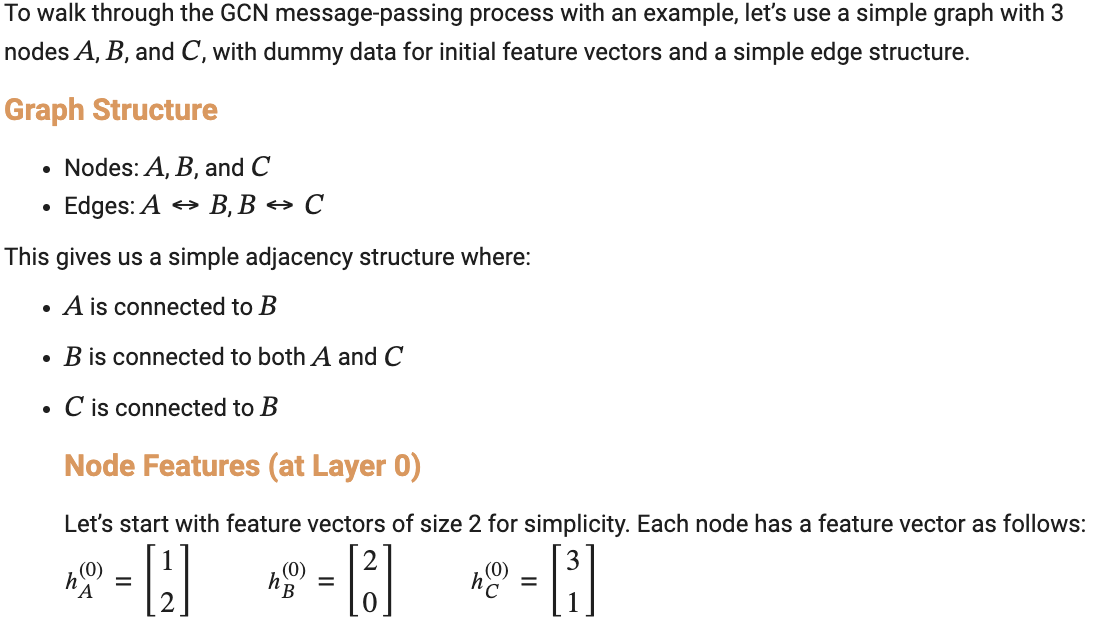
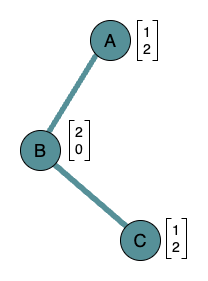
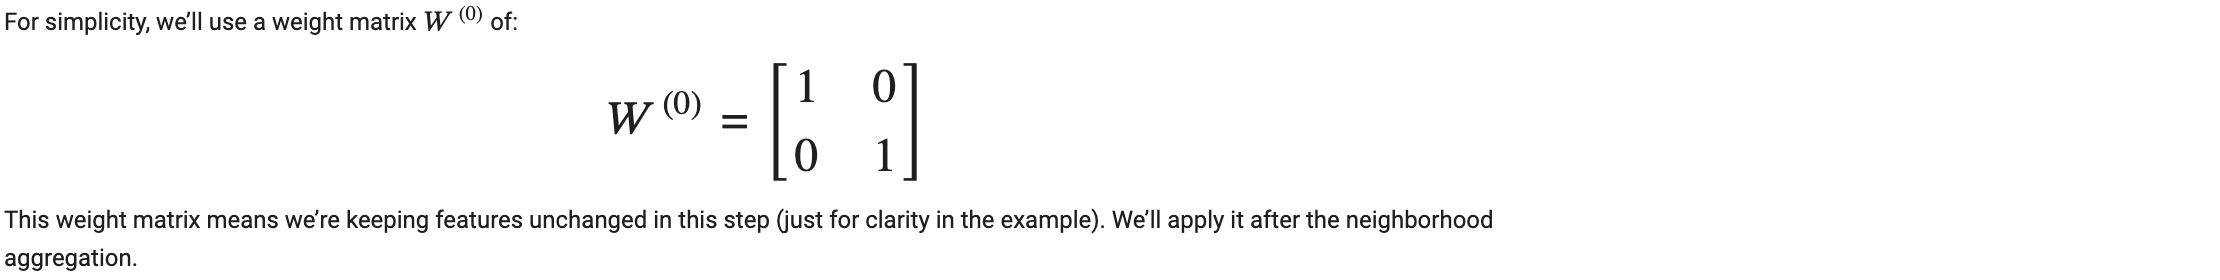
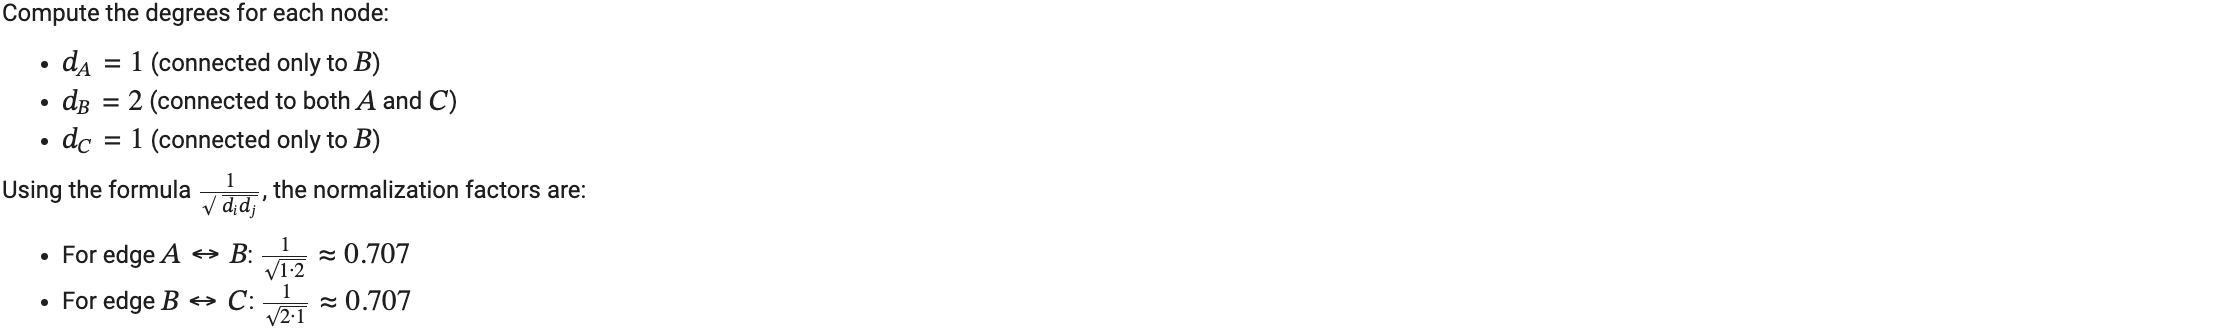
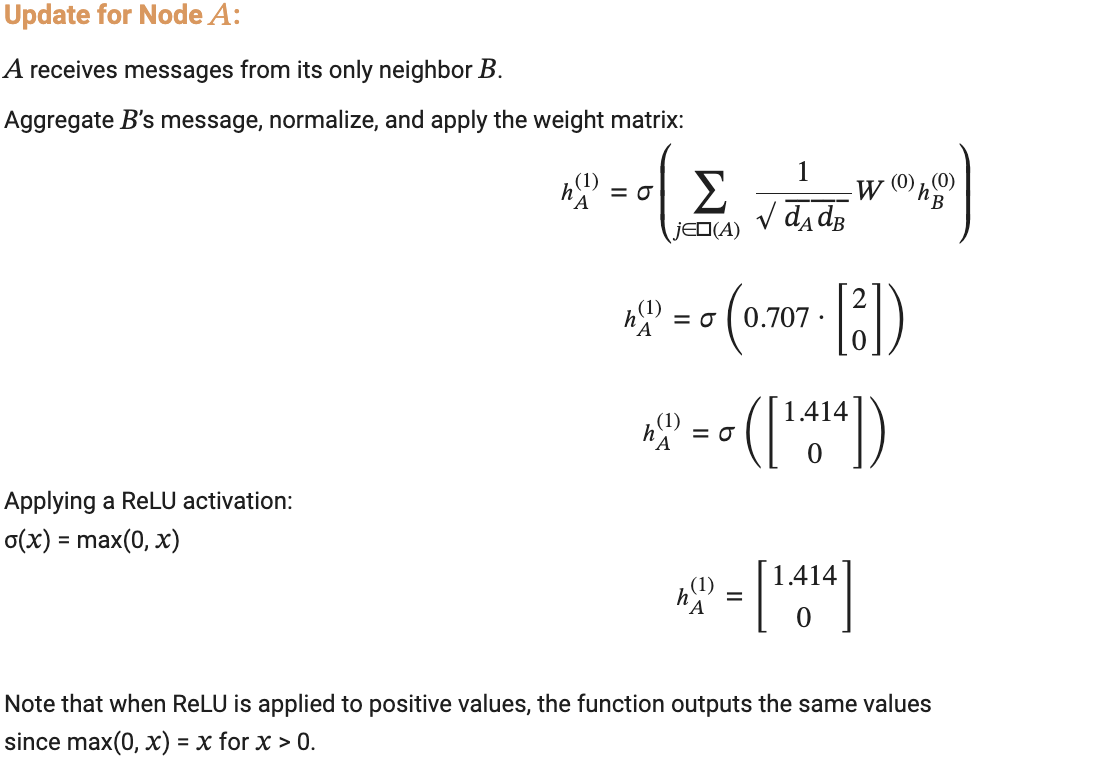
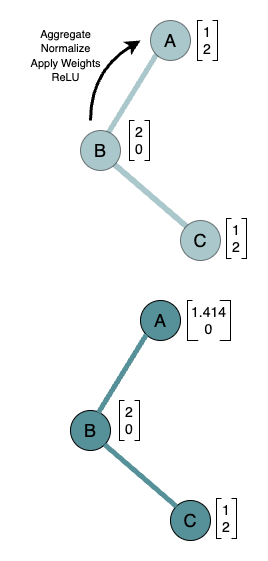
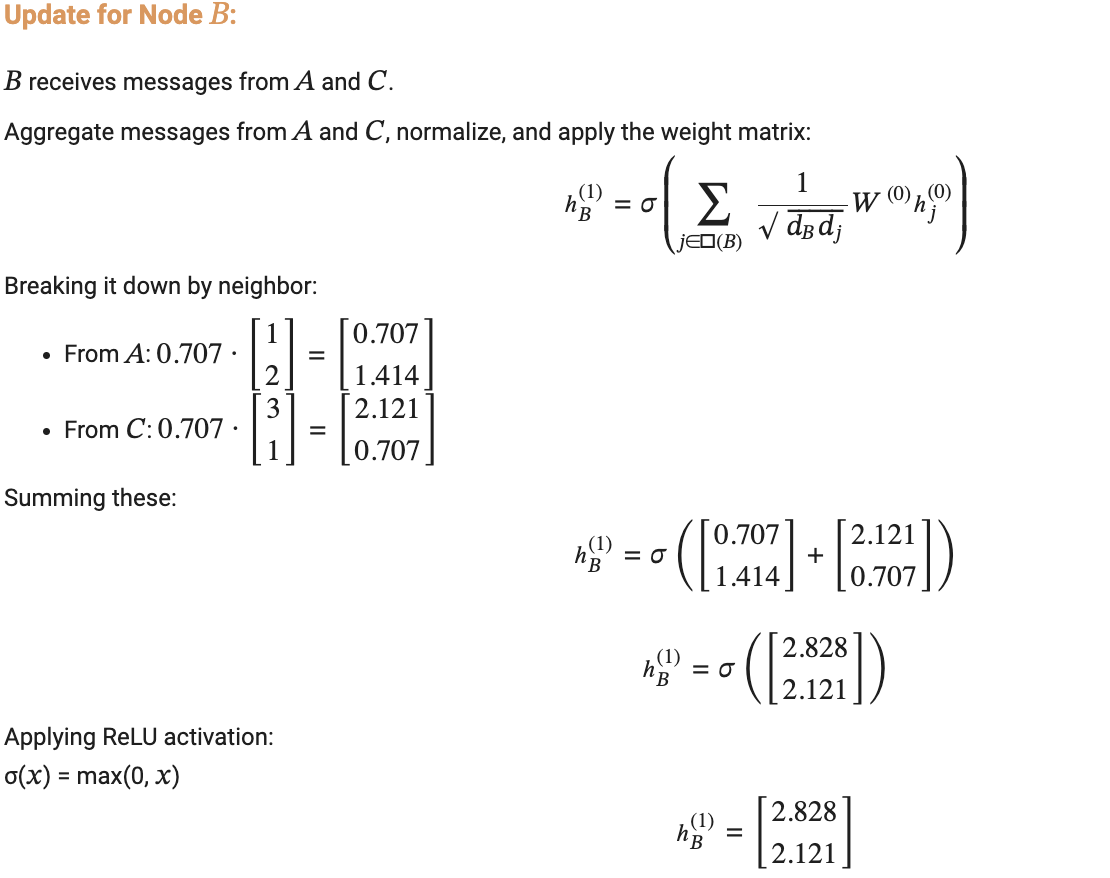
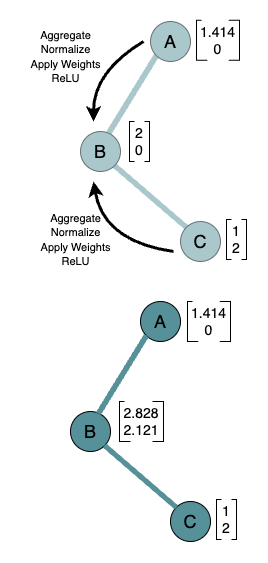
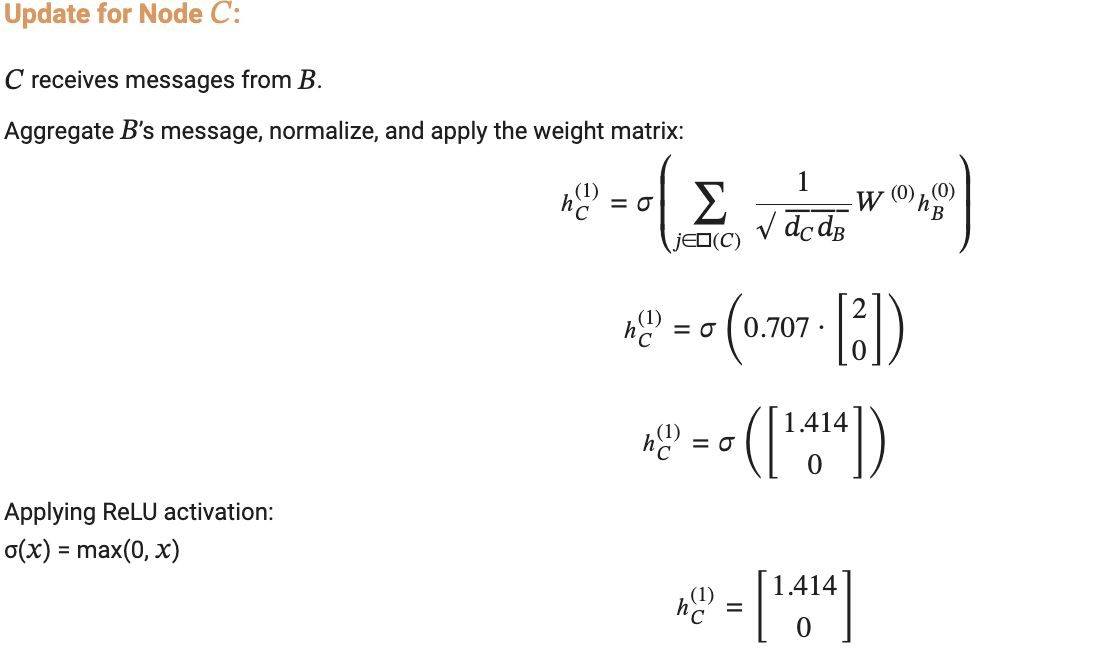
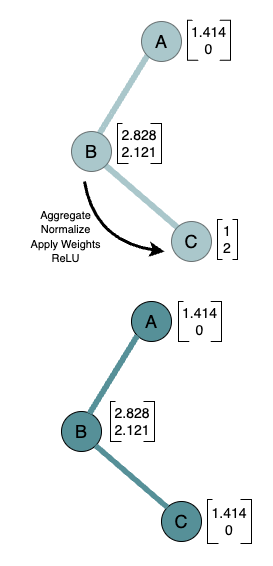
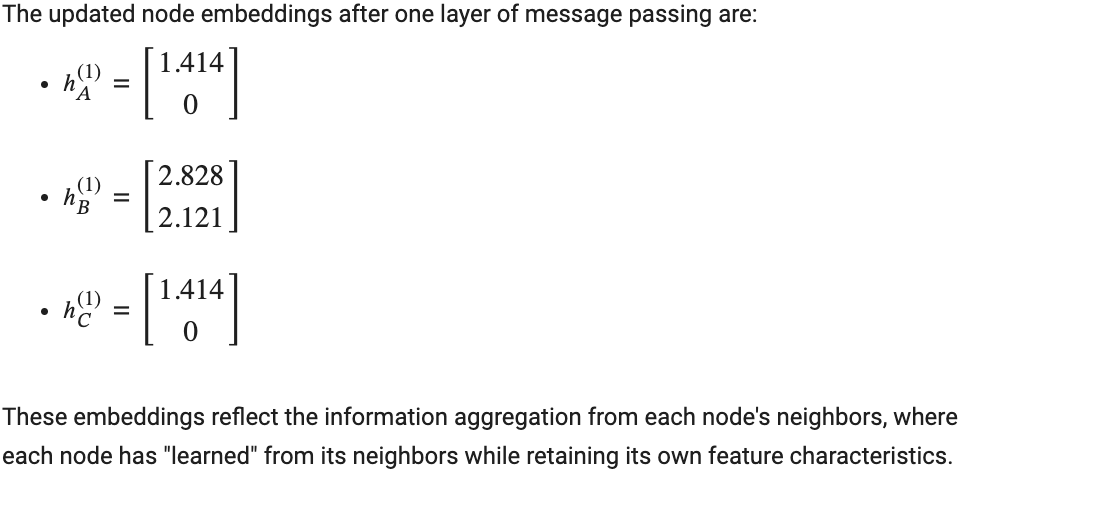
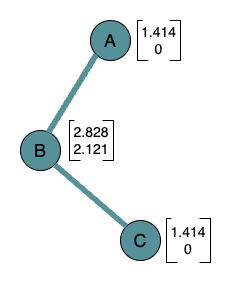

In [11]:
# @title <font color='#569098'> **Step-by-Step Example of Message Passing in a GCN**

from IPython.core.display import display, HTML
import base64

# Paths to your images in Colab files
image_paths = [
    "/content/images/structure_text.png",  # First pair - Left structure text
    "/content/images/starting_structure.png",  # First pair - Right structure image
    "/content/images/initialize_text.png",  # Single image initialize text
    "/content/images/calculate_text.png",  # Single image calc text
    "/content/images/node_a_text.png",  # Second pair - Left node a text
    "/content/images/node_a.png",  # Second pair - Right node a image
    "/content/images/node_b_text.png",  # Third pair - Left node b text
    "/content/images/node_b.png",  # Third pair - Right node b image
    "/content/images/node_c_text.png",  # Fourth pair - Left node c text
    "/content/images/node_c.png",  # Fourth pair - Right node c image
    "/content/images/final_output_text.png", # Fifth pair - Left final output text
    "/content/images/final_structure.png"  # Fifth pair - Right final output image
]

# Titles for each section
titles = [
    "Step 1: Initialize Weights",
    "Step 2: Degree Calculation and Normalization",
    "Step 3: Aggregation and Update for Each Node",
    "Final Output After One Layer of Message Passing"
]

# Convert the images to base64 strings
base64_images = []
for path in image_paths:
    with open(path, "rb") as img_file:
        base64_images.append(base64.b64encode(img_file.read()).decode('utf-8'))

# Generate the HTML code
html_code = f"""
<div style="margin-bottom: 20px;">
    <div style="display: flex; justify-content: space-between; align-items: center; margin-bottom: 10px;">
        <div style="flex: 1; text-align: center; padding-right: 10px;">
            <img src="data:image/png;base64,{base64_images[0]}" style="max-width: 100%;" />
        </div>
        <div style="flex: 1; text-align: center; padding-left: 10px;">
            <img src="data:image/png;base64,{base64_images[1]}" style="max-width: 100%;" />
        </div>
    </div>
    <hr style="border: 1px solid #ddd; margin: 20px 0;">
</div>
<div style="margin-bottom: 20px;">
    <h3 style="color: #569098; font-size: 20px;"><b>{titles[0]}</b></h3>
    <div style="text-align: center; margin-bottom: 10px;">
        <img src="data:image/png;base64,{base64_images[2]}" style="max-width: 100%;" />
    </div>
    <hr style="border: 1px solid #ddd; margin: 20px 0;">
</div>
<div style="margin-bottom: 20px;">
    <h3 style="color: #569098; font-size: 20px;"><b>{titles[1]}</b></h3>
    <div style="text-align: center; margin-bottom: 10px;">
        <img src="data:image/png;base64,{base64_images[3]}" style="max-width: 100%;" />
    </div>
    <hr style="border: 1px solid #ddd; margin: 20px 0;">
</div>
<div style="margin-bottom: 20px;">
    <h3 style="color: #569098; font-size: 20px;"><b>{titles[2]}</b></h3>
    <div style="display: flex; justify-content: space-between; align-items: center; margin-bottom: 10px;">
        <div style="flex: 1; text-align: center; padding-right: 10px;">
            <img src="data:image/png;base64,{base64_images[4]}" style="max-width: 100%;" />
        </div>
        <div style="flex: 1; text-align: center; padding-left: 10px;">
            <img src="data:image/png;base64,{base64_images[5]}" style="max-width: 100%;" />
        </div>
    </div>
    <hr style="border: 1px solid #ddd; margin: 20px 0;">
</div>
<div style="margin-bottom: 20px;">
    <div style="display: flex; justify-content: space-between; align-items: center; margin-bottom: 10px;">
        <div style="flex: 1; text-align: center; padding-right: 10px;">
            <img src="data:image/png;base64,{base64_images[6]}" style="max-width: 100%;" />
        </div>
        <div style="flex: 1; text-align: center; padding-left: 10px;">
            <img src="data:image/png;base64,{base64_images[7]}" style="max-width: 100%;" />
        </div>
    </div>
    <hr style="border: 1px solid #ddd; margin: 20px 0;">
</div>
<div style="margin-bottom: 20px;">
    <div style="display: flex; justify-content: space-between; align-items: center; margin-bottom: 10px;">
        <div style="flex: 1; text-align: center; padding-right: 10px;">
            <img src="data:image/png;base64,{base64_images[8]}" style="max-width: 100%;" />
        </div>
        <div style="flex: 1; text-align: center; padding-left: 10px;">
            <img src="data:image/png;base64,{base64_images[9]}" style="max-width: 100%;" />
        </div>
    </div>
    <hr style="border: 1px solid #ddd; margin: 20px 0;">
</div>
<div style="margin-bottom: 20px;">
    <h3 style="color: #569098; font-size: 20px;"><b>{titles[3]}</b></h3>
    <div style="display: flex; justify-content: space-between; align-items: center; margin-bottom: 10px;">
        <div style="flex: 1; text-align: center; padding-right: 10px;">
            <img src="data:image/png;base64,{base64_images[10]}" style="max-width: 100%;" />
        </div>
        <div style="flex: 1; text-align: center; padding-left: 10px;">
            <img src="data:image/png;base64,{base64_images[11]}" style="max-width: 100%;" />
        </div>
    </div>
    <hr style="border: 1px solid #ddd; margin: 20px 0;">
</div>
"""

# Display the HTML
display(HTML(html_code))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [14]:
# @title **<font color='#569098'>GNN Theory: Permutation Invariance置换不变性 vs. Permutation Equivariance置换等变性**

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Helper function to plot the graph and its adjacency matrix
def plot_graph_and_matrix(G, pos, ax_graph, ax_matrix, title):
    # Plot the graph
    nx.draw(G, pos, with_labels=True, node_color='lightblue', ax=ax_graph)
    ax_graph.set_title(title)

    # Get the adjacency matrix
    adj_matrix = nx.adjacency_matrix(G).todense()

    # Create a lighter colormap based on Blues创建一个渐变色图，这里使用了Blues配色系列，但加入了更浅的颜色（从白色到淡蓝色再到深蓝色），用于显示邻接矩阵
    cmap = LinearSegmentedColormap.from_list("lighter_blues", ["#ffffff", "#cce5ff", "#6699cc"])

    # Plot the adjacency matrix
    ax_matrix.matshow(adj_matrix, cmap=cmap)
    for (i, j), val in np.ndenumerate(adj_matrix):  # np.ndenumerate(adj_matrix)遍历矩阵的每个元素并返回其索引和对应值
        ax_matrix.text(j, i, f'{val}', ha='center', va='center', color='black') # ax_matrix.text()在每个矩阵位置上显示其对应的值。
    ax_matrix.set_xticks([])  # 为了让邻接矩阵更简洁，移除横纵坐标轴的刻度
    ax_matrix.set_yticks([])

# Function to apply permutation and plot
def apply_permutation_and_plot(permutation_func, permutation_type, title):
    # Original graph
    G = nx.Graph()
    G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])

    # Positions for original graph 使用circular_layout布局将节点排布成一个圆形。
    pos = nx.circular_layout(G)

    # Get og adjacency matrix
    adj_matrix = nx.adjacency_matrix(G).todense()


    # Apply permutation
    # 如果 permutation_type 是 "invariance"，则调用invariant_permutation()对邻接矩阵进行置换。
    # 对于置换不变性，矩阵不发生变化，表示函数的输出与输入顺序无关，置换不会影响图的表示。
    if permutation_type == "invariance":
        permuted_matrix = permutation_func(adj_matrix)
        G_permuted = nx.from_numpy_array(permuted_matrix)
        pos_permuted = pos
        equation = r"f(PX) = f(X)"
    # 如果 permutation_type 是 "equivariance"，则调用equivariant_permutation()，矩阵会发生变化。
    # 置换后的矩阵会映射到新的图结构，表示图的特征随置换而变化。
    elif permutation_type == "equivariance":
        permuted_matrix = permutation_func(adj_matrix)
        G_permuted = nx.from_numpy_array(permuted_matrix)
        pos_permuted = pos
        equation = r"f(PX) = Pf(X)"
    elif permutation_type == "unknown":
        permuted_matrix = permutation_func(adj_matrix)
        G_permuted = nx.from_numpy_array(permuted_matrix)
        pos_permuted = pos
        equation = r"???"
    else:
        raise ValueError("Permutation type must be 'invariance', 'equivariance', or 'unknown'.")


    # Plot results
    fig, axes = plt.subplots(1, 5, figsize=(8, 4))  # 生成5个子图

    # Plot original graph and matrix
    plot_graph_and_matrix(G, pos, axes[0], axes[1], "Original Graph & Matrix")

    # Plot arrow with the equation 在子图 axes[2] 上绘制箭头，并显示置换方程。
    axes[2].annotate("", xy=(1, 0.5), xytext=(0, 0.5), arrowprops=dict(arrowstyle="->", lw=2))
    axes[2].text(0.5, 0.6, equation, ha="center", fontsize=12)
    axes[2].axis('off')

    # Plot permuted graph and matrix
    plot_graph_and_matrix(G_permuted, pos_permuted, axes[3], axes[4], f"Permuted Graph & Matrix ({title})")

    plt.tight_layout()
    plt.show()



# og permutation functions
import numpy as np

# Invariant permutation function
def invariant_permutation(adj_matrix):
    """
    This function applies a permutation to simulate permutation invariance.
    The permutation does not change the adjacency matrix, reflecting invariance.
    """
    # No change to the adjacency matrix (invariant)
    return adj_matrix

# Equivariant permutation function
def equivariant_permutation(adj_matrix):
    """
    This function applies a permutation that simulates permutation equivariance.
    The permutation matrix P is applied to the adjacency matrix to reflect equivariance.
    """
    # Define the permutation matrix P for swapping nodes
    perm = [2, 0, 3, 1]  # Example permutation used in the original code 相当于邻接矩阵第一行实际上代表结点2，第一列也代表2
    # np.eye生成4*4单位矩阵，然后从单位矩阵中选取排列顺序为 [2, 0, 3, 1] 的行来构造新的矩阵。
    P = np.eye(4, dtype=int)[perm]

    # Apply the permutation: P * adj_matrix * P.T and cast result to integers
    # P @ adj_matrix 会修改邻接矩阵中的行；@ P.T 会调整邻接矩阵的列
    return (P @ adj_matrix @ P.T).astype(int)

- **Permutation Invariance**:
A function is permutation invariant if the output remains the same regardless of how the input is ordered.  For example, when aggregating information from the neighbors of a node, the aggregation operation should not be affected by the order in which the neighbors are considered. Common aggregation functions like sum, mean, and max are naturally permutation invariant.

- **排列不变性**: 如果无论输入如何排序，输出结果都保持不变，则该函数具有排列不变性。 例如，当聚合一个节点的邻居信息时，聚合操作不应受考虑邻居顺序的影响。 常见的聚合函数，如总和、平均值和最大值，都具有天然的置换不变性。

We say that f(X) is permutation invariant if, for all permutation matrices P:

我们说 f(X) 是置换不变的，如果对于所有置换矩阵 P：
$$f(PX) = f(X)$$

Use when:
When your task is summarized into a single output, like graph classification, when the overall prediction should not depend on the specific ordering of nodes or edges

使用时机：当您的任务被汇总为单个输出时（例如图分类），当整体预测不应依赖于节点或边的特定顺序时

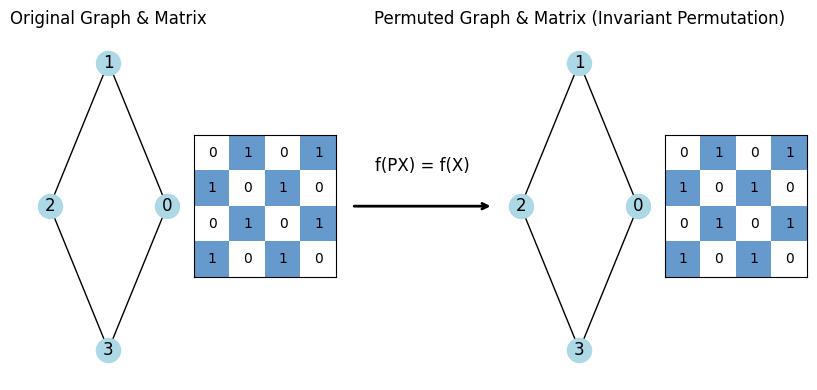

In [ ]:
apply_permutation_and_plot(invariant_permutation, "invariance", "Invariant Permutation")

- **Permutation Equivariance**: A function is permutation equivariant if the output changes in the same way as the input when the input order is permuted.
- **置换等变性**： 如果输入顺序发生变化时，输出以与输入相同的方式变化，则该函数为置换等变函数。

We say that f(X) is permutation equivariant if, for all permutation matrices P:

我们说 f(X) 是置换等变的，如果对于所有置换矩阵 P：
$$f(PX) = Pf(X)$$

Use when:
When your task involves node-level or edge-level predictions, when node ordering matters, ie when you need to maintain a consistent mapping between input nodes and their corresponding outputs.

使用时机：当任务涉及节点级或边缘级预测时，当节点排序很重要时，即当您需要在输入节点及其相应输出之间维护一致的映射时。

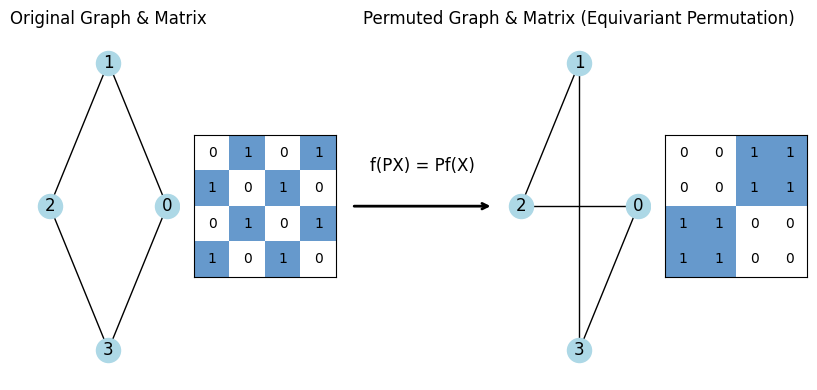

In [ ]:
apply_permutation_and_plot(equivariant_permutation, "equivariance", "Equivariant Permutation")

### **<font color='#e59454'>Task: Try applying the permutation functions below and identify which ones are invariant or equivariant.**

<details>
  <summary>Click me to for more help</summary>

```
apply_permutation_and_plot(identity_permutation, "unknown", "Identity Permutation") # invariant

apply_permutation_and_plot(reverse_permutation, "unknown", "Reverse Permutation") # invariant

apply_permutation_and_plot(swap_permutation, "unknown", "Swap Permutation") # equivariant
```


In [ ]:
# Simple permutation functions
def identity_permutation(adj_matrix):
    return adj_matrix

def reverse_permutation(adj_matrix):
    P = np.array([[0, 0, 0, 1],
                  [0, 0, 1, 0],
                  [0, 1, 0, 0],
                  [1, 0, 0, 0]])
    return P @ adj_matrix @ P.T

def swap_permutation(adj_matrix):
    P = np.array([[0, 1, 0, 0],
                  [1, 0, 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    return P @ adj_matrix @ P.T

# YOUR CODE HERE, Try applying the permutation functions and identify if they are invariant or equivariant
# raise NotImplementedError()


In [18]:
#@markdown **<font color='#e59454'>Question Time! Run to Show Question**

from IPython.display import display, HTML
import random

def create_all_correct_quiz(question, answers_with_explanations):
    # Shuffle answers randomly
    answers = list(answers_with_explanations.keys())
    random.shuffle(answers)

    # Generate the HTML code
    html_code = f"""<div style="font-family: Arial, sans-serif; margin: 30px; max-width: 1000px;">
    <h3 style="word-wrap: break-word;">{question}</h3>"""

    # Add each answer as a checkbox
    for i, answer in enumerate(answers):
        html_code += f"""
        <div style="word-wrap: break-word; margin-bottom: 10px;">
        <input type="checkbox" id="option{i}" name="quiz" value="{answer}">
        <label for="option{i}" id="label{i}">{answer}</label>
        </div>"""

    # Add the submit button and feedback section
    html_code += """
    <button onclick="showExplanations()">Submit</button>
    <div id="explanations" style="display: none; margin-top: 20px; font-weight: bold;">
        <h4>Explanations:</h4>
        <ul>"""

    # Add explanations
    for answer, explanation in answers_with_explanations.items():
        html_code += f"<li><b>{answer}:</b> {explanation}</li>"

    html_code += """
        </ul>
    </div>
    </div>
    <script>
    function showExplanations() {
        var explanations = document.getElementById('explanations');
        explanations.style.display = 'block';
    }
    </script>"""

    display(HTML(html_code))


# Usage
question = "Which of the following tasks would you need invariance for?"
answers_with_explanations = {
    "All are correct.": """Technically each of these tasks requires invariance because they all require message passing."
    "Please read below for more specific details on invariance for each task.""",
    "Predicting the binding affinity of a protein to a ligand.预测蛋白质与配体的结合亲和力": """
        This task requires invariance because the prediction should be independent of
        the specific ordering of the atoms or residues in the protein. The model
        should produce the same binding affinity regardless of how the protein’s atoms
        are ordered in the input. Since the task involves a global property of the entire
        protein-ligand complex, invariance is crucial.此任务需要不变性，因为预测应独立于蛋白质中原子或残基的特定顺序。无论蛋白质的原子在输入中的排序如何，模型都应产生相同的结合亲和力。由于该任务涉及整个蛋白质-配体复合物的全局属性，因此不变性至关重要。
    """,
    "Identifying the most likely catalytic residues in an enzyme.识别酶中最可能的催化残基。": """
        This task requires equivariance, not invariance, because the model needs to
        identify specific residues within the protein. The order of the residues in the
        input matters, as you want to know which exact amino acids are catalytic. If
        the order of nodes changes, the output nodes should change accordingly.此任务需要等变性，而不是不变性，因为模型需要识别蛋白质内的特定残基。输入中残基的顺序很重要，因为您想知道哪些确切的氨基酸是催化性的。如果节点的顺序发生变化，则输出节点应相应变化。
    """,
    "Classifying proteins based on their overall structural fold.根据蛋白质的整体结构折叠对其进行分类": """
        This task requires invariance because the classification of the protein's
        structural fold should not depend on the order in which the secondary structure
        elements (like helices or sheets) are presented. The overall fold is a global
        property, so invariance is necessary to ensure that different permutations of the
        input give the same classification result.此任务需要不变性，因为蛋白质结构折叠的分类不应取决于二级结构元素（如螺旋或片层）的呈现顺序。整体折叠是一种全局属性，因此不变性是必要的，以确保输入的不同排列产生相同的分类结果。
    """,
    "Predicting the effect of a mutation on a specific residue within a protein.预测突变对蛋白质内特定残基的影响。": """
        This task requires equivariance because the prediction is localized to a specific
        residue and its neighboring residues. The model must maintain the relationship
        between the input residue and its output prediction, so if the residue order
        changes, the output should change correspondingly.此任务需要等变性，因为预测局限于特定残基及其相邻残基。模型必须保持输入残基与其输出预测之间的关系，因此如果残基顺序发生变化，输出也应相应变化。
    """
}

create_all_correct_quiz(question, answers_with_explanations)


# **<font color='#569098'>Section 3: Implement a GCN**

## **<font color='#569098'>Implement a GCN: Load and Prep the Input Data**




We will use the PSCDB dataset from [Amemiya et al. (2011)](https://academic.oup.com/nar/article/40/D1/D554/2903618), which contains the pdb files from 839 paired protein structures in their bound and unbound forms across 7 classes of structural rearrangement motion:
coupled domain motion, independent domain motion, coupled local motion, independent local motion, burying ligand motion, no significant motion, and other type motion. <br>
我们将使用 Amemiya 等人(2011)的 PSCDB 数据集。 其中包含来自 839 个配对蛋白质结构的 pdb 文件，其结合和非结合形式涉及 7 类结构重排运动：耦合域运动、独立域运动、耦合局部运动、独立局部运动、埋藏配体运动、无显著运动和其他类型的运动。
Coupled Domain Motion (耦合域运动)：指蛋白质的不同结构域（区域）之间的协调运动。当一个结构域发生运动时，另一个结构域也会随之发生运动。

- Independent Domain Motion (独立域运动)：不同结构域之间独立运动，互不影响。

- Coupled Local Motion (耦合局部运动)：局部区域之间的协调运动。通常是在较小的区域内发生的结构变动，而这些局部区域的变动相互关联。

- Independent Local Motion (独立局部运动)：类似于独立域运动，但这里的运动发生在蛋白质的局部区域，而这些区域的运动不影响其他区域。

- Burying Ligand Motion (配体隐藏运动)：在某些情况下，配体（如小分子或离子）与蛋白质结合后，蛋白质可能会发生结构重排，导致配体的隐藏或埋藏。

- No Significant Motion (无显著运动)：指在结合态和未结合态之间，蛋白质几乎没有发生任何显著的结构变化。

- Other Type Motion (其他类型运动)：如果蛋白质的结构变动不符合上述任何一种类型，那么就归类为其他类型的运动。

**This dataset has been filtered  to only include the unbound pdb files from the following motion types: independent domain motion, independent local motion, and no significant motion.**
该数据集已被过滤为仅包含以下运动类型的未绑定 pdb 文件：独立域运动、独立局部运动和无显著运动。

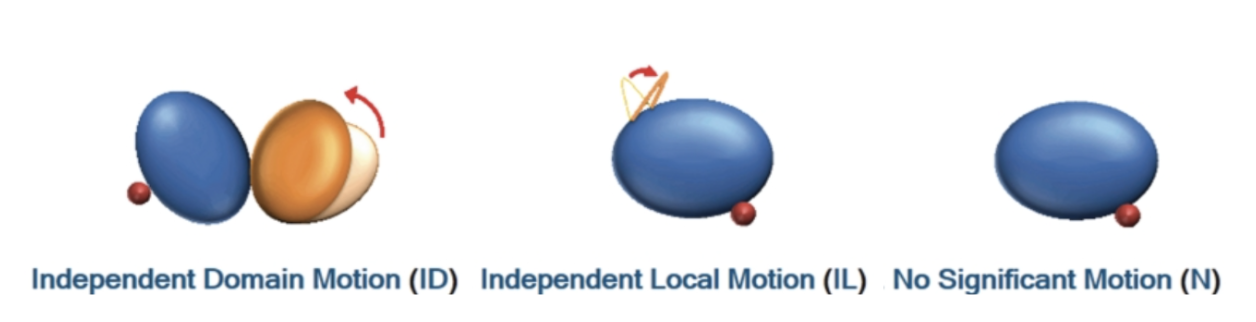

**Our goal with our GCN is to create a classification model to predict binding type from the protein structure.**


*Image adapted from article: [PSCDB: A database for protein structural change upon ligand binding ](https://www.researchgate.net/publication/51796031_PSCDB_A_database_for_protein_structural_change_upon_ligand_binding )*

In [8]:
# Get the .pdb files
# !git clone https://github.com/courtel/GNN_dl_workshop.git

# Load the DataFrame from the CSV file that contains motion info
df_pscdb = pd.read_csv('/content/GNN_dl_workshop/df_pscdb.csv')

# Display the DataFrame to confirm it's loaded correctly
print(df_pscdb.head())  # 显示前5行内容

   Unnamed: 0  level_0  index PSCID  \
0           1        1      1  CD.2   
1           4        4      4  CD.5   
2           5        5      5  CD.6   
3           6        6      6  CD.7   
4           8        8      8  CD.9   

                                   Protein Name Free form Bound form  Ligands  \
0                              ADENYLATE KINASE    4ake_A     2eck_A  ADP,AMP   
1                           ELONGATION FACTOR 2    1n0v_D     1n0u_A      SO1   
2                              CITRATE SYNTHASE   5csc_AB    6cts_AA    2xCIC   
3                  ARACHIDONATE 15-LIPOXYGENASE    2p0m_A     2p0m_B      RS7   
4  3-PHOSPHOSHIKIMATE 1-CARBOXYVINYLTRANSFERASE    2bjb_A     2o0d_A      S3P   

   Classification(?)            motion_type free_pdb Free Chains Bound PDB  \
0             200003  coupled_domain_motion     4ake           A      2eck   
1             110002  coupled_domain_motion     1n0v           D      1n0u   
2             102001  coupled_domain_motion 

In [9]:
# @title **Data Prep Functions**

# Define a function to map motion class 将PDB id(free_pdb)映射到其对应的运动类型(motion_type)
# df.iterrows()函数：可以返回所有的行索引，以及该行的所有内容
motion_type_mapping = {row['free_pdb']: row['motion_type'] for _, row in df_pscdb.iterrows()}
print("motion_type_mapping", motion_type_mapping)

# Convert motion types to numerical labels 将唯一的motion_type转换为数值标签（graph_label）
# enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和索引
motion_type_to_label = {motion_type: idx for idx, motion_type in enumerate(df_pscdb['motion_type'].unique())}
print(motion_type_to_label)

def classification_mapping(df_pscdb, data): # 为每个图数据对象添加运动类型标签（graph_y）
    protein_name = data.name  # 从图数据对象 data 中获取蛋白质名称
    motion_type = motion_type_mapping[protein_name] # 使用 motion_type_mapping 找到蛋白质的运动类型
    # print("motion type", motion_type)
    graph_label = motion_type_to_label[motion_type] # 使用 motion_type_to_label 将运动类型转换为数值标签
    # print("graph label", graph_label)
    # data.graph_y = torch.tensor([graph_label])
    data.graph_y = graph_label  # 将标签赋值给图对象的 graph_y 属性
    # print("graph_y", data.graph_y)
    return data

# Define a function to parse pdb and convert to networkx then to pytorch object
def get_distance_matrix(coords):  # 计算所有原子坐标之间的欧几里得距离矩阵
    diff_tensor = np.expand_dims(coords, axis=1) - np.expand_dims(coords, axis=0) # 使用np.expand_dims将原子坐标扩展成适合广播的形状
    distance_matrix = np.sqrt(np.sum(np.power(diff_tensor, 2), axis=-1))  # 计算每对原子之间坐标的差值，并取平方和的平方根得到距离
    return distance_matrix

def pdb_to_graph(pdb_path, distance_threshold=6.0, contain_b_factor=True):  # 将PDB文件中的原子坐标和残基信息转换为一个图对象
    atom_df = PandasPdb().read_pdb(pdb_path)  # 用PandasPdb读取PDB文件，提取ATOM表
    atom_df = atom_df.df['ATOM']
    # 按残基号分组并计算每个残基的平均坐标和b_factor
    residue_df = atom_df.groupby('residue_number', as_index=False)[['x_coord', 'y_coord', 'z_coord', 'b_factor']].mean().sort_values('residue_number')
    coords = residue_df[['x_coord', 'y_coord', 'z_coord']].values # 残基坐标
    distance_matrix = get_distance_matrix(coords) # 使用残基的坐标计算欧几里得距离矩阵
    adj = distance_matrix < distance_threshold  # 设置距离阈值distance_threshold，将距离小于阈值的残基连接成图中的边
    u, v = np.nonzero(adj)  # np.nonzero函数用于获取数组中非零元素的位置（数组索引），返回的是一个元组(u,v)，包含了每个维度上非零元素的索引数组。
    u, v = torch.from_numpy(u), torch.from_numpy(v) # 将NumPy数组转换为PyTorch的张量（Tensor）
    graph = nx.Graph() # 创建一个无向图

    # Add nodes with coordinates and b_factor included in the node feature matrix 'x'
    for i, row in residue_df.iterrows():  # 向图中添加节点，每个节点对应一个残基，结点特征包含残基的坐标和可选的b_factor作为特征
        node_features = [row['x_coord'], row['y_coord'], row['z_coord']]
        if contain_b_factor:
            node_features.append(row['b_factor'])  # Append b_factor to the features
        graph.add_node(i, x=torch.tensor(node_features, dtype=torch.float))

    # Add edges based on the adjacency matrix
    for src, dst in zip(u.numpy(), v.numpy()):  # 根据邻接矩阵添加边，并将距离作为边的属性
        distance = distance_matrix[src, dst]
        graph.add_edge(src, dst, edge_attr=torch.tensor([distance], dtype=torch.float))

    return graph

# 将图对象转换为 PyTorch Geometric（PyG）的数据格式，并为其添加节点和边特征以及运动类型标签
# distance_threshold：原子之间的距离阈值，默认值为 6.0。
# contain_b_factor：是否包含 B 因子（反映原子的热运动程度），默认值为 True。
# train：是否为训练模式，默认为 True。
def get_pmolecule(file_path, distance_threshold=6.0, contain_b_factor=True, train=True):
    # Create a graph using pdb_to_graph 根据PDB文件生成NetworkX图对象
    graph = pdb_to_graph(file_path, distance_threshold, contain_b_factor)

    # Convert to PyTorch data object 将NetworkX图对象转换为PyTorch的data对象
    data = from_networkx(graph)

    # Set the name attribute manually 使用os.path.basename提取文件名（不含路径），并去除文件后缀
    data.name = os.path.basename(file_path).replace('.pdb', '')

    # Check that there are feats
    if 'x' not in data: # 检查图中是否包含节点特征x，如果没有，则打印警告
        print("warning, no x node features")

    if 'edge_attr' not in data: # 检查图中是否包含边特征edge_attr，如果没有，则打印警告
        print("warning, no edge attributes")

    # Add labels for motion_type  调用classification_mapping函数，基于motion_type为图添加标签（graph_y）
    data = classification_mapping(df_pscdb, data)

    return data

# 批量读取 PDB 文件，调用 get_pmolecule 处理每个文件，并将所有图对象存入列表
# pdb_directory：.pdb 文件所在目录。
# pdb_id：仅在测试模式下使用，指定单个 .pdb 文件的 ID。
def get_pyg_data_list(pdb_directory, pdb_id=None, distance_threshold=6.0, contain_b_factor=True, train=True):
    pdb_files = [f for f in os.listdir(pdb_directory) if f.endswith('.pdb')]  # 遍历文件目录下所有PDB文件
    pyg_data_list = []  # 初始化一个空列表，用于存储 PyTorch 数据对象

    if train:
        for pdb_file in pdb_files:  # 遍历 .pdb 文件列表
            file_path = os.path.join(pdb_directory, pdb_file)
            graph = get_pmolecule(file_path, distance_threshold, contain_b_factor)  # 调用 get_pmolecule 函数处理每个 .pdb 文件。
            pyg_data_list.append(graph) # 将生成的 PyTorch 数据对象添加到 pyg_data_list 中。
        return pyg_data_list
    else:
        file_path = os.path.join(pdb_directory, f'{pdb_id}.pdb')
        pyg_data = get_pmolecule(file_path, distance_threshold, contain_b_factor, train=False)
        return pyg_data


{'4ake': 'coupled_domain_motion', '1n0v': 'coupled_domain_motion', '5csc': 'coupled_domain_motion', '2p0m': 'coupled_domain_motion', '2bjb': 'coupled_domain_motion', '2ex0': 'coupled_domain_motion', '1oen': 'coupled_domain_motion', '2car': 'coupled_domain_motion', '2pry': 'coupled_domain_motion', '1d2r': 'coupled_domain_motion', '2gg4': 'coupled_domain_motion', '2nrb': 'coupled_domain_motion', '1t8p': 'coupled_domain_motion', '2gca': 'coupled_domain_motion', '1y2q': 'coupled_domain_motion', '1sjs': 'coupled_domain_motion', '2f7m': 'coupled_domain_motion', '2znd': 'coupled_domain_motion', '1x0a': 'coupled_domain_motion', '3d8r': 'coupled_domain_motion', '2uvg': 'coupled_domain_motion', '2c00': 'coupled_domain_motion', '1zkb': 'coupled_domain_motion', '1ex6': 'coupled_domain_motion', '3c6q': 'coupled_domain_motion', '1lio': 'coupled_domain_motion', '1xgd': 'coupled_domain_motion', '2brw': 'coupled_domain_motion', '1jej': 'coupled_domain_motion', '1a48': 'coupled_domain_motion', '2ous': '

Preparing the .pdb files as input for our GCN involves extracting information to create a graph of nodes and edges that represent our original protein. The data is then converted into a pytorch data object where features are represented as tensors.

Below is an example using a simple three-residue protein of the data prep workflow using the functions above.

准备 .pdb 文件作为 GCN 的输入，涉及提取信息以创建代表我们原始蛋白质的节点和边图。然后将数据转换为 pytorch 数据对象，其中特征表示为张量。

下面是使用上述函数的数据准备工作流程的简单三残基蛋白质的示例。

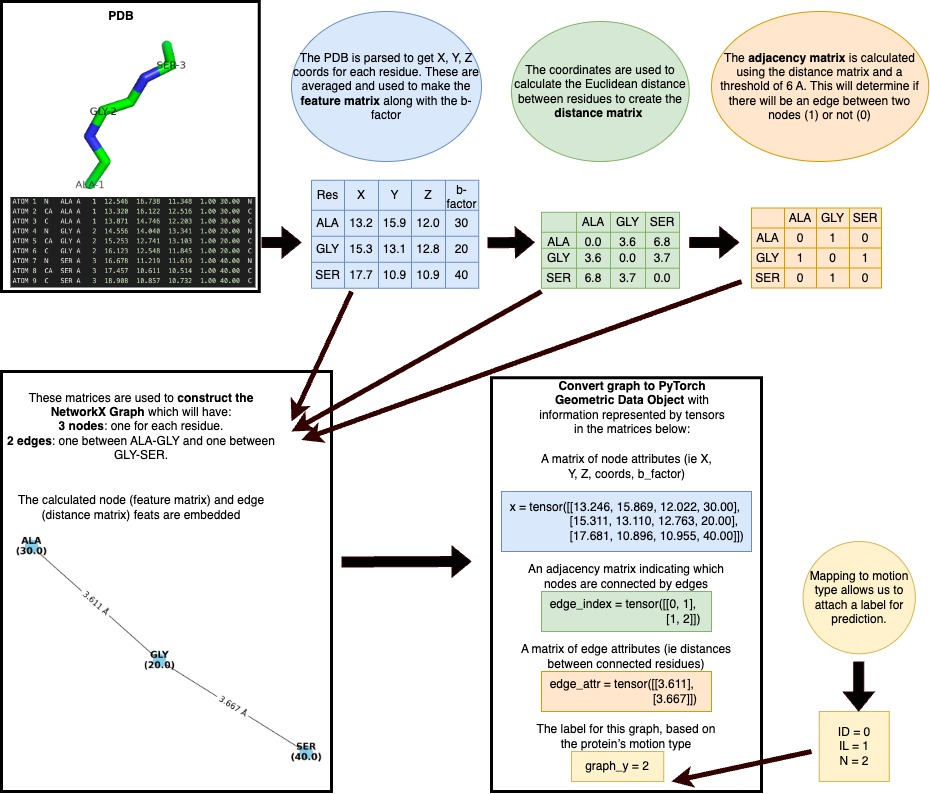

In [ ]:
# Create directories to store train and test sets
train_pdb_dir = '/GNN_dl_workshop/pdb_files/train_set'
test_pdb_dir = '/GNN_dl_workshop/pdb_files/test_set'

# Run code to put our .pdb files through the data prep workflow
train_pyg_data_list = get_pyg_data_list(train_pdb_dir)
test_pyg_data_list = get_pyg_data_list(test_pdb_dir)

Double check our pytorch data objects (our final input for the GCN) contains the data we expect

In [ ]:
# Double check pyg_data 输出训练集前5个图
for i, pyg_data in enumerate(train_pyg_data_list):
    if i >= 5:
        break
    print(pyg_data)

Data(x=[527, 4], edge_index=[2, 2749], edge_attr=[2749, 1], name='2o1p', graph_y=1)
Data(x=[282, 4], edge_index=[2, 24478], edge_attr=[24478, 1], name='1rif', graph_y=1)
Data(x=[421, 4], edge_index=[2, 36621], edge_attr=[36621, 1], name='1sry', graph_y=3)
Data(x=[233, 4], edge_index=[2, 1417], edge_attr=[1417, 1], name='2z42', graph_y=5)
Data(x=[469, 4], edge_index=[2, 2547], edge_attr=[2547, 1], name='1bbw', graph_y=1)


Here we can see that the first protein has a feature matrix (x) that contains 527 nodes (residues) with 4 attributes (X, Y, Z coords, and b_factor). Edge_index is a matrix with 2749 connections (edges) between nodes. This is our adjacency matrix. Edge_attr is our distance matrix and has 1 attribute (distance) for all 1133 edges. Graph_y is a number that maps back to the motion type classification.

在这里我们可以看到第一个蛋白质有一个特征矩阵 (x)，其中包含 527 个节点（残基）和 4 个属性（X、Y、Z 坐标和 b_factor）。 Edge_index 是一个矩阵，节点之间有 2749 个连接（边）。这是我们的邻接矩阵。 Edge_attr 是我们的距离矩阵，所有 2749 条边都有 1 个属性（距离）。 Graph_y 是映射运动类型分类的数字

In [ ]:
# @title Plot graphein graph of the protein 2nrt in the dataset . Here we can confirm that our pytorch data objecthas the correct number of nodes. If you hover over each node in the graph, you will see X, Y, Z coords. We should have something similar in the each of the matrices for the 217 nodes in our feature matrix.绘制数据集中蛋白质 2nrt 的graphein 图。在这里我们可以确认我们的 pytorch 数据对象具有正确的节点数。如果将鼠标悬停在图表中的每个节点上，您将看到 X、Y、Z 坐标。我们的特征矩阵中的 217 个节点的每个矩阵中都应该有类似的东西
params_1 = {
    "edge_construction_functions": [
        gp.add_peptide_bonds
    ]
}

# Define a graphein graph config
config = ProteinGraphConfig(granularity="CA", **params_1)
# Construct the protein graph 构建蛋白质结构图
# protein_graph = construct_graph(config=config, pdb_code='2nrt')
g = construct_graph(config=config, pdb_code='2nrt')
p = plotly_protein_structure_graph(g) # 可视化蛋白质图

Output()

Output()

In [ ]:
p.show()

In [ ]:
# @title Functions for model metrics (show code to see detail)
# 用于记录训练过程中每个 epoch 的指标（epoch、优化器迭代次数、训练损失和训练准确率）。
def log_metrics(epoch, optimizer_step, train_loss, train_accuracy, log_file='train_metrics_log.txt'):
    # r只读，r+读写，不创建
    # w新建只写，w+新建读写，二者都会将文件内容清零
    # a：附加写方式打开，不可读；a+: 附加读写方式打开
    with open(log_file, 'a') as f:  # 默认将日志写入名为 train_metrics_log.txt 的文件
        f.write(f'epoch: {epoch}, optimizer_step: {optimizer_step}, train_loss: {train_loss}, train_accuracy: {train_accuracy}\n')

# 从日志文件中读取记录并解析为数值格式，每行记录中需要解析的数值个数，默认是 4（对应epoch、optimizer_step、train_loss、train_accuracy）
def get_results(log_file, number=4):
    with open(log_file, 'r') as file: # 以只读模式 ('r') 打开日志文件。
        lines = file.readlines()  # 使用readlines方法将文件的每一行加载到列表lines中
    results = []  # 初始化一个空列表 results，用于存储解析后的数值
    for line in lines:  # 遍历文件的每一行，检查行是否以 epoch 开头（确保只处理训练记录行）
        if line.startswith('epoch'):
            # 使用正则表达式查找行中 : 和 , 的位置
            result_1 = [_.start() for _ in re.finditer(':', line)]  # 存储 : 的索引位置
            result_2 = [_.start() for _ in re.finditer(',', line)] + [-1] # 存储 , 的索引位置，并在最后加上 -1 表示行末
            bla = []  # 初始化一个列表 bla，用于存储当前行解析出的数值
            for i in range(number):
                if i == number-1: # 对于最后一个字段，提取从 : 后的字符到行末，将每个提取的值转换为浮点数并添加到 bla 中
                    bla.append(float(line[result_1[i]+2:]))
                else:
                    bla.append(float(line[result_1[i]+2:result_2[i]]))  # 对于其他字段，提取从 : 后的字符到 , 前
            results.append(bla)
    results = np.array(results) # 将results 转换为 NumPy 数组，方便后续操作
    return results

def plot_metrics(log_file='train_metrics_log.txt'):
    metrics = get_results(log_file)
    epochs = metrics[:, 0]  # 第一列
    train_loss = metrics[:, 2]  # 第三列
    train_accuracy = metrics[:, 3]  # 第四列

    plt.figure(figsize=(20, 8)) # 创建一个 20x8 的画布

    # Plot Loss vs Epochs
    plt.subplot(1, 2, 1)  # 创建一个包含两个子图（subplot）的画布，在左半部分绘制训练损失曲线
    # CN式写法以字母C为前缀，后面加从0开始的数字索引，其索引的对象为rcParams["axes.prop_cycle"]
    plt.plot(epochs, train_loss, '--', linewidth=2.0, c='C0') # 使用蓝色虚线表示曲线
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)  # 为当前子图启用网格线
    plt.legend(['Training Loss']) # 设置图例

    # Plot Accuracy vs Epochs
    plt.subplot(1, 2, 2)  # 在右半部分（subplot(1, 2, 2)）绘制训练准确率曲线
    plt.plot(epochs, train_accuracy, linewidth=4.0, c='C1') # 使用红色实线表示曲线
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0.0, 1.0)  # Set the y-axis scale from 0.0 to 1.0
    plt.grid(True)
    plt.legend(['Training Accuracy'])

    plt.show()

## **<font color='#569098'>Implement a GCN: Define a GraphConv layer**


## **<font color='#569098'>GCN Architecture**


#### **<font color='#e59454'>1. Input Layer**
- **Node Feature Matrix (X)**: This matrix has dimensions `n x D` where `n` is the number of nodes in the graph and `D` is the number of features per node. Each row represents the feature vector of a node.该矩阵的维度为 n x D，其中 n 是图中的节点数，D 是每个节点的特征数。每行代表一个节点的特征向量。
- **Adjacency Matrix (A)**: This is an `n x n` matrix where each element `A[i][j]` is 1 if there is an edge between nodes `i` and `j`, and 0 otherwise. This matrix captures the graph structure.这是一个 n x n 矩阵，其中如果节点 i 和 j 之间存在边，则每个元素 A[i][j] 为 1，否则为 0。该矩阵捕获图形结构。

#### **<font color='#e59454'>2. Graph Convolutional Layers (GCN)**
 - **Aggregation and Updating Nodes**: Messaging passing and aggregation for a node's nearest neighbors (based on the adjacency matrix) take splace so that all nodes are updated based on it's neighbors features. These features are transforned by weights specific to each layer.聚合和更新节点：对节点的最近邻居（基于邻接矩阵）进行消息传递和聚合，以便所有节点都根据其邻居特征进行更新。这些特征通过每层特定的权重进行转换。
 - **Non-linearity**: A non-linear function, like ReLU, is applied to the output.非线性：将非线性函数（如 ReLU）应用于输出。

#### **<font color='#e59454'>3. Fully Connected Layer**
- The final node features are passed through a fully connected layer which maps the features used in the GCN layers to the output dimensionality needed for the specific task (e.g., classification, regression).最终的节点特征通过全连接层，该层将 GCN 层中使用的特征映射到特定任务（例如分类、回归）所需的输出维度。

#### **<font color='#e59454'>4. Pooling Layer (depends on task)**
- Depending on the specific task needed, a pooling layer can be applied (ie for graph-level tasks).根据所需的特定任务，可以应用池化层（即用于图形级任务）。

#### **<font color='#e59454'>5. Output Layer**
- **Output**: The output layer produces a vector of length `n x 1`, where each element corresponds to the final output for each node. This could represent a score, a classification label, or any other node-specific output depending on the specific application of the GCN.输出层产生长度为 n x 1 的向量，其中每个元素对应于每个节点的最终输出。这可以表示分数、分类标签或任何其他特定于节点的输出，具体取决于 GCN 的具体应用。





In [ ]:
#@markdown **<font color='#e59454'>Question Time! Run to Show Question**
def create_checkbox_quiz(question, correct_answers, decoy_answers, explanation):
    html_code = f"<h3>{question}</h3>"

    # Create checkboxes for the correct answers and decoy answers
    answers = correct_answers + decoy_answers
    for i, answer in enumerate(answers):
        html_code += f"<p><input type='checkbox' id='checkbox_{i}' value='{answer}'> {answer}</p>"

    # Add submit button, feedback, and explanation
    html_code += f"""
    <button onclick="checkCheckboxAnswers()">Submit</button>
    <button onclick="showExplanation()">Show Explanation</button>
    <p id="feedback" style="font-weight: bold;"></p>
    <div id="explanation" style="display:none; margin-top: 20px; padding: 10px; border: 1px solid #ccc; background-color: #f9f9f9;">
      <h4>Explanation:</h4>
      <p>{explanation}</p>
    </div>
    <script>
    function checkCheckboxAnswers() {{
        var correct_answers = {correct_answers};
        var selected_answers = [];
        var checkboxes = document.querySelectorAll("input[type='checkbox']");

        checkboxes.forEach((checkbox, i) => {{
            if (checkbox.checked) {{
                selected_answers.push(checkbox.value);
            }}
        }});

        var feedback = document.getElementById('feedback');
        var all_correct = selected_answers.length === correct_answers.length &&
                          correct_answers.every(answer => selected_answers.includes(answer));

        if (all_correct) {{
            feedback.textContent = "Correct!";
            feedback.style.color = "green";
        }} else {{
            feedback.textContent = "Incorrect. Try again.";
            feedback.style.color = "red";
        }}
    }}

    function showExplanation() {{
        var explanationDiv = document.getElementById('explanation');
        explanationDiv.style.display = "block";
    }}
    </script>
    """

    display(HTML(html_code))

# Define the question, correct answers, decoy answers, and explanation
question = "Which components stored in our pytorch data objects will get updated after message passing?"
correct_answers = ["x", "edge_attr"]
decoy_answers = ["edge_index", "name", "graph_y"]

explanation = "The 'x' is the node feature matrix and 'edge_attr' is the distance matrix which is our edge feature matrix. <br> Edge_index is our adjacency matrix which is used in message passing, but this matrix will stay the same. <br> The name (name of the protein) and graph_y (the motion label) will not change during message passing."

# Create the quiz
create_checkbox_quiz(question, correct_answers, decoy_answers, explanation)


In [9]:
#@markdown **<font color='#e59454'>Question Time! Run to Show Question**

question = "How does using global_max_pool make the model invariant to node ordering? 如何使用 global_max_pool 使模型不受节点排序的影响？"
correct_answer = "It aggregates node-level features into a single graph-level feature, disregarding node order.它将节点级特征聚合为单个图级特征，而忽略节点顺序。"
decoy_answers = [
    "It selects the maximum feature from each residue, which automatically orders the residues.它从每个残基中选择最大特征，从而自动对残基进行排序。",
    "It ensures that all residues are processed in a fixed order before pooling, making the model invariant.它确保所有残基在池化之前都按固定顺序进行处理，从而使模型不变。",
    "It normalizes node feature vectors, so the order doesn’t matter.它对节点特征向量进行规范化，因此顺序并不重要。"
    ]
explanation ="global_max_pool 是一种池化操作，用于从节点特征中提取图级特征。它通过对所有节点特征的每个维度分别取最大值，将所有节点的特征聚合为一个单一的图特征向量。最大值的计算与节点的排列顺序无关，只取决于特征值本身。因此，池化的结果完全由特征的内容决定，而与节点的顺序无关，本质上并不依赖残基的处理顺序。global_max_pool 并未对节点特征进行规范化操作，它只是聚合操作。"

create_quiz(question, correct_answer, decoy_answers, explanation)


*Image Source: [torch_geometric.nn conv.GCNConv](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.nn.conv.GCNConv.html)*

## **<font color='#569098'>Implement a GCN: Define our model**


In [ ]:

class GCNGraphLevel(torch.nn.Module): # 定义GCN。该模型继承自torch.nn.Module，是PyTorch中自定义模型的基础。
    def __init__(self, in_channels, hidden_channels, out_channels): # __init__方法是类的构造函数，用于初始化模型的层和参数。
        super(GCNGraphLevel, self).__init__() # 调用父类的初始化方法。
        self.conv1 = GCNConv(in_channels, hidden_channels)  # 使用两层图卷积层（GCNConv），分别处理输入特征和隐藏层特征
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.lin = torch.nn.Linear(hidden_channels, out_channels) # 定义一个全连接层，将隐藏层的特征转换为任务的最终输出（维度为out_channels）

    def forward(self, data):
        # 参数 data 是输入数据，是 torch_geometric.data.Data 对象，包含以下属性：
        # data.x：节点特征矩阵，形状为 [num_nodes, in_channels]。
        # data.edge_index：边索引矩阵，形状为 [2, num_edges]。
        # data.batch：批处理索引，标识每个节点属于哪个图。
        x, edge_index, batch = data.x, data.edge_index, data.batch

        x = self.conv1(x, edge_index) # 应用第一层图卷积（conv1），将输入特征维度从in_channels转换为hidden_channels
        x = F.relu(x) # 使用 ReLU 激活函数引入非线性
        x = self.conv2(x, edge_index) # 应用第二层图卷积（conv2）

        x = global_max_pool(x, batch)  # 使用global_max_pool将节点级特征聚合为图级特征。Need to pool node features to graph level for graph level tasks

        out = self.lin(x) # 将图级特征x输入全连接层（lin），生成最终输出。

        return out

## **<font color='#569098'>Implement a GCN: Train and eval**


Epoch 0, Train Loss: 12.8542, Train Accuracy: 0.1500
Epoch 1, Train Loss: 6.3447, Train Accuracy: 0.3167
Epoch 2, Train Loss: 3.7893, Train Accuracy: 0.3000
Epoch 3, Train Loss: 3.7614, Train Accuracy: 0.3333
Epoch 4, Train Loss: 3.7813, Train Accuracy: 0.3167
Epoch 5, Train Loss: 2.8323, Train Accuracy: 0.3333
Epoch 6, Train Loss: 2.2536, Train Accuracy: 0.3333
Epoch 7, Train Loss: 1.8248, Train Accuracy: 0.3500
Epoch 8, Train Loss: 1.7774, Train Accuracy: 0.4167
Epoch 9, Train Loss: 1.6448, Train Accuracy: 0.3667
Epoch 10, Train Loss: 1.2767, Train Accuracy: 0.3833
Epoch 11, Train Loss: 1.1132, Train Accuracy: 0.4667
Epoch 12, Train Loss: 1.1480, Train Accuracy: 0.4833
Epoch 13, Train Loss: 1.0810, Train Accuracy: 0.4833
Epoch 14, Train Loss: 0.9532, Train Accuracy: 0.5167
Epoch 15, Train Loss: 0.9317, Train Accuracy: 0.5167
Epoch 16, Train Loss: 0.9816, Train Accuracy: 0.4833
Epoch 17, Train Loss: 0.9383, Train Accuracy: 0.4833
Epoch 18, Train Loss: 0.8855, Train Accuracy: 0.5833
Ep

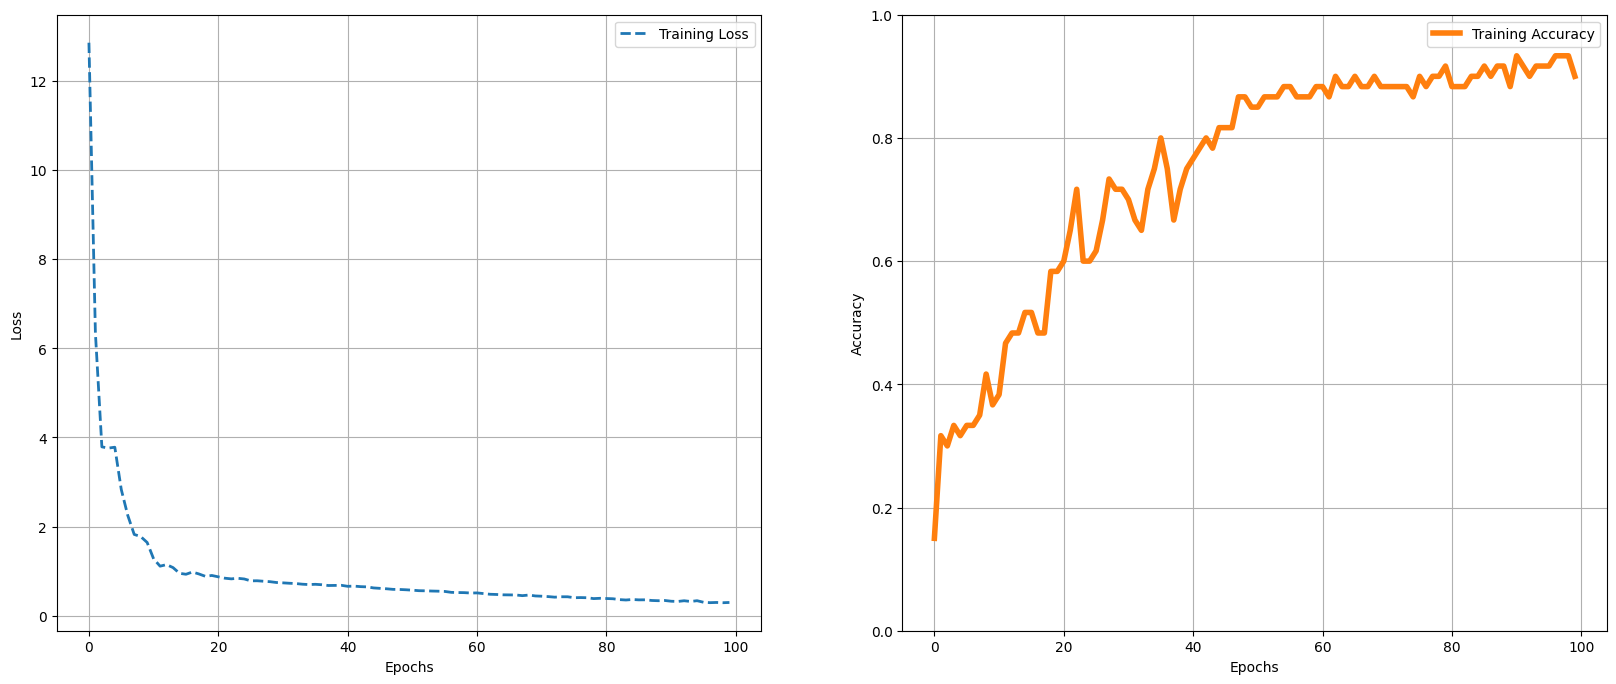

In [ ]:
# TRAIN
# Create DataLoader
# 使用 PyTorch 的 DataLoader 创建训练数据的加载器。
# train_pyg_data_list：训练数据集（PyTorch Geometric 数据列表）。
# batch_size=32：每批次加载 32 个样本。
# shuffle=True：在每个 epoch 开始时随机打乱数据顺序
train_loader = DataLoader(train_pyg_data_list, batch_size=32, shuffle=True)

# Initialize model, loss, and optimizer
model = GCNGraphLevel(in_channels=4, hidden_channels=16, out_channels=len(motion_type_to_label))  # 初始化图级任务的GCN模型
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # 定义 Adam 优化器，用于更新模型参数。 model.parameters()：模型的可学习参数；lr=0.01：学习率。
criterion = torch.nn.CrossEntropyLoss() # 定义交叉熵损失函数，用于多分类任务

# Clear the log file for training metrics
log_file = 'train_metrics_log.txt'
open(log_file, 'w').close() # 打开训练日志文件 train_metrics_log.txt 并清空内容，为新的训练过程记录数据

optimizer_steps = 0 # 初始化优化器步数计数器，用于跟踪优化器更新的次数。

for epoch in range(100):  # 循环执行100个epoch
    model.train()
    total_train_loss = 0
    correct_train = 0
    for data in train_loader: # 遍历训练数据加载器的每批次数据。
        optimizer.zero_grad() # 清除上一批次的梯度
        out = model(data) # 将当前批次的数据输入模型，计算输出 out
        loss = criterion(out, data.graph_y) # 使用交叉熵损失函数计算当前批次的损失
        loss.backward() # 反向传播计算梯度
        optimizer.step()  # 使用优化器更新模型参数

        total_train_loss += loss.item() # 累加当前批次的损失到 total_train_loss
        pred = out.argmax(dim=1)  # 使用 out.argmax(dim=1) 获取每个样本的预测类别
        correct_train += (pred == data.graph_y).sum().item()  # 将预测正确的样本数累加到 correct_train
        optimizer_steps += 1  # 更新优化器步数计数器

    train_loss = total_train_loss / len(train_loader) # 计算当前轮次的平均训练损失 总损失total_train_loss除以批次数量len(train_loader)
    train_accuracy = correct_train / len(train_loader.dataset)  # 计算训练ACC 正确分类样本数 correct_train 除以总样本数 len(train_loader.dataset)

    # Log the training metrics
    log_metrics(epoch, optimizer_steps, train_loss, train_accuracy, log_file=log_file)
    print(f'Epoch {epoch}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')

# Plot the training metrics after all epochs在所有训练轮次完成后，调用 plot_metrics 函数：
plot_metrics(log_file='train_metrics_log.txt')  # 从日志文件读取训练指标，绘制损失和精度随轮次变化的曲线，用于可视化训练过程。


Epoch 0, Eval Loss: 0.2103, Eval Accuracy: 0.9333
Epoch 1, Eval Loss: 0.1836, Eval Accuracy: 0.9333
Epoch 2, Eval Loss: 0.1494, Eval Accuracy: 1.0000
Epoch 3, Eval Loss: 0.1198, Eval Accuracy: 1.0000
Epoch 4, Eval Loss: 0.0984, Eval Accuracy: 1.0000
Epoch 5, Eval Loss: 0.0851, Eval Accuracy: 1.0000
Epoch 6, Eval Loss: 0.0745, Eval Accuracy: 1.0000
Epoch 7, Eval Loss: 0.0606, Eval Accuracy: 1.0000
Epoch 8, Eval Loss: 0.0477, Eval Accuracy: 1.0000
Epoch 9, Eval Loss: 0.0394, Eval Accuracy: 1.0000


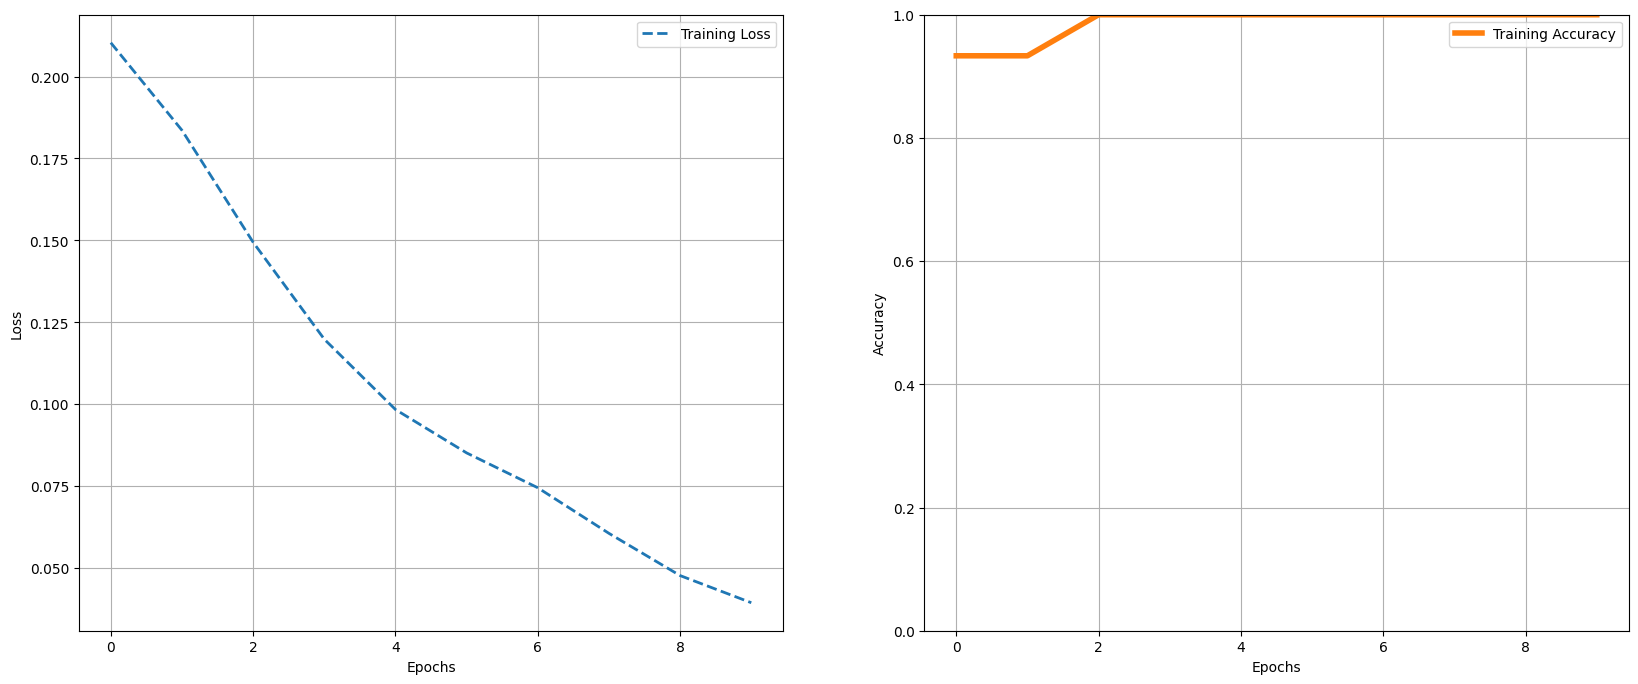

In [ ]:
# EVAL
# Create DataLoader 使用 PyTorch 的 DataLoader 创建验证集数据的加载器。
test_loader = DataLoader(test_pyg_data_list, batch_size=32)

# Initialize model, loss, and optimizer
# model = GCNGraphLevel(in_channels=3, hidden_channels=32, out_channels=len(motion_type_to_label))
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# criterion = torch.nn.CrossEntropyLoss()

# Clear the log file for training metrics
log_file = 'eval_metrics_log.txt'
open(log_file, 'w').close() # 打开或创建评估日志文件 eval_metrics_log.txt，并清空内容。

optimizer_steps = 0

for epoch in range(10): # 循环进行 10 次评估（每次对整个验证集进行一次评估）
    model.eval()  # 设置模型为评估模式（model.eval()）
    total_eval_loss = 0
    correct_eval = 0
    for data in test_loader:
        optimizer.zero_grad()
        out = model(data) # 前向传播：将当前批次的数据输入模型，获取输出 out
        loss = criterion(out, data.graph_y) # 计算当前批次的交叉熵损失。
        loss.backward() # 验证集反向传播？
        optimizer.step()

        total_eval_loss += loss.item()
        pred = out.argmax(dim=1)
        correct_eval += (pred == data.graph_y).sum().item()
        optimizer_steps += 1

    eval_loss = total_eval_loss / len(test_loader)
    eval_accuracy = correct_eval / len(test_loader.dataset)

    # Log the training metrics
    log_metrics(epoch, optimizer_steps, eval_loss, eval_accuracy, log_file=log_file)
    print(f'Epoch {epoch}, Eval Loss: {eval_loss:.4f}, Eval Accuracy: {eval_accuracy:.4f}')

# Plot the training metrics after all epochs
plot_metrics(log_file='eval_metrics_log.txt') # 读取日志文件并绘制验证损失和准确率的变化趋势


### **<font color='#e59454'> Expected Results:**

During training the GNN should have the following outcome for epoch 0 and epoch 99: <br> <br>
Epoch 0, Train Loss: 12.8542, Train Accuracy: 0.1500 <br>
Epoch 99, Train Loss: 0.2990, Train Accuracy: 0.9000 <br> <br>

During eval the GNN should have the following outcome for epoch 0 and epoch 9:<br> <br>
Epoch 0, Eval Loss: 0.2103, Eval Accuracy: 0.9333 <br>
Epoch 9, Eval Loss: 0.0394, Eval Accuracy: 1.0000<br> <br>

Below is a table that summarizes the number of each motion type for our proteins present in the dataset.下表总结了数据集中存在的蛋白质的每种运动类型的数量。


In [ ]:
# Results
print(df_pscdb['motion_type'].value_counts())

motion_type
no_significant_motion        199
independent_local_motion      89
coupled_local_motion          81
burying_ligand_motion         70
independent_domain_motion     41
coupled_domain_motion         37
Name: count, dtype: int64


# **<font color='#569098'>Section 4: Objectives Check-in**


* <font color='#e59454'>Identify the types of data that are ideal for GNNs and why protein structures are suitable for this type of nn.</font>
* <font color='#e59454'>Define nodes and edges in the context of graph data. How can proteins be represented as graphs?</font>
* <font color='#e59454'>Give examples of node-level, edge-level, and graph-level tasks for protein prediction.</font>
* <font color='#e59454'>Explain the difference between directed and undirected edges.</font>
* <font color='#e59454'>Classify which operations in the GNN require invariance or equivariance and explain why.</font>
* <font color='#e59454'>Name and explain the steps in message passing.</font>
* <font color='#e59454'>Explain the different layers within a GNN and how it differs from other models.</font>
* <font color='#e59454'>Apply a GNN to answer a node-level, edge-level, or graph-level question about proteins.</font>

<ul>
  <li><input type="checkbox"> Identify the types of data that are ideal for GNNs and why protein structures are suitable for this type of nn. <a href="https://link_to_resource_1" target="_blank">I missed this</a></li>
  <li><input type="checkbox"> Define nodes and edges in the context of graph data. How can proteins be represented as graphs? <a href="https://link_to_resource_2" target="_blank">I missed this</a></li>
  <li><input type="checkbox"> Give examples of node-level, edge-level, and graph-level tasks for protein prediction. <a href="https://link_to_resource_3" target="_blank">I missed this</a></li>
  <li><input type="checkbox"> Explain the difference between directed and undirected edges. <a href="https://link_to_resource_4" target="_blank">I missed this</a></li>
  <li><input type="checkbox"> Classify which operations in the GNN require invariance or equivariance and explain why. <a href="https://link_to_resource_5" target="_blank">I missed this</a></li>
  <li><input type="checkbox"> Name and explain the steps in message passing. <a href="https://link_to_resource_6" target="_blank">I missed this</a></li>
  <li><input type="checkbox"> Explain the different layers within a GNN and how it differs from other models. <a href="https://link_to_resource_7" target="_blank">I missed this</a></li>
  <li><input type="checkbox"> Apply a GNN to answer a node-level, edge-level, or graph-level question about proteins. <a href="https://link_to_resource_7" target="_blank">I missed this</a></li>
</ul>

## **<font color='#e59454'>Questions!**


In [11]:
#@markdown **<font color='#e59454'>Question Time! Run to Show Question**

from IPython.display import display, HTML

def create_quiz_2q(question, correct_answer, decoy_answers, explanation):
    # Combine the correct answer with the decoy answers
    answers = [correct_answer] + decoy_answers

    # Generate the HTML code for the initial question
    initial_question = """
    <div style="font-family: Arial, sans-serif; margin: 30px; max-width: 1000px;">
      <h3>A GCN is invariant to the order of residues (nodes).GCN 对残基（节点）的顺序不变。</h3>
      <div style="margin-bottom: 10px;">
        <input type="radio" id="initOption1" name="initQuiz" value="True">
        <label for="initOption1">True</label>
      </div>
      <div style="margin-bottom: 10px;">
        <input type="radio" id="initOption2" name="initQuiz" value="False">
        <label for="initOption2">False</label>
      </div>
      <button onclick="checkInitialAnswer()">Submit</button>
      <p id="initFeedback" style="font-weight: bold;"></p>
    </div>
    <div id="mainQuiz" style="display:none;">
      <h3 style="word-wrap: break-word;">{0}</h3>
    """.format(question)

    # Add each answer as a radio button for the main question
    for i, answer in enumerate(answers):
        initial_question += f"""
        <div style="word-wrap: break-word; margin-bottom: 10px;">
          <input type="radio" id="option{i}" name="quiz" value="{answer}">
          <label for="option{i}" id="label{i}">{answer}</label>
        </div>
        """

    # Add the submit button, explanation button, feedback section, and explanation section for the main quiz
    initial_question += f"""
      <button onclick="checkAnswer()">Submit</button>
      <button onclick="showExplanation()">Show Explanation</button>
      <p id="feedback" style="font-weight: bold;"></p>
      <div id="explanation" style="display:none; margin-top: 20px; padding: 10px; border: 1px solid #ccc; background-color: #f9f9f9;">
        <h4>Explanation:</h4>
        <p>{explanation}</p>
      </div>
    </div>
    <script>
    function checkInitialAnswer() {{
        var radios = document.getElementsByName('initQuiz');
        var correctAnswer = "True";
        var feedback = document.getElementById('initFeedback');
        var mainQuizDiv = document.getElementById('mainQuiz');
        var selectedOption = null;

        // Get the selected option
        for (var i = 0, length = radios.length; i < length; i++) {{
            if (radios[i].checked) {{
                selectedOption = radios[i].value;
                break;
            }}
        }}

        // Provide feedback for the initial question
        if (selectedOption) {{
            if (selectedOption === correctAnswer) {{
                feedback.textContent = "Correct!";
                feedback.style.color = "green";
                mainQuizDiv.style.display = "block";  // Show the main quiz
            }} else {{
                feedback.textContent = "Incorrect. Try again!";
                feedback.style.color = "red";
            }}
        }} else {{
            feedback.textContent = "Please select an answer.";
            feedback.style.color = "orange";
        }}
    }}

    function checkAnswer() {{
        var radios = document.getElementsByName('quiz');
        var correctAnswer = "{correct_answer}";
        var feedback = document.getElementById('feedback');
        var selectedOption = null;
        var selectedLabel = null;

        // Get the selected option
        for (var i = 0, length = radios.length; i < length; i++) {{
            if (radios[i].checked) {{
                selectedOption = radios[i].value;
                selectedLabel = document.getElementById('label' + i);
                break;
            }}
        }}

        // Provide feedback for the main question
        if (selectedOption) {{
            if (selectedOption === correctAnswer) {{
                feedback.textContent = "Correct!";
                feedback.style.color = "green";
                selectedLabel.style.color = "green";
            }} else {{
                feedback.textContent = "Incorrect.";
                feedback.style.color = "red";
                selectedLabel.style.color = "red";
            }}
        }} else {{
            feedback.textContent = "Please select an answer.";
            feedback.style.color = "orange";
        }}
    }}

    function showExplanation() {{
        var explanationDiv = document.getElementById('explanation');
        explanationDiv.style.display = "block";
    }}
    </script>
    """

    display(HTML(initial_question))

question = "WHY do we want the GCN to be invariant to the order of residues (nodes)?为什么我们希望 GCN 对残基（节点）的顺序保持不变？"
correct_answer = "The order of residues in the graph does not affect the overall structure of the protein, so the GCN should not depend on the node order.图中残基的顺序不会影响蛋白质的整体结构，因此 GCN 不应该依赖于节点顺序。"
decoy_answers = [
    "The order of residues in the graph affects the spatial structure of the protein, so GCN should be sensitive to the node order.图中残基的顺序影响蛋白质的空间结构，因此 GCN 应该对节点顺序敏感。",
    "The GCN needs to process each residue in a specific order, which determines the protein’s motion type.GCN 需要按照特定的顺序处理每个残基，这决定了蛋白质的运动类型",
    "Residue order affects the degree of each node, and the GCN should account for this残基顺序影响每个节点的程度，GCN 应该考虑到这一点。."
    ]
explanation ="In a protein structure, what matters is the graph's structure (how residues are connected) rather than the order in which nodes (residues) are listed in the dataset. The model should be invariant to node ordering because the classification task (protein motion type) depends on the overall graph structure, not on the specific node order in the input.在蛋白质结构中，重要的是图的结构（残基如何连接），而不是数据集中节点（残基）的排列顺序。模型应该对节点排序不变，因为分类任务（蛋白质运动类型）取决于整体图结构，而不是输入中的特定节点顺序。"


create_quiz_2q(question, correct_answer, decoy_answers, explanation)


In [13]:
#@markdown **<font color='#e59454'>Question Time! Run to Show Question**

from IPython.display import display, HTML

def create_quiz_2q(question, correct_answer, decoy_answers, explanation):
    # Combine the correct answer with the decoy answers
    answers = [correct_answer] + decoy_answers

    # Generate the HTML code for the initial question
    initial_question = """
    <div style="font-family: Arial, sans-serif; margin: 30px; max-width: 1000px;">
      <h3>The GCN is equivariant to permutations of nodes.GCN 与节点的排列等变。</h3>
      <div style="margin-bottom: 10px;">
        <input type="radio" id="initOption1" name="initQuiz" value="True">
        <label for="initOption1">True</label>
      </div>
      <div style="margin-bottom: 10px;">
        <input type="radio" id="initOption2" name="initQuiz" value="False">
        <label for="initOption2">False</label>
      </div>
      <button onclick="checkInitialAnswer()">Submit</button>
      <p id="initFeedback" style="font-weight: bold;"></p>
    </div>
    <div id="mainQuiz" style="display:none;">
      <h3 style="word-wrap: break-word;">{0}</h3>
    """.format(question)

    # Add each answer as a radio button for the main question
    for i, answer in enumerate(answers):
        initial_question += f"""
        <div style="word-wrap: break-word; margin-bottom: 10px;">
          <input type="radio" id="option{i}" name="quiz" value="{answer}">
          <label for="option{i}" id="label{i}">{answer}</label>
        </div>
        """

    # Add the submit button, explanation button, feedback section, and explanation section for the main quiz
    initial_question += f"""
      <button onclick="checkAnswer()">Submit</button>
      <button onclick="showExplanation()">Show Explanation</button>
      <p id="feedback" style="font-weight: bold;"></p>
      <div id="explanation" style="display:none; margin-top: 20px; padding: 10px; border: 1px solid #ccc; background-color: #f9f9f9;">
        <h4>Explanation:</h4>
        <p>{explanation}</p>
      </div>
    </div>
    <script>
    function checkInitialAnswer() {{
        var radios = document.getElementsByName('initQuiz');
        var correctAnswer = "True";
        var feedback = document.getElementById('initFeedback');
        var mainQuizDiv = document.getElementById('mainQuiz');
        var selectedOption = null;

        // Get the selected option
        for (var i = 0, length = radios.length; i < length; i++) {{
            if (radios[i].checked) {{
                selectedOption = radios[i].value;
                break;
            }}
        }}

        // Provide feedback for the initial question
        if (selectedOption) {{
            if (selectedOption === correctAnswer) {{
                feedback.textContent = "Correct!";
                feedback.style.color = "green";
                mainQuizDiv.style.display = "block";  // Show the main quiz
            }} else {{
                feedback.textContent = "Incorrect. Try again!";
                feedback.style.color = "red";
            }}
        }} else {{
            feedback.textContent = "Please select an answer.";
            feedback.style.color = "orange";
        }}
    }}

    function checkAnswer() {{
        var radios = document.getElementsByName('quiz');
        var correctAnswer = "{correct_answer}";
        var feedback = document.getElementById('feedback');
        var selectedOption = null;
        var selectedLabel = null;

        // Get the selected option
        for (var i = 0, length = radios.length; i < length; i++) {{
            if (radios[i].checked) {{
                selectedOption = radios[i].value;
                selectedLabel = document.getElementById('label' + i);
                break;
            }}
        }}

        // Provide feedback for the main question
        if (selectedOption) {{
            if (selectedOption === correctAnswer) {{
                feedback.textContent = "Correct!";
                feedback.style.color = "green";
                selectedLabel.style.color = "green";
            }} else {{
                feedback.textContent = "Incorrect.";
                feedback.style.color = "red";
                selectedLabel.style.color = "red";
            }}
        }} else {{
            feedback.textContent = "Please select an answer.";
            feedback.style.color = "orange";
        }}
    }}

    function showExplanation() {{
        var explanationDiv = document.getElementById('explanation');
        explanationDiv.style.display = "block";
    }}
    </script>
    """

    display(HTML(initial_question))

question = "What does that mean?"
correct_answer = "If you permute the order of the nodes, the output features will change in the same way, maintaining the relationships between nodes.如果你改变节点的顺序，输出特征将以相同的方式改变，从而保持节点之间的关系。"
decoy_answers = [
    "If you permute the order of the nodes, the output features of the GCN will change randomly, making the model more robust.如果改变节点的顺序，GCN 的输出特征将会随机变化，从而使模型更加鲁棒。",
    "The model ensures that the output features are completely independent of the order of nodes.该模型确保输出特征完全独立于节点的顺序。",
    "Equivariance ensures that the GCN’s predictions remain unchanged when nodes are permuted.等变性确保当节点发生排列时，GCN 的预测保持不变。"
    ]
explanation ="Equivariance means that if the nodes (residues) are permuted (i.e., their order is changed), the output features will change correspondingly while preserving the relationships between the nodes. This is crucial in a graph-based problem like protein classification because we care about the structure of the graph (how nodes are connected) rather than the specific order in which nodes are presented.等变性意味着如果节点（残基）发生置换（即其顺序发生变化），则输出特征将相应变化，同时保留节点之间的关系。这在基于图的问题（如蛋白质分类）中至关重要，因为我们关心的是图的结构（节点如何连接），而不是节点呈现的具体顺序。"


create_quiz_2q(question, correct_answer, decoy_answers, explanation)


In [ ]:
#@markdown **<font color='#e59454'>Question Time! Run to Show Question**

question = "Why is equivariance important in this protein classification problem?"
correct_answer = "It ensures that the GCN updates the features in a way that is consistent with the graph structure, regardless of node order."
decoy_answers = [
    "It helps the GCN handle missing data by adjusting the order of residues based on importance.",
    "It guarantees that the GCN outputs remain constant even if the spatial structure of the protein changes.",
    "It ensures that the GCN outputs are identical no matter how the nodes are ordered, which is crucial for protein classification."
    ]
explanation ="Equivariance ensures that the relationships between nodes (residues) in the graph are preserved, no matter how the nodes are ordered in the dataset. This is important because the spatial structure of the protein (how residues are connected) determines the motion type, not the order in which the residues are listed."

create_quiz(question, correct_answer, decoy_answers, explanation)

In [ ]:
#@markdown **<font color='#e59454'>Question Time! Run to Show Question**

question = "Where in the GCN is `graph_y` used?"
correct_answer = "It is used as the label for the entire graph and is applied in the loss function during training."
decoy_answers = [
    "It is used in every GCNConv layer to update the node features.",
    "It is used in the message-passing step to decide which edges to include.",
    "It is used in the ReLU activation function to control the non-linearity."
]
explanation = "Graph_y is the graph-level label that represents the motion type classification for the entire protein. It is not involved in message passing, but is used in the loss function during training."
create_quiz(question, correct_answer, decoy_answers, explanation)


In [ ]:
#@markdown **<font color='#e59454'>Question Time! Run to Show Question**

question = "How do the XYZ coordinates of residues get updated during message passing in each GCN layer?"
correct_answer = "Each node updates its XYZ coordinates by aggregating the feature vectors from its neighboring nodes, then applying a linear transformation and non-linearity."
decoy_answers = [
    "The XYZ coordinates are updated by adding random noise in each GCNConv layer to make the model more robust.",
    "Each node sends its XYZ coordinates to all other nodes in the graph, and they are averaged across the graph.",
    "The XYZ coordinates are directly multiplied by the edge weights without aggregation."
]
explanation = "Each node aggregates information from its neighbors (defined by the graph’s edges) to update its features, including XYZ coordinates. This is followed by a linear transformation and ReLU non-linearity."
create_quiz(question, correct_answer, decoy_answers, explanation)


In [ ]:
#@markdown **<font color='#e59454'>Question Time! Run to Show Question**

question = "What role do the edges (`edge_index`) play in message passing? What step are they involved in and how? Do they ever get updated?"
correct_answer = "The edges determine which nodes communicate with each other during message passing and they do not get updated during the process."
decoy_answers = [
    "The edges represent the distance between residues and get updated after every GCNConv layer.",
    "The edges determine which nodes get disconnected after each layer, reducing the size of the graph.",
    "The edges are used only in the first GCNConv layer and are discarded afterward."
]
explanation = "The edges in `edge_index` define how nodes (residues) communicate with each other in the graph. They remain fixed throughout the GCN layers and are not updated."
create_quiz(question, correct_answer, decoy_answers, explanation)


In [ ]:
#@markdown **<font color='#e59454'>Question Time! Run to Show Question**

question = "Why does the GCN have two GCNConv layers in the architecture? What might happen if you added more layers or reduced the number of layers?"
correct_answer = "Adding more layers allows the model to aggregate information from nodes farther away, but too many layers can cause over-smoothing, where all node features become indistinguishable."
decoy_answers = [
    "Two layers ensure that the graph is fully connected, and adding more layers would improve the classification accuracy without any drawbacks.",
    "The model uses two layers to ensure that each node’s features are multiplied by the motion type label twice, increasing accuracy.",
    "Adding more layers will reduce overfitting, and having fewer layers will always lead to underfitting."
]
explanation = "More GCN layers allow nodes to aggregate information from more distant nodes, but too many layers can result in over-smoothing, where node features become too similar and lose their distinctiveness."
create_quiz(question, correct_answer, decoy_answers, explanation)


In [ ]:
#@markdown **<font color='#e59454'>Question Time! Run to Show Question**

question = "How does `global_max_pool(x, batch)` help aggregate the information from multiple nodes in a protein to create a graph-level feature vector?"
correct_answer = "It selects the maximum feature value from each node across the entire graph, creating a single vector that represents the entire graph (protein)."
decoy_answers = [
    "It selects the minimum feature value across all nodes in a graph to create a graph-level feature.",
    "It averages the feature vectors of all nodes and outputs the graph-level feature vector.",
    "It sums all the node features together to create the graph-level feature vector."
]
explanation = "Global max pooling selects the maximum value from each node's features, creating a graph-level feature vector that summarizes the entire graph, making it ideal for tasks like protein classification."
create_quiz(question, correct_answer, decoy_answers, explanation)


In [ ]:
#@markdown **<font color='#e59454'>Question Time! Run to Show Question**

question = "What is the role of the final linear layer (`self.lin`) in this GCN model, and how does it relate to the classification task?"
correct_answer = "The linear layer directly predicts the motion type by converting the graph-level features into class probabilities."
decoy_answers = [
    "The linear layer increases the dimensionality of the node features to make the graph more complex.",
    "The linear layer aggregates information from all edges to determine the motion type.",
    "The linear layer is used to update the feature vectors of each residue and is not involved in classification."
]
explanation = "The final linear layer converts the graph-level feature vector into a set of class probabilities, which in this case represent the predicted motion type of the protein."
create_quiz(question, correct_answer, decoy_answers, explanation)


In [ ]:
#@markdown **<font color='#e59454'>Question Time! Run to Show Question**

question = "How does the edge structure (e.g., 1133 edges for protein `2nrt`) affect the message passing process? How might different types of edges (e.g., chemical bonds, proximity in 3D space) influence the GCN’s ability to classify protein motion?"
correct_answer = "The edges allow for message passing between nodes, and different types of edges (e.g., chemical bonds, spatial proximity) affect how well the GCN can capture meaningful interactions between residues."
decoy_answers = [
    "The edges control the activation function used in each GCNConv layer and are updated after every message-passing step.",
    "The edge structure determines the order in which the nodes are processed, with more edges resulting in more iterations.",
    "The edges are only used for regularization and do not affect message passing or classification performance."
]
explanation = "Edges define which nodes can communicate during message passing. Different types of edges, such as those representing chemical bonds or spatial proximity, capture different kinds of relationships between residues, impacting how the GCN models protein motion."
create_quiz(question, correct_answer, decoy_answers, explanation)


### If you enjoy GNNs and want to know more, here are some excellent resources:

* **Petar Veličković** is has a great lecture with accompanying slides and companion colab notebook: <br>
 * YouTube Lecture: [Theoretical Foundations of Graph Neural Networks](https://www.youtube.com/watch?v=uF53xsT7mjc) <br>
 * Slides: https://petar-v.com/talks/GNN-Wednesday.pdf <br>
 * Colab notebook: [Introduction to Graph Neural Nets with JAX/jraph](htthttps://github.com/google-deepmind/educational/blob/master/colabs/summer_schools/intro_to_graph_nets_tutorial_with_jraph.ipynbps://) <br>
 * Additionally, here is a git repo he made for GAT resources (has some great visuals): [GAT - Graph Attention Network (PyTorch) + graphs](https://github.com/gordicaleksa/pytorch-GAT) <br>

* An excellent primer: [A Gentle Introduction to Graph Neural Networks](https://distill.pub/2021/gnn-intro/)

* A compilation of colab notebooks and videos: [PyTorch Geometric Tutorial Project](https://pytorch-geometric.readthedocs.io/en/latest/get_started/colabs.html) <br>

* Another useful colab notebok with implementations of other GNN variations: [A Gentle Introduction to Geometric Graph Neural Networks](https://github.com/chaitjo/geometric-gnn-dojo/blob/main/geometric_gnn_101.ipynb) <br>
